# PROYECTO INTEGRADOR: *Expansión Estratégica de Biogenesys con Python*


##### Librerias utilizadas

In [102]:
#carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


## AVANCE 1: *Carga y transformación de los datos*

1.Se lee el archivo Readme.txt y se analiza las columnas y datos que se van a utilizar para obtener un mayor conocimiento del dataset.

2.Se crea un nuevo notebook llamado “PIDA_M4_Daniela_Ferrer.ipynb” 

3.Carga de datos

In [103]:
data = pd.read_csv("data_latinoamerica.csv", sep=',')

MemoryError: Unable to allocate 4.19 GiB for an array with shape (46, 12216057) and data type float64

In [ ]:
#Verificación de que se hayan cargado correctamente las primeras 5 columnas

data.head() 


location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

4.Verificación de que el dataset cargado tiene la cantidad de registros y columnas especificadas 

In [ ]:
#función de Numpy
np.shape(data)


(12216057, 50)

In [ ]:
#función de Pandas
data.shape

(12216057, 50)

5.Selección los países donde se expandirán: Colombia, Argentina, Chile, México, Perú y Brasil.

In [ ]:
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']
data_latinoamerica=data[data['country_name'].isin(paises_seleccionados)] #creo una mascara que devuelve los country_name como TRUE o FALSE si es estan en paises_seleccionados  mask= data['country_name'].isin(paises_seleccionados) 

In [ ]:
#Revisamos la cantidad de datos

np.shape(data_latinoamerica)


(11970289, 50)

Se verifica el tipo de datos de cada columna

In [ ]:
print(data_latinoamerica.dtypes)

location_key                              object
date                                      object
country_code                              object
country_name                              object
new_confirmed                            float64
new_deceased                             float64
cumulative_confirmed                     float64
cumulative_deceased                      float64
cumulative_vaccine_doses_administered    float64
population                               float64
population_male                          float64
population_female                        float64
population_rural                         float64
population_urban                         float64
population_density                       float64
human_development_index                  float64
population_age_00_09                     float64
population_age_10_19                     float64
population_age_20_29                     float64
population_age_30_39                     float64
population_age_40_49

Cambio de tipo de dato de la columna DATE

In [ ]:
# Convertir el formato de la columna 'date' a datetime utilizando .loc

data_latinoamerica.loc[:, 'date'] = pd.to_datetime(data_latinoamerica.loc[:, 'date'])


In [ ]:
#se verifica el cambio de formato

print(data_latinoamerica['date'].dtypes)

object


¿Qué tan buena es la calidad de nuestros datos? 

In [ ]:
#Verificamos la cantidad de datos faltantes por columna

print(data_latinoamerica.isnull().sum())

location_key                                    0
date                                            0
country_code                                    0
country_name                                    0
new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population                                 521266
population_male                           1122803
population_female                         1122803
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
population_age_00_09                      1465689
population_age_10_19                      1465689
population_age_20_29                      1465689
population_age_30_39                      1465689


In [ ]:
#Filtramos por las columnas donde la cantidad de valores nulos son mayores a 4 millones de datos faltantes.

data_latinoamerica.isnull().sum()[data_latinoamerica.isnull().sum()>4000000]  #data_latinoamerica.isnull().sum()>4000000 es una mascara que trae T o F, si es nulo, suma todo lo que sea mayor a 4 millones. 
#Antes de la mascara, si es nulo, suma todo lo de la mascara.


new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


In [ ]:
#Revisando el dataset, nos encontramos que algunos paises tienen varias location_key por lo que decidimos averiguar cuántas hay

data_latinoamerica.location_key.value_counts() #value_counts cuántas veces encontras un valor en el data set

#Ejemplo, MX tene varios datos duplicados porque tiene distintos codigos por zona, lo mismo con AR y otros paises

location_key
AR              991
MX_GRO_12040    991
MX_GRO_12031    991
MX_GRO_12032    991
MX_GRO_12033    991
               ... 
BR_PR_411880    991
BR_PR_411885    991
BR_PR_411890    991
BR_PR_411900    991
PE_UCA_0401     991
Name: count, Length: 12079, dtype: int64

Despues de analizar los datos, se puede observar que tenemos datos faltantes en muchas columnas por lo que realizaremos un nuevo filtro por columna "location_key" pero vamos a usar solo las instancias que correspondan a los paises que hemos seleccionado y no a sus regiones o subregiones. Utilizaremos las location_keys AR, CL, CO, MX, PE, BR.


In [ ]:
#se filtra por las location_key unica de cada pais
data_latinoamerica_paises =data_latinoamerica[data_latinoamerica['location_key'].isin(['AR','CL','CO','MX','PE','BR'])]
data_latinoamerica_paises.shape

(5946, 50)

6.Se filtran los datos en fechas mayores a 2021-01-01.

In [ ]:
#nos aseguramos que la columna DATE este en formato de fecha antes de filtrar
data_latinoamerica_paises['date']=pd.to_datetime(data_latinoamerica_paises['date'])

#filtramos por la fecha solicitada por el cliente
data_latinoamerica_paises_Fecha=data_latinoamerica_paises[data_latinoamerica_paises['date']>'2021-01-01']

C:\Users\danie\AppData\Local\Temp\ipykernel_14392\2513712329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises['date']=pd.to_datetime(data_latinoamerica_paises['date'])


In [ ]:
#verificamos el cambio en la cantidad de datos

data_latinoamerica_paises_Fecha.shape


(3744, 50)

Una vez que filtramos por fecha, queremos evaluar la cantidad de nulos que existen, en caso de tenerlos, procedemos a eliminarlos

In [ ]:
#contamos valores nulos
valores_nulos_fecha=data_latinoamerica_paises_Fecha.isnull().sum()[data_latinoamerica_paises_Fecha.isnull().sum()>0]

print(valores_nulos_fecha)
data_latinoamerica_paises_Fecha.shape

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64


(3744, 50)

7 y 8.Compara a nivel de país para llenar valores faltantes. Se realiza una limpieza preliminar de los datos, eliminando registros nulos y corrigiendo los tipos de datos donde sea necesario. Se trata con valores medios, valores anteriores o valores siguientes. Se eliminan negativos. 

Verificación y conteo de valores negativos en columnas numéricas

In [ ]:
# Columnas numéricas para las que queremos verificar valores negativos
columnas_numericas = [
    'new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
    'cumulative_vaccine_doses_administered', 'population', 'population_male', 'population_female',
    'population_rural', 'population_urban', 'population_density', 'human_development_index',
    'population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39',
    'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79',
    'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd', 'latitude', 'longitude',
    'area_sq_km', 'smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate',
    'nurses_per_1000', 'physicians_per_1000', 'average_temperature_celsius', 'minimum_temperature_celsius',
    'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity', 'population_largest_city',
    'area_rural_sq_km', 'area_urban_sq_km', 'life_expectancy', 'adult_male_mortality_rate',
    'adult_female_mortality_rate', 'pollution_mortality_rate', 'comorbidity_mortality_rate',
    'new_recovered', 'cumulative_recovered'
]

# Diccionario para almacenar columnas con valores negativos
columnas_con_valores_negativos = {} #diccionario tiene clave valor (columna y registros negativos)

# Verificar valores negativos en cada columna numérica
# se crea ciclo for para ITERAR cada columna en columnas_numericas
for columna in columnas_numericas:
    # Verificar si en cada columna hay valores negativos. Devuelve una serie booleana que indica si los valores en la columna son negativos (True para valores negativos, False para no negativos).
    negativos = data_latinoamerica_paises_Fecha[columna] < 0
    # Si se encuentran valores negativos (TRUE), añadir al diccionario el nombre de la columna y el número de valores negativos
    if negativos.any(): #Verifica si hay al menos un valor True en la serie negativos
        columnas_con_valores_negativos[columna] = data_latinoamerica_paises_Fecha[negativos].shape[0] #Cuenta el número de valores negativos en la columna.

print(columnas_con_valores_negativos)

# Mostrar las columnas con valores negativos
if columnas_con_valores_negativos:
    # Si hay columnas con valores negativos, imprimir sus nombres y la cantidad de valores negativos encontrados
    print("Columnas con valores negativos y la cantidad de valores negativos encontrados:")
    for columna, count in columnas_con_valores_negativos.items():
        print(f"  {columna}: {count} valores negativos")
else:
    # Si no se encontraron valores negativos, imprimir un mensaje indicando esto
    print("No se encontraron valores negativos en las columnas numéricas.")

{'latitude': 2496, 'longitude': 3744, 'minimum_temperature_celsius': 57}
Columnas con valores negativos y la cantidad de valores negativos encontrados:
  latitude: 2496 valores negativos
  longitude: 3744 valores negativos
  minimum_temperature_celsius: 57 valores negativos


Calcular y reemplazar valores negativos en las columnas 'new_confirmed' y 'new_recovered'

In [ ]:
# Calcular la media de la columna 'new_confirmed' sin incluir los valores negativos
media_new_confirmed = data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['new_confirmed'] >= 0]['new_confirmed'].mean()

# Reemplazar los valores negativos en 'new_confirmed' con la media calculada
data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['new_confirmed'] < 0, 'new_confirmed'] = media_new_confirmed

# Reemplazar los valores negativos en 'new_recovered' con 0
data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['new_recovered'] < 0, 'new_recovered'] = 0

# Verificar los cambios
print(data_latinoamerica_paises_Fecha[['new_confirmed', 'new_recovered']])

          new_confirmed  new_recovered
367              7767.0            NaN
368              4934.0            NaN
369             13953.0            NaN
370             14085.0            NaN
371             14496.0            NaN
...                 ...            ...
10253872         1150.0            NaN
10253873            NaN            NaN
10253874            NaN            NaN
10253875            NaN            NaN
10253876            NaN            NaN

[3744 rows x 2 columns]


Identificar columnas con valores faltantes

In [ ]:
#columnas a las cuales debemos analizar los valores faltantes

valores_nulos_fecha.index


Index(['new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_deceased', 'cumulative_vaccine_doses_administered',
       'average_temperature_celsius', 'minimum_temperature_celsius',
       'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity',
       'new_recovered', 'cumulative_recovered'],
      dtype='object')

Rellenar valores nulos en las columnas seleccionadas ('new_confirmed', 'new_deceased', 'average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity') con la media de cada país

In [ ]:
# Rellenar valores nulos en las columnas seleccionadas ('new_confirmed', 'new_deceased', 
# 'average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius', 
# 'rainfall_mm', 'relative_humidity') con la media de cada país

# Lista de columnas que queremos rellenar con la media de cada país
columnasParaRellenarConMedia = ['new_confirmed', 'new_deceased', 'average_temperature_celsius', 
                                'minimum_temperature_celsius', 'maximum_temperature_celsius', 
                                'rainfall_mm', 'relative_humidity']

# Iterar sobre cada país en la lista de países seleccionados
for pais in paises_seleccionados:
    # Iterar sobre cada columna en la lista de columnas para rellenar con la media
    for columna in columnasParaRellenarConMedia:
        # Seleccionar las filas del DataFrame que corresponden al país actual y la columna específica
        # Rellenar los valores nulos con la media de esa columna para el país
        data_latinoamerica_paises_Fecha.loc[
            data_latinoamerica_paises_Fecha['country_name'] == pais, columna] = data_latinoamerica_paises_Fecha.loc[
                data_latinoamerica_paises_Fecha['country_name'] == pais, columna].fillna(
                    data_latinoamerica_paises_Fecha.loc[
                        data_latinoamerica_paises_Fecha['country_name'] == pais, columna].mean())


In [ ]:
#verificamos el cambio de valores nulos por la media en las columnas seleccionadas

valores_nulos_fecha=data_latinoamerica_paises_Fecha.isnull().sum()[data_latinoamerica_paises_Fecha.isnull().sum()>0]

print(valores_nulos_fecha)
data_latinoamerica_paises_Fecha.shape

cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64


(3744, 50)

Rellenar con 0 y verificar valores nulos en las columnas 'new_recovered', 'cumulative_recovered', y 'cumulative_vaccine_doses_administered'

In [ ]:
# Rellenar valores nulos en 'new_recovered' con 0 utilizando .loc
data_latinoamerica_paises_Fecha.loc[:, 'new_recovered'] = data_latinoamerica_paises_Fecha.loc[:, 'new_recovered'].fillna(0)

# Rellenar valores nulos en 'cumulative_recovered' con 0 utilizando .loc
data_latinoamerica_paises_Fecha.loc[:, 'cumulative_recovered'] = data_latinoamerica_paises_Fecha.loc[:, 'cumulative_recovered'].fillna(0)

# Rellenar valores nulos en 'cumulative_vaccine_doses_administered' con 0 utilizando .loc
data_latinoamerica_paises_Fecha.loc[:, 'cumulative_vaccine_doses_administered'] = data_latinoamerica_paises_Fecha.loc[:, 'cumulative_vaccine_doses_administered'].fillna(0)




# Contar y mostrar los valores nulos
valores_nulos_fecha = data_latinoamerica_paises_Fecha.isnull().sum()[data_latinoamerica_paises_Fecha.isnull().sum() > 0]
print(valores_nulos_fecha)

# Mostrar la forma del DataFrame
print(data_latinoamerica_paises_Fecha.shape)



cumulative_confirmed    21
cumulative_deceased     21
dtype: int64
(3744, 50)


Recalcular valores nulos en las columnas 'cumulative_confirmed' y 'cumulative_deceased' por país y fecha

In [ ]:
# Recalcular los valores nulos en 'cumulative_confirmed' y 'cumulative_deceased'
for pais in paises_seleccionados:
    # 1) Recorro por país
    # Filtrar los datos del país actual y ordenarlos por fecha
    country_data = data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name'] == pais].sort_values(by='date')
    
    for i in range(len(country_data)):  # len() devuelve el número de filas en country_data
        if i == 0:
            # 2) Si soy la primera fecha y cumulative_confirmed es 0 entonces asigno el valor de new_confirmed
            # Si es la primera fecha y cumulative_confirmed es nulo, asignar el valor de new_confirmed
            # iloc[i] selecciona la fila en la posición i del DataFrame country_data
            if pd.isnull(country_data.iloc[i]['cumulative_confirmed']):  # pd.isnull() comprueba si el valor es nulo
                data_latinoamerica_paises_Fecha.loc[country_data.index[i], 'cumulative_confirmed'] = country_data.iloc[i]['new_confirmed']
            
            # 3) Si soy la primera fecha y cumulative_deceased es 0 entonces asigno el valor de new_deceased
            # Si es la primera fecha y cumulative_deceased es nulo, asignar el valor de new_deceased
            if pd.isnull(country_data.iloc[i]['cumulative_deceased']):
                data_latinoamerica_paises_Fecha.loc[country_data.index[i], 'cumulative_deceased'] = country_data.iloc[i]['new_deceased']
        else:
            # 4) Cuando encuentro un cumulative_confirmed nulo entonces asigno cumulative_confirmed del día anterior + new_confirmed del día actual
            # Si cumulative_confirmed es nulo, asignar cumulative_confirmed del día anterior + new_confirmed del día actual
            if pd.isnull(country_data.iloc[i]['cumulative_confirmed']):
                # loc[] accede a una fila utilizando el índice del DataFrame
                prev_value = data_latinoamerica_paises_Fecha.loc[country_data.index[i - 1], 'cumulative_confirmed']
                data_latinoamerica_paises_Fecha.loc[country_data.index[i], 'cumulative_confirmed'] = prev_value + country_data.iloc[i]['new_confirmed']

            # 4) Cuando encuentro un cumulative_deceased nulo entonces asigno cumulative_deceased del día anterior + new_deceased del día actual
            # Si cumulative_deceased es nulo, asignar cumulative_deceased del día anterior + new_deceased del día actual
            if pd.isnull(country_data.iloc[i]['cumulative_deceased']):
                prev_value = data_latinoamerica_paises_Fecha.loc[country_data.index[i - 1], 'cumulative_deceased']
                data_latinoamerica_paises_Fecha.loc[country_data.index[i], 'cumulative_deceased'] = prev_value + country_data.iloc[i]['new_deceased']


Contar y mostrar valores nulos restantes y la forma del DataFrame. Se verifica que no queden valores nulos

In [ ]:

# Contar y mostrar los valores nulos
valores_nulos_fecha = data_latinoamerica_paises_Fecha.isnull().sum()[data_latinoamerica_paises_Fecha.isnull().sum() > 0]
print(valores_nulos_fecha)

# Mostrar la forma del DataFrame
print(data_latinoamerica_paises_Fecha.shape)

Series([], dtype: int64)
(3744, 50)


En el avance dos se observo que en Chile en la fecha 2022-03-21 existe un outlier en 'new_deceased' por lo que se procede a compeltar ese valor con la media

In [ ]:
data_latinoamerica_paises_Fecha.info()
data_latinoamerica_paises_Fecha.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3744 entries, 367 to 10253876
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   location_key                           3744 non-null   object        
 1   date                                   3744 non-null   datetime64[ns]
 2   country_code                           3744 non-null   object        
 3   country_name                           3744 non-null   object        
 4   new_confirmed                          3744 non-null   float64       
 5   new_deceased                           3744 non-null   float64       
 6   cumulative_confirmed                   3744 non-null   float64       
 7   cumulative_deceased                    3744 non-null   float64       
 8   cumulative_vaccine_doses_administered  3744 non-null   float64       
 9   population                             3744 non-null   float64

location_key       date country_code country_name  new_confirmed  \
367           AR 2021-01-02           AR    Argentina         7767.0   
368           AR 2021-01-03           AR    Argentina         4934.0   
369           AR 2021-01-04           AR    Argentina        13953.0   
370           AR 2021-01-05           AR    Argentina        14085.0   
371           AR 2021-01-06           AR    Argentina        14496.0   

     new_deceased  cumulative_confirmed  cumulative_deceased  \
367         166.0             1670634.0              46688.0   
368         157.0             1675568.0              46845.0   
369         157.0             1689521.0              47002.0   
370         160.0             1703606.0              47162.0   
371         131.0             1718102.0              47293.0   

     cumulative_vaccine_doses_administered  population  ...  \
367                                20334.0  44938712.0  ...   
368                                20529.0  44938712.0  ...   
369                                25164.0  44938712.0  ...   
370                                29852.0  44938712.0  ...   
371                                34162.0  44938712.0  ...   

     population_largest_city  area_rural_sq_km  area_urban_sq_km  \
367               15057273.0         2690269.0           55032.0   
368               15057273.0         2690269.0           55032.0   
369               15057273.0         2690269.0           55032.0   
370               15057273.0         2690269.0           55032.0   
371               15057273.0         2690269.0           55032.0   

     life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
367            76.52                    147.086                       79.483   
368            76.52                    147.086                       79.483   
369            76.52                    147.086                       79.483   
370            76.52                    147.086                       79.483   
371            76.52                    147.086                       79.483   

     pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
367                      26.6                        15.8            0.0   
368                      26.6                        15.8            0.0   
369                      26.6                        15.8            0.0   
370                      26.6                        15.8            0.0   
371                      26.6                        15.8            0.0   

     cumulative_recovered  
367                   0.0  
368                   0.0  
369                   0.0  
370                   0.0  
371                   0.0  

[5 rows x 50 columns]

In [ ]:
# Convertir la columna 'date' a tipo datetime
data_latinoamerica_paises_Fecha['date'] = pd.to_datetime(data_latinoamerica_paises_Fecha['date'])

# Crear un índice único combinando 'location_key' + 'date' 
data_latinoamerica_paises_Fecha.set_index(['location_key', 'date'], inplace=True)

# Filtrar el DataFrame para obtener el registro específico
filtro_por_ch_fecha = (data_latinoamerica_paises_Fecha.index.get_level_values('location_key') == 'CL') & (data_latinoamerica_paises_Fecha.index.get_level_values('date') == '2022-03-21')

# Actualizar el valor de la columna 'new_deceased' a 20 para el registro filtrado
data_latinoamerica_paises_Fecha.loc[filtro_por_ch_fecha, 'new_deceased'] = 20

C:\Users\danie\AppData\Local\Temp\ipykernel_14392\614113507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_Fecha['date'] = pd.to_datetime(data_latinoamerica_paises_Fecha['date'])


Una vez que se corrigio el valor de Chile en la fecha 2022-03-21 en 'new_deceased' se procede a corregir los valor de muertos acumulados a partir de esa fecha.

In [ ]:
data_latinoamerica_paises_Fecha.head()

country_code country_name  new_confirmed  \
location_key date                                                  
AR           2021-01-02           AR    Argentina         7767.0   
             2021-01-03           AR    Argentina         4934.0   
             2021-01-04           AR    Argentina        13953.0   
             2021-01-05           AR    Argentina        14085.0   
             2021-01-06           AR    Argentina        14496.0   

                         new_deceased  cumulative_confirmed  \
location_key date                                             
AR           2021-01-02         166.0             1670634.0   
             2021-01-03         157.0             1675568.0   
             2021-01-04         157.0             1689521.0   
             2021-01-05         160.0             1703606.0   
             2021-01-06         131.0             1718102.0   

                         cumulative_deceased  \
location_key date                              
AR           2021-01-02              46688.0   
             2021-01-03              46845.0   
             2021-01-04              47002.0   
             2021-01-05              47162.0   
             2021-01-06              47293.0   

                         cumulative_vaccine_doses_administered  population  \
location_key date                                                            
AR           2021-01-02                                20334.0  44938712.0   
             2021-01-03                                20529.0  44938712.0   
             2021-01-04                                25164.0  44938712.0   
             2021-01-05                                29852.0  44938712.0   
             2021-01-06                                34162.0  44938712.0   

                         population_male  population_female  ...  \
location_key date                                            ...   
AR           2021-01-02       19523766.0         20593330.0  ...   
             2021-01-03       19523766.0         20593330.0  ...   
             2021-01-04       19523766.0         20593330.0  ...   
             2021-01-05       19523766.0         20593330.0  ...   
             2021-01-06       19523766.0         20593330.0  ...   

                         population_largest_city  area_rural_sq_km  \
location_key date                                                    
AR           2021-01-02               15057273.0         2690269.0   
             2021-01-03               15057273.0         2690269.0   
             2021-01-04               15057273.0         2690269.0   
             2021-01-05               15057273.0         2690269.0   
             2021-01-06               15057273.0         2690269.0   

                         area_urban_sq_km  life_expectancy  \
location_key date                                            
AR           2021-01-02           55032.0            76.52   
             2021-01-03           55032.0            76.52   
             2021-01-04           55032.0            76.52   
             2021-01-05           55032.0            76.52   
             2021-01-06           55032.0            76.52   

                         adult_male_mortality_rate  \
location_key date                                    
AR           2021-01-02                    147.086   
             2021-01-03                    147.086   
             2021-01-04                    147.086   
             2021-01-05                    147.086   
             2021-01-06                    147.086   

                         adult_female_mortality_rate  \
location_key date                                      
AR           2021-01-02                       79.483   
             2021-01-03                       79.483   
             2021-01-04                       79.483   
             2021-01-05                       79.483   
             2021-01-06                       79.483   

                         pollution_mortality_r

Recalcular los acumulados muertos y contagiados de Mexico a partir del dia 01_01_2022 ya que a partir de esta fecha empiezan a contar desde 0 porque es año nuevo

In [ ]:
filtro2 = (data_latinoamerica_paises_Fecha.index.get_level_values('location_key') == 'CL') & (data_latinoamerica_paises_Fecha.index.get_level_values('date') >= '2022-03-21')


df_chile = data_latinoamerica_paises_Fecha[filtro2]

# Obtener el valor acumulado de fallecidos hasta el día anterior a '2022-03-21'
valor_acumulado_anterior = data_latinoamerica_paises_Fecha.loc[('CL', '2022-03-20'), 'cumulative_deceased'] if ('CL', '2022-03-20') in data_latinoamerica_paises_Fecha.index else 0

# Actualizar los valores acumulados desde '2022-03-21' en adelante
df_chile['cumulative_deceased'] = valor_acumulado_anterior + df_chile['new_deceased'].cumsum()

# Ahora 'date' es el único índice del DataFrame
df_chile.head()
# Actualizar el DataFrame original con los nuevos valores acumulados
data_latinoamerica_paises_Fecha.update(df_chile)

# Verificar la actualización en el DataFrame filtrado
data_latinoamerica_paises_Fecha


C:\Users\danie\AppData\Local\Temp\ipykernel_14392\1750286423.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chile['cumulative_deceased'] = valor_acumulado_anterior + df_chile['new_deceased'].cumsum()


country_code country_name  new_confirmed  \
location_key date                                                  
AR           2021-01-02           AR    Argentina    7767.000000   
             2021-01-03           AR    Argentina    4934.000000   
             2021-01-04           AR    Argentina   13953.000000   
             2021-01-05           AR    Argentina   14085.000000   
             2021-01-06           AR    Argentina   14496.000000   
...                              ...          ...            ...   
PE           2022-09-13           PE         Peru    1150.000000   
             2022-09-14           PE         Peru    5032.183871   
             2022-09-15           PE         Peru    5032.183871   
             2022-09-16           PE         Peru    5032.183871   
             2022-09-17           PE         Peru    5032.183871   

                         new_deceased  cumulative_confirmed  \
location_key date                                             
AR           2021-01-02    166.000000          1.670634e+06   
             2021-01-03    157.000000          1.675568e+06   
             2021-01-04    157.000000          1.689521e+06   
             2021-01-05    160.000000          1.703606e+06   
             2021-01-06    131.000000          1.718102e+06   
...                               ...                   ...   
PE           2022-09-13     22.000000          4.127612e+06   
             2022-09-14    197.233871          4.132644e+06   
             2022-09-15    197.233871          4.137676e+06   
             2022-09-16    197.233871          4.142709e+06   
             2022-09-17    197.233871          4.147741e+06   

                         cumulative_deceased  \
location_key date                              
AR           2021-01-02         46688.000000   
             2021-01-03         46845.000000   
             2021-01-04         47002.000000   
             2021-01-05         47162.000000   
             2021-01-06         47293.000000   
...                                      ...   
PE           2022-09-13        216173.000000   
             2022-09-14        216370.233871   
             2022-09-15        216567.467742   
             2022-09-16        216764.701613   
             2022-09-17        216961.935484   

                         cumulative_vaccine_doses_administered  population  \
location_key date                                                            
AR           2021-01-02                                20334.0  44938712.0   
             2021-01-03                                20529.0  44938712.0   
             2021-01-04                                25164.0  44938712.0   
             2021-01-05                                29852.0  44938712.0   
             2021-01-06                                34162.0  44938712.0   
...                                                        ...         ...   
PE           2022-09-13                                    0.0  29381884.0   
             2022-09-14                                    0.0  29381884.0   
             2022-09-15                                    0.0  29381884.0   
             2022-09-16                                    0.0  29381884.0   
             2022-09-17                                    0.0  29381884.0   

                         population_male  population_female  ...  \
location_key date                                            ...   
AR           2021-01-02       19523766.0         20593330.0  ...   
             2021-01-03       19523766.0         20593330.0  ...   
             2021-01-04       19523766.0         20593330.0  ...   
             2021-01-05       19523766.0         20593330.0  ...   
             2021-01-06       19523766.0         20593330.0  ...   
...                                  ...                ...  ...   
PE           2022-09-13       14450757.0         14931127.0  ...   
             2022-09-14       14450757.0         14931127.0  ...   

In [ ]:
filtro3 = (data_latinoamerica_paises_Fecha.index.get_level_values('location_key') == 'MX') & (data_latinoamerica_paises_Fecha.index.get_level_values('date') >= '2022-01-01')


df_mx = data_latinoamerica_paises_Fecha[filtro3]

# Obtener el valor acumulado de fallecidos hasta el día anterior a '2022-03-21'
valor_acumulado_anterior_deceased= data_latinoamerica_paises_Fecha.loc[('MX', '2021-12-31'), 'cumulative_deceased'] if ('MX', '2021-12-31') in data_latinoamerica_paises_Fecha.index else 0

# Actualizar los valores acumulados desde '2022-03-21' en adelante
df_mx['cumulative_deceased'] = valor_acumulado_anterior_deceased+ df_mx['new_deceased'].cumsum()

# Obtener el valor acumulado de fallecidos hasta el día anterior a '2022-03-21'
valor_acumulado_anterior_confirmed= data_latinoamerica_paises_Fecha.loc[('MX', '2021-12-31'), 'cumulative_confirmed'] if ('MX', '2021-12-31') in data_latinoamerica_paises_Fecha.index else 0

# Actualizar los valores acumulados desde '2022-03-21' en adelante
df_mx['cumulative_confirmed'] = valor_acumulado_anterior_confirmed+ df_mx['new_confirmed'].cumsum()



# Ahora 'date' es el único índice del DataFrame
df_mx.head()
# Actualizar el DataFrame original con los nuevos valores acumulados
data_latinoamerica_paises_Fecha.update(df_mx)

# Verificar la actualización en el DataFrame filtrado
data_latinoamerica_paises_Fecha

C:\Users\danie\AppData\Local\Temp\ipykernel_14392\2639684887.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mx['cumulative_deceased'] = valor_acumulado_anterior_deceased+ df_mx['new_deceased'].cumsum()
C:\Users\danie\AppData\Local\Temp\ipykernel_14392\2639684887.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mx['cumulative_confirmed'] = valor_acumulado_anterior_confirmed+ df_mx['new_confirmed'].cumsum()


country_code country_name  new_confirmed  \
location_key date                                                  
AR           2021-01-02           AR    Argentina    7767.000000   
             2021-01-03           AR    Argentina    4934.000000   
             2021-01-04           AR    Argentina   13953.000000   
             2021-01-05           AR    Argentina   14085.000000   
             2021-01-06           AR    Argentina   14496.000000   
...                              ...          ...            ...   
PE           2022-09-13           PE         Peru    1150.000000   
             2022-09-14           PE         Peru    5032.183871   
             2022-09-15           PE         Peru    5032.183871   
             2022-09-16           PE         Peru    5032.183871   
             2022-09-17           PE         Peru    5032.183871   

                         new_deceased  cumulative_confirmed  \
location_key date                                             
AR           2021-01-02    166.000000          1.670634e+06   
             2021-01-03    157.000000          1.675568e+06   
             2021-01-04    157.000000          1.689521e+06   
             2021-01-05    160.000000          1.703606e+06   
             2021-01-06    131.000000          1.718102e+06   
...                               ...                   ...   
PE           2022-09-13     22.000000          4.127612e+06   
             2022-09-14    197.233871          4.132644e+06   
             2022-09-15    197.233871          4.137676e+06   
             2022-09-16    197.233871          4.142709e+06   
             2022-09-17    197.233871          4.147741e+06   

                         cumulative_deceased  \
location_key date                              
AR           2021-01-02         46688.000000   
             2021-01-03         46845.000000   
             2021-01-04         47002.000000   
             2021-01-05         47162.000000   
             2021-01-06         47293.000000   
...                                      ...   
PE           2022-09-13        216173.000000   
             2022-09-14        216370.233871   
             2022-09-15        216567.467742   
             2022-09-16        216764.701613   
             2022-09-17        216961.935484   

                         cumulative_vaccine_doses_administered  population  \
location_key date                                                            
AR           2021-01-02                                20334.0  44938712.0   
             2021-01-03                                20529.0  44938712.0   
             2021-01-04                                25164.0  44938712.0   
             2021-01-05                                29852.0  44938712.0   
             2021-01-06                                34162.0  44938712.0   
...                                                        ...         ...   
PE           2022-09-13                                    0.0  29381884.0   
             2022-09-14                                    0.0  29381884.0   
             2022-09-15                                    0.0  29381884.0   
             2022-09-16                                    0.0  29381884.0   
             2022-09-17                                    0.0  29381884.0   

                         population_male  population_female  ...  \
location_key date                                            ...   
AR           2021-01-02       19523766.0         20593330.0  ...   
             2021-01-03       19523766.0         20593330.0  ...   
             2021-01-04       19523766.0         20593330.0  ...   
             2021-01-05       19523766.0         20593330.0  ...   
             2021-01-06       19523766.0         20593330.0  ...   
...                                  ...                ...  ...   
PE           2022-09-13       14450757.0         14931127.0  ...   
             2022-09-14       14450757.0         14931127.0  ...   

Prueba de cambios de datos

In [ ]:
# Ahora 'date' es el único índice del DataFrame
df_chile.head()

country_code country_name  new_confirmed  \
location_key date                                                  
CL           2022-03-21           CL        Chile         7555.0   
             2022-03-22           CL        Chile         5045.0   
             2022-03-23           CL        Chile         8025.0   
             2022-03-24           CL        Chile         9414.0   
             2022-03-25           CL        Chile         8247.0   

                         new_deceased  cumulative_confirmed  \
location_key date                                             
CL           2022-03-21          20.0             3401145.0   
             2022-03-22          11.0             3406540.0   
             2022-03-23          16.0             3415989.0   
             2022-03-24         155.0             3426147.0   
             2022-03-25          75.0             3434908.0   

                         cumulative_deceased  \
location_key date                              
CL           2022-03-21              44538.0   
             2022-03-22              44549.0   
             2022-03-23              44565.0   
             2022-03-24              44720.0   
             2022-03-25              44795.0   

                         cumulative_vaccine_doses_administered  population  \
location_key date                                                            
CL           2022-03-21                             50253530.0  17574003.0   
             2022-03-22                             50334653.0  17574003.0   
             2022-03-23                             50408333.0  17574003.0   
             2022-03-24                             50475544.0  17574003.0   
             2022-03-25                             50556319.0  17574003.0   

                         population_male  population_female  ...  \
location_key date                                            ...   
CL           2022-03-21        8972014.0          8601989.0  ...   
             2022-03-22        8972014.0          8601989.0  ...   
             2022-03-23        8972014.0          8601989.0  ...   
             2022-03-24        8972014.0          8601989.0  ...   
             2022-03-25        8972014.0          8601989.0  ...   

                         population_largest_city  area_rural_sq_km  \
location_key date                                                    
CL           2022-03-21                6723516.0          709418.0   
             2022-03-22                6723516.0          709418.0   
             2022-03-23                6723516.0          709418.0   
             2022-03-24                6723516.0          709418.0   
             2022-03-25                6723516.0          709418.0   

                         area_urban_sq_km  life_expectancy  \
location_key date                                            
CL           2022-03-21           12027.0           80.042   
             2022-03-22           12027.0           80.042   
             2022-03-23           12027.0           80.042   
             2022-03-24           12027.0           80.042   
             2022-03-25           12027.0           80.042   

                         adult_male_mortality_rate  \
location_key date                                    
CL           2022-03-21                    107.669   
             2022-03-22                    107.669   
             2022-03-23                    107.669   
             2022-03-24                    107.669   
             2022-03-25                    107.669   

                         adult_female_mortality_rate  \
location_key date                                      
CL           2022-03-21                       59.035   
             2022-03-22                       59.035   
             2022-03-23                       59.035   
             2022-03-24                       59.035   
             2022-03-25                       59.035   

                         pollution_mortality_r

Colocar como indice solo DATE

In [ ]:
# Restablecer el índice actual para convertir las columnas de índice en columnas normales
data_latinoamerica_paises_Fecha.reset_index(inplace=True)

# Configurar 'date' como el nuevo índice
data_latinoamerica_paises_Fecha.set_index('date', inplace=True)

# Ahora 'date' es el único índice del DataFrame
data_latinoamerica_paises_Fecha.head()

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   
2021-01-06       19523766.0  ...               15057273.0         2690269.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02           55032.0            76.52                    147.086   
2021-01-03           55032.0            76.52                    147.086   
2021-01-04           55032.0            76.52                    147.086   
2021-01-05           55032.0            76.52                    147.086   
2021-01-06           55032.0            76.52                    147.086   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                       79.483                      26.6   
2021-01-03                       79.483                      26.6   
2021-01-04                       79.483                      26.6   
2021-01-05                       79.483                      26.6   
2021-01-06                       79.483                      26.6   

            comorbidity_mortality_rate  new_recovered  cumulative_recovered  
date                                                                         
2021-01-02                        15.8            0.0                   0.0  
2021-01-03                        15.8            0.0                   0.0  
2021-01-04                        15.8            0.0                   0.0  
2021-01-05                        15.8            0.0                   0.0  
2021-01-06                        15.8            0.0                   0.0  

[5 rows x 49 columns]

9.Examinar las características básicas del dataset para comprender la distribución de las variables clave como incidencia de COVID-19 e identifica las variables que consideras que son claves para tu análisis.

Las siguientes variables son clave para el análisis de la incidencia de COVID-19:
new_confirmed: Indicador directo de la propagación diaria del virus.
new_deceased: Indicador directo de la mortalidad diaria causada por el virus.
cumulative_confirmed: Proporciona una visión acumulativa de la propagación del virus.
cumulative_deceased: Proporciona una visión acumulativa de la mortalidad causada por el virus.
cumulative_vaccine_doses_administered: Indicador de la respuesta de vacunación y su impacto potencial en la propagación del virus.
population: Tamaño de la población para contextualizar los números absolutos.
population_density: La densidad de población puede influir en la tasa de propagación del virus.
human_development_index: Puede proporcionar contexto sobre la capacidad de los sistemas de salud y la vulnerabilidad de la población.
relative_humidity y average_temperature_celsius: Factores climáticos que pueden influir en la propagación del virus.
Conclusión


10. Guardar los datos filtrados y limpios en un archivo CSV

In [ ]:
#Guarda los datos filtrados en un archivo con el nombre DatosFinalesFiltrado.csv a fin de poder utilizarlo luego y no tener que repetir el proceso de filtrado y limpieza.

data_latinoamerica_paises_Fecha.to_csv("DatosFinalesFiltrado2.csv",index=True)

In [ ]:
data_latinoamerica_paises_Fecha.head()

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   
2021-01-06       19523766.0  ...               15057273.0         2690269.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02           55032.0            76.52                    147.086   
2021-01-03           55032.0            76.52                    147.086   
2021-01-04           55032.0            76.52                    147.086   
2021-01-05           55032.0            76.52                    147.086   
2021-01-06           55032.0            76.52                    147.086   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                       79.483                      26.6   
2021-01-03                       79.483                      26.6   
2021-01-04                       79.483                      26.6   
2021-01-05                       79.483                      26.6   
2021-01-06                       79.483                      26.6   

            comorbidity_mortality_rate  new_recovered  cumulative_recovered  
date                                                                         
2021-01-02                        15.8            0.0                   0.0  
2021-01-03                        15.8            0.0                   0.0  
2021-01-04                        15.8            0.0                   0.0  
2021-01-05                        15.8            0.0                   0.0  
2021-01-06                        15.8            0.0                   0.0  

[5 rows x 49 columns]

In [ ]:
#Podemos reiniciar el notebook para liberar memoria y cargar el archivo filtrado para continuar con el analisis
data_latinoamerica_paises=pd.read_csv("DatosFinalesFiltrado2.csv",sep=',')

In [ ]:
data_latinoamerica_paises_Fecha.head()

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   
2021-01-06       19523766.0  ...               15057273.0         2690269.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02           55032.0            76.52                    147.086   
2021-01-03           55032.0            76.52                    147.086   
2021-01-04           55032.0            76.52                    147.086   
2021-01-05           55032.0            76.52                    147.086   
2021-01-06           55032.0            76.52                    147.086   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                       79.483                      26.6   
2021-01-03                       79.483                      26.6   
2021-01-04                       79.483                      26.6   
2021-01-05                       79.483                      26.6   
2021-01-06                       79.483                      26.6   

            comorbidity_mortality_rate  new_recovered  cumulative_recovered  
date                                                                         
2021-01-02                        15.8            0.0                   0.0  
2021-01-03                        15.8            0.0                   0.0  
2021-01-04                        15.8            0.0                   0.0  
2021-01-05                        15.8            0.0                   0.0  
2021-01-06                        15.8            0.0                   0.0  

[5 rows x 49 columns]

11.Uso de bucles for para el cálculo de estadísticas descriptivas y otras métricas importantes
•	¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?
•	¿Se muestran todas las estadísticas en todas las columnas durante el análisis?
•	¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?


In [ ]:
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe()) #descripcion basica 
    print('--------------------------------------')

date
count           3744
unique           624
top       2021-01-02
freq               6
Name: date, dtype: object
--------------------------------------
location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
--------------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
--------------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
--------------------------------------
new_confirmed
count      3744.000000
mean      13925.797778
std       24218.217290
min           0.000000
25%        1538.750000
50%        5220.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
--------------------------------------
new_deceased
count    3744.000000
mean      273.835327
std       473.250628
min         0.000000
25%        26.0000

¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?

Media: Representa el valor promedio de los datos, ofreciendo una perspectiva de la tendencia central. Es útil para comprender el comportamiento general de un conjunto de datos numéricos.

Mediana: Es el valor medio que divide los datos en dos mitades iguales. Dado que es menos afectada por valores extremos, es a menudo una mejor representación de la tendencia central que la media, especialmente en datos con distribuciones asimétricas.

Varianza: Calcula cuán dispersos están los valores alrededor de la media. Una varianza alta sugiere una gran variabilidad de los datos, mientras que una varianza baja indica que los datos están más agrupados cerca de la media.

Desviación Estándar: Al ser la raíz cuadrada de la varianza, esta métrica también mide la dispersión, pero en las mismas unidades de los datos, facilitando su interpretación.

Mínimo y Máximo: Estos valores demuestran los extremos en los datos, útiles para identificar el rango de valores y posibles valores atípicos.

Rango: La diferencia entre el máximo y el mínimo, que proporciona una idea de la extensión total de los datos.

Estas métricas ayudan a resumir y comprender la distribución y variabilidad de los datos, identificando tendencias y posibles valores atípicos.

¿Se muestran todas las estadísticas en todas las columnas durante el análisis?
Aplicabilidad de las Métricas
Las métricas descritas anteriormente se aplican principalmente a datos numéricos. En columnas no numéricas, como las categóricas, muchas de estas métricas no son aplicables. Por ejemplo, calcular la media o la varianza para categorías como nombres de países no tiene sentido práctico y podría conducir a malas interpretaciones.

¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?
Impacto en la Interpretación de los Datos
No mostrar todas las estadísticas en cada columna es una medida para evitar errores en la interpretación, asegurando que solo se presenten métricas relevantes y aplicables para cada tipo de dato. Esto ayuda a los analistas a tomar decisiones informadas y precisas basadas en estadísticas significativas y adecuadas para la naturaleza de los datos.

*Conclusiones generales:

Variabilidad significativa: Hay una gran variabilidad en los datos diarios de casos nuevos, muertes y recuperaciones, lo que sugiere fluctuaciones en la propagación del virus y en la respuesta de los sistemas de salud.

Impacto desigual: La pandemia ha tenido un impacto desigual en diferentes países, con diferencias significativas en los casos y muertes acumuladas, así como en la administración de vacunas.

Factores contextuales importantes: Las variables demográficas, económicas y de salud pública proporcionan contexto y pueden ayudar a explicar las diferencias en los impactos y respuestas a la pandemia.

Necesidad de intervenciones específicas: Los datos sugieren la necesidad de intervenciones adaptadas a las condiciones específicas de cada país, considerando factores como densidad de población, desarrollo humano y prevalencia de comorbilidades.*

12.Crea una función que permita obtener la mediana, varianza y el rango

In [ ]:
#aplicacion de bucle for para calculo de estadistica descriptiva

def calcular_estadisticas(data):
    for columna in data.columns:
        if data[columna].dtype in ['float64', 'int64']:
            print(f"Estadísticas para {columna}:")
            print(f"  Media: {data[columna].mean()}")
            print(f"  Mediana: {data[columna].median()}")
            print(f"  Moda: {data[columna].mode().values[0]}")
            print(f"  Varianza: {data[columna].var()}")
            print(f"  Desviación Estándar: {data[columna].std()}")
            print(f"  Rango: {data[columna].max() - data[columna].min()}")
            print("--------------------------------------")

# Aplicar la función a los datos
calcular_estadisticas(data_latinoamerica_paises)

Estadísticas para new_confirmed:
  Media: 13925.79777841205
  Mediana: 5220.0
  Moda: 0.0
  Varianza: 586522048.7206147
  Desviación Estándar: 24218.217290308854
  Rango: 298408.0
--------------------------------------
Estadísticas para new_deceased:
  Media: 273.8353272314385
  Mediana: 100.0
  Moda: 0.0
  Varianza: 223966.1571516857
  Desviación Estándar: 473.25062826338194
  Rango: 4249.0
--------------------------------------
Estadísticas para cumulative_confirmed:
  Media: 7075569.450315855
  Mediana: 4121718.5
  Moda: 6093645.0
  Varianza: 62374277304153.086
  Desviación Estándar: 7897738.74625852
  Rango: 34039370.76906064
--------------------------------------
Estadísticas para cumulative_deceased:
  Media: 213587.84998952536
  Mediana: 147119.5
  Moda: 128994.0
  Varianza: 32244593870.1019
  Desviación Estándar: 179567.79741953147
  Rango: 670053.8938906752
--------------------------------------
Estadísticas para cumulative_vaccine_doses_administered:
  Media: 65444735.3963675

¿Qué representa la mediana?

La mediana representa el valor central de un conjunto de datos ordenados. Divide los datos en dos partes iguales, con el 50% de los valores por debajo y el 50% por encima. Es una medida robusta de tendencia central, menos afectada por valores extremos que la media.

¿Cómo varía la dispersión de los datos en el conjunto de datos analizado, en términos de la varianza y el rango?

La varianza mide la dispersión de los datos alrededor de la media. Un valor alto de varianza indica que los datos están más dispersos y son más variables. El rango, que es la diferencia entre el valor máximo y el mínimo, también proporciona una medida de la amplitud de los datos. Un rango grande sugiere una mayor variabilidad en los datos.

¿Qué nos puede indicar esto sobre la consistencia o la variabilidad de los datos en relación con la mediana?

Alta Varianza y Gran Rango: Indican alta variabilidad en los datos, lo que significa que los valores están muy dispersos alrededor de la mediana. Esto puede sugerir inconsistencias en los datos o la presencia de valores atípicos.
Baja Varianza y Pequeño Rango: Indican baja variabilidad y que los datos están más concentrados alrededor de la mediana, lo que sugiere mayor consistencia y menos dispersión en los valores.
Analizar la varianza y el rango en relación con la mediana nos ayuda a entender la estabilidad y consistencia de los datos, permitiéndonos identificar posibles problemas de calidad o características importantes de la distribución de los datos.

In [ ]:
test= pd.read_csv("DatosFinalesFiltrado2.csv", sep=',')
test.head()

date location_key country_code country_name  new_confirmed  \
0  2021-01-02           AR           AR    Argentina         7767.0   
1  2021-01-03           AR           AR    Argentina         4934.0   
2  2021-01-04           AR           AR    Argentina        13953.0   
3  2021-01-05           AR           AR    Argentina        14085.0   
4  2021-01-06           AR           AR    Argentina        14496.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         166.0             1670634.0              46688.0   
1         157.0             1675568.0              46845.0   
2         157.0             1689521.0              47002.0   
3         160.0             1703606.0              47162.0   
4         131.0             1718102.0              47293.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                20334.0  44938712.0  ...   
1                                20529.0  44938712.0  ...   
2                                25164.0  44938712.0  ...   
3                                29852.0  44938712.0  ...   
4                                34162.0  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            0.0   
1                      26.6                        15.8            0.0   
2                      26.6                        15.8            0.0   
3                      26.6                        15.8            0.0   
4                      26.6                        15.8            0.0   

   cumulative_recovered  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 50 columns]

# AVANCE 2

In [ ]:
#carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
#Podemos reiniciar el notebook para liberar memoria y cargar el archivo filtrado para continuar con el analisis
data_latinoamerica_paises=pd.read_csv("DatosFinalesFiltrado2.csv",sep=',')

In [ ]:
data_latinoamerica_paises.head()

date location_key country_code country_name  new_confirmed  \
0  2021-01-02           AR           AR    Argentina         7767.0   
1  2021-01-03           AR           AR    Argentina         4934.0   
2  2021-01-04           AR           AR    Argentina        13953.0   
3  2021-01-05           AR           AR    Argentina        14085.0   
4  2021-01-06           AR           AR    Argentina        14496.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         166.0             1670634.0              46688.0   
1         157.0             1675568.0              46845.0   
2         157.0             1689521.0              47002.0   
3         160.0             1703606.0              47162.0   
4         131.0             1718102.0              47293.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                20334.0  44938712.0  ...   
1                                20529.0  44938712.0  ...   
2                                25164.0  44938712.0  ...   
3                                29852.0  44938712.0  ...   
4                                34162.0  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            0.0   
1                      26.6                        15.8            0.0   
2                      26.6                        15.8            0.0   
3                      26.6                        15.8            0.0   
4                      26.6                        15.8            0.0   

   cumulative_recovered  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 50 columns]

In [ ]:
# Seleccion del estilo de graficos a utilizar
plt.style.use('tableau-colorblind10')

1.Abrir “PIDA_M4_Daniela_Ferrer_Avance1.ipynb”.

2.Importa las librerías necesarias.


3.Análisis Estadístico con Pandas y Numpy.

Acercamiento a las estadisticas basicas de los datos. Usamos un ciclo for para para recorrer las columnas y obtener la media, mediana, desviacion estandar, minimo y maximo de cada columna

In [ ]:
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print('--------------------------------')


date
count           3744
unique           624
top       2021-01-02
freq               6
Name: date, dtype: object
--------------------------------
location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
--------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
--------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
--------------------------------
new_confirmed
count      3744.000000
mean      13925.797778
std       24218.217290
min           0.000000
25%        1538.750000
50%        5220.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
--------------------------------
new_deceased
count    3744.000000
mean      273.835327
std       473.250628
min         0.000000
25%        26.000000
50%       100.000000
75%   

4.Visualización de Datos con Matplotlib y Seaborn

Creo funcion con los paises seleccionados para realizar graficos

In [ ]:
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']

In [ ]:
data_latinoamerica_paises.head()

date location_key country_code country_name  new_confirmed  \
0  2021-01-02           AR           AR    Argentina         7767.0   
1  2021-01-03           AR           AR    Argentina         4934.0   
2  2021-01-04           AR           AR    Argentina        13953.0   
3  2021-01-05           AR           AR    Argentina        14085.0   
4  2021-01-06           AR           AR    Argentina        14496.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         166.0             1670634.0              46688.0   
1         157.0             1675568.0              46845.0   
2         157.0             1689521.0              47002.0   
3         160.0             1703606.0              47162.0   
4         131.0             1718102.0              47293.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                20334.0  44938712.0  ...   
1                                20529.0  44938712.0  ...   
2                                25164.0  44938712.0  ...   
3                                29852.0  44938712.0  ...   
4                                34162.0  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            0.0   
1                      26.6                        15.8            0.0   
2                      26.6                        15.8            0.0   
3                      26.6                        15.8            0.0   
4                      26.6                        15.8            0.0   

   cumulative_recovered  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 50 columns]

Ponemos como indice la columnda 'date' para poder hacer un análisis de los datos a lo largo del tiempo

In [ ]:
#Se cambia a formato fecha el tipo de dato de la columna 'date'
data_latinoamerica_paises['date']=pd.to_datetime(data_latinoamerica_paises['date'])

#Se establece la columna 'date' como indice
data_latinoamerica_paises.set_index('date', inplace=True) #la función set_index, inplace=True se utiliza para establecer la columna 'date' como el índice del DataFrame y modificar el DataFrame original sin necesidad de reasignarlo.

#Verificar el cambio
print(data_latinoamerica_paises.head())

           location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   

            cumulative_va

Un primer acercamiento será realizar una matriz de correlación para ver si existe alguna relación entre las variables para tener en cuenta para un análisis posterior.

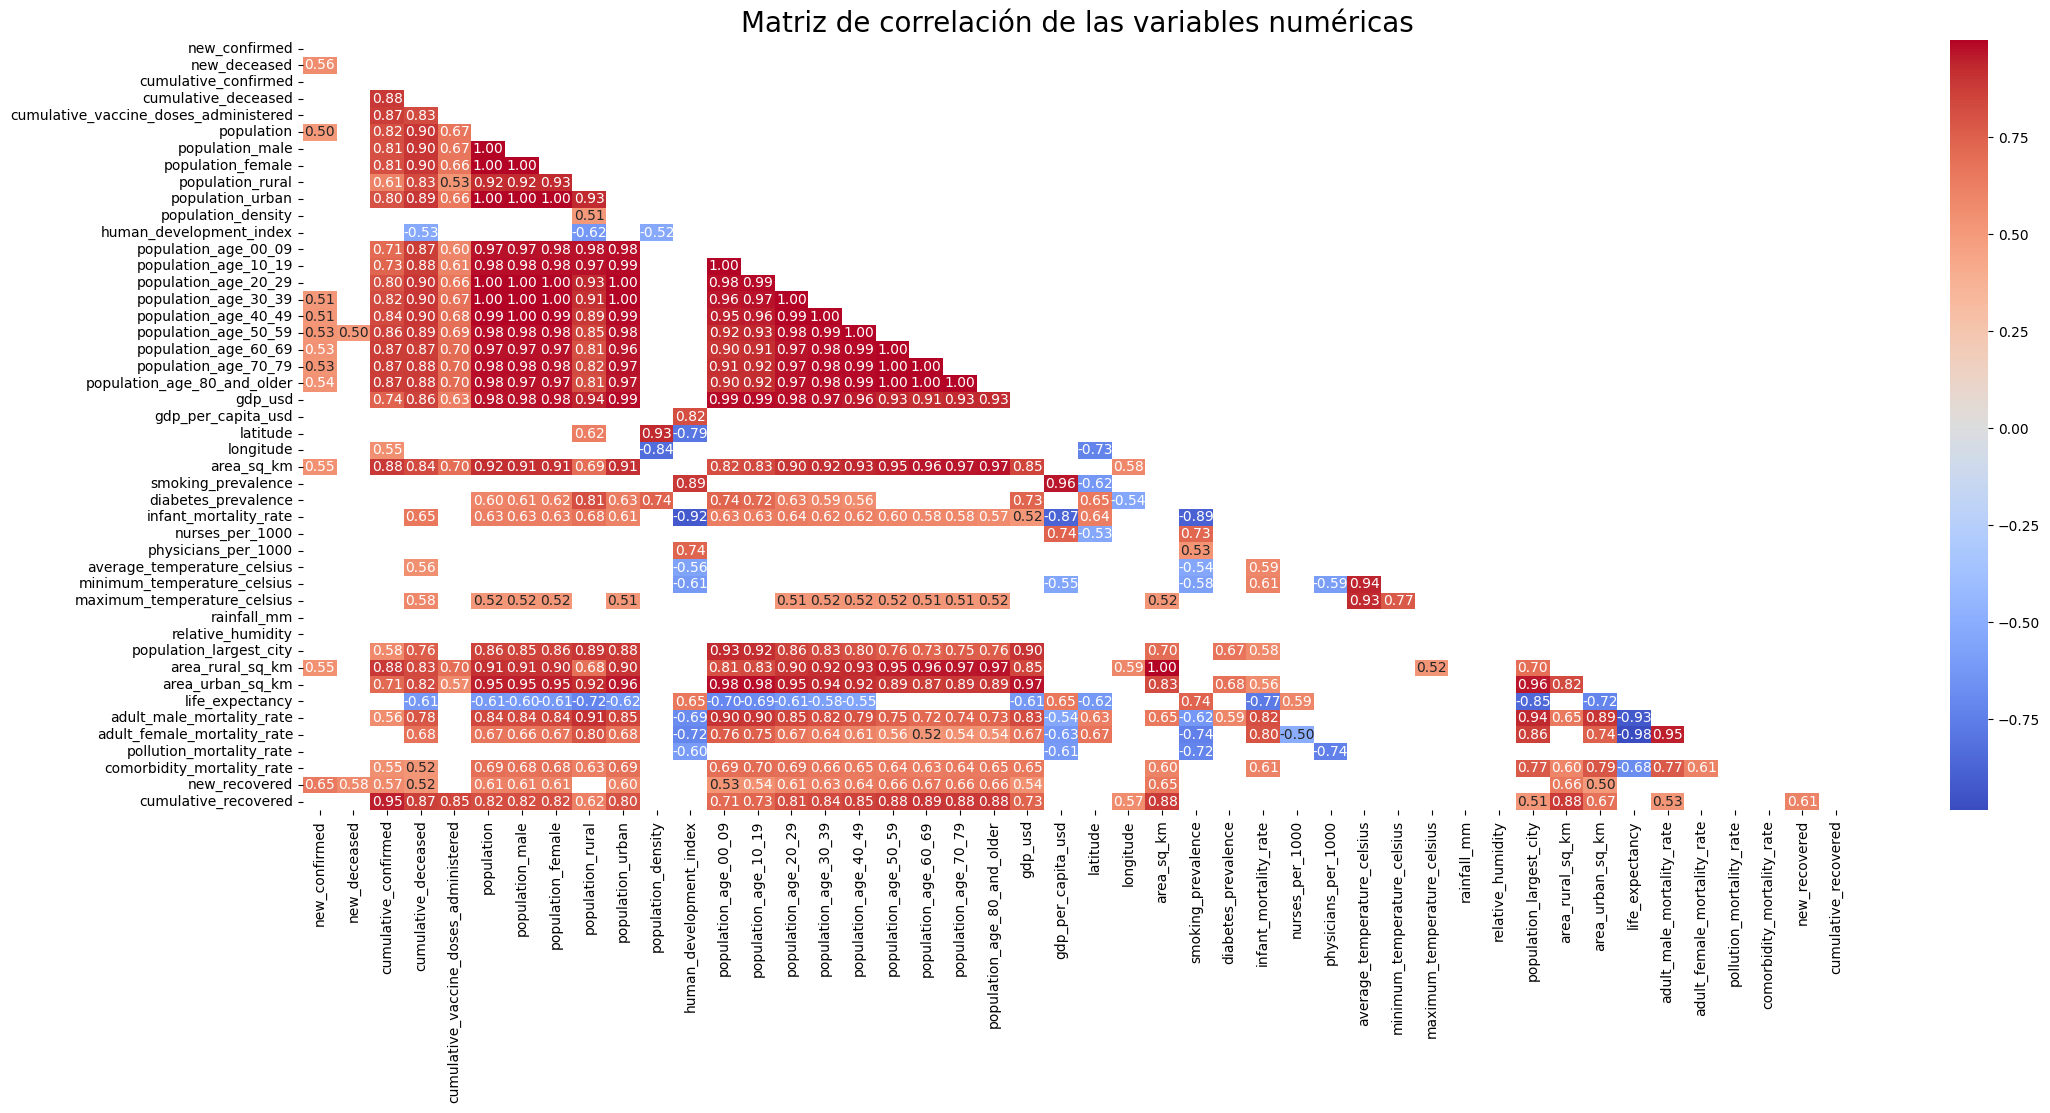

In [ ]:
# Se crea la matriz de correlación de las variables numéricas
# Seleccionamos las columnas numéricas del DataFrame
numeric_columns = data_latinoamerica_paises.select_dtypes(include=['float64', 'int64']).columns

# Calculamos la matriz de correlación entre las columnas numéricas seleccionadas
correlation_matrix = data_latinoamerica_paises[numeric_columns].corr()

# Aquí se crea máscara para el triángulo superior
# Creamos una máscara para ocultar el triángulo superior de la matriz de correlación
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Vamos a mostrar valores superiores a 0.5 es decir donde hay una correlación fuerte sin embargo también se puede mostrar valores negativos.
# Filtramos la matriz de correlación para mostrar solo las correlaciones fuertes (mayores a 0.5 en valor absoluto)
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]

# Se crea la gráfica
# Establecemos el tamaño de la figura
plt.figure(figsize=(25, 10))

# Generamos el heatmap de la matriz de correlación con la máscara aplicada, anotaciones y un mapa de colores 'coolwarm'
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')

# Añadimos un título a la gráfica
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)

# Mostramos la gráfica
plt.show()

La matriz de correlación proporcionada visualiza las interrelaciones entre diversas variables numéricas, con un énfasis en identificar relaciones fuertes (correlaciones con un valor absoluto mayor a 0.5). Esta representación es útil para identificar patrones y dependencias potenciales entre diferentes factores.

Conclusiones Clave:

**Correlaciones Positivas Fuertes:** Existen varias correlaciones altamente positivas entre las variables demográficas (como la población por grupos de edad), económicas (PIB per cápita), y de salud (tasas de mortalidad). Esto indica que estas áreas están estrechamente vinculadas y que cambios en una podrían estar asociados con cambios en las otras.

**Correlaciones Negativas:** Algunas variables muestran correlaciones negativas moderadas, por ejemplo, entre nuevas confirmaciones de casos y dosis de vacunas administradas. Esto podría sugerir que a medida que aumenta la cobertura de vacunación, la cantidad de nuevos casos confirmados tiende a disminuir.

Visualización Efectiva: El uso de una máscara para ocultar el triángulo superior de la matriz de correlación ayuda a simplificar la visualización, evitando la redundancia en la representación de las correlaciones simétricas..

**Grafico de barras**

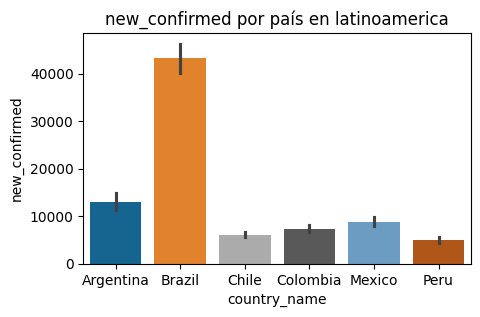

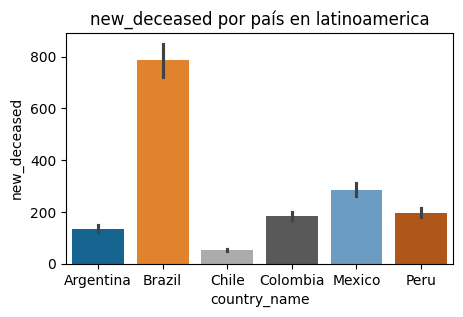

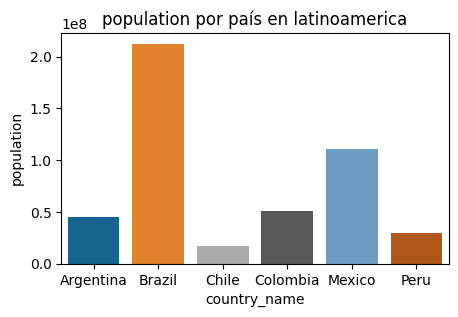

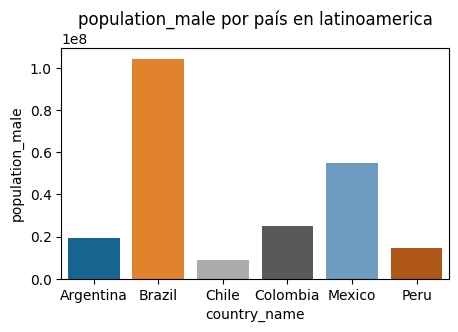

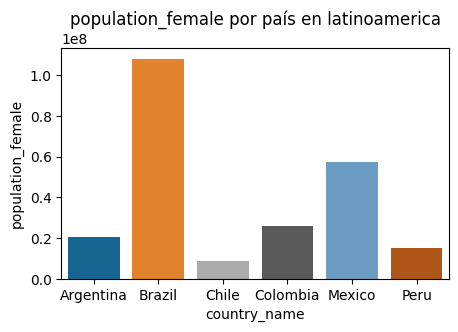

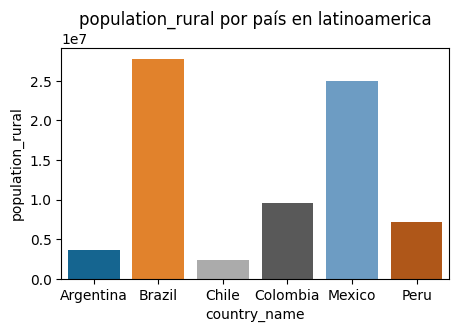

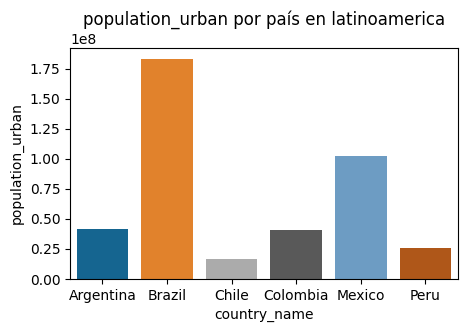

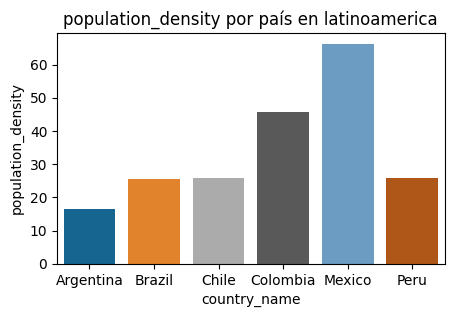

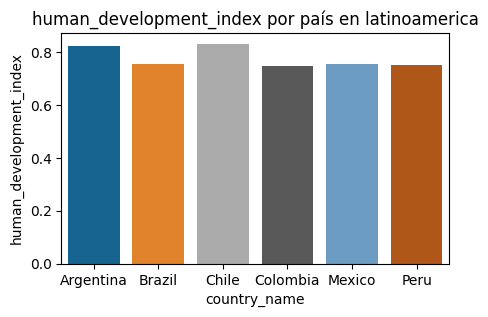

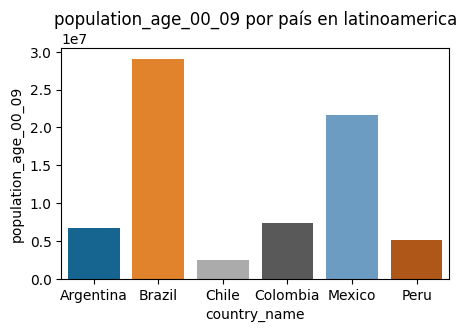

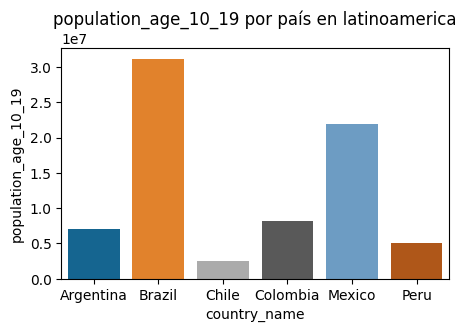

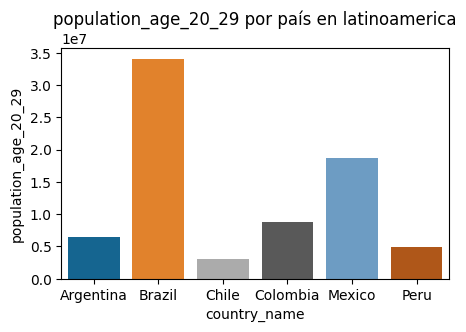

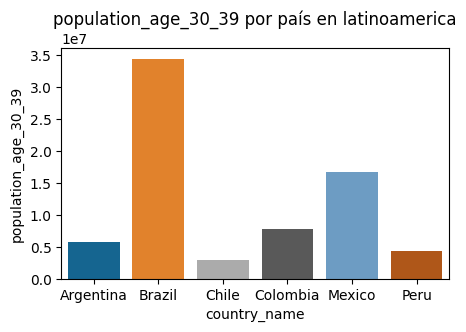

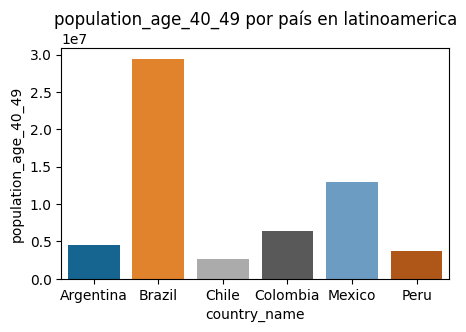

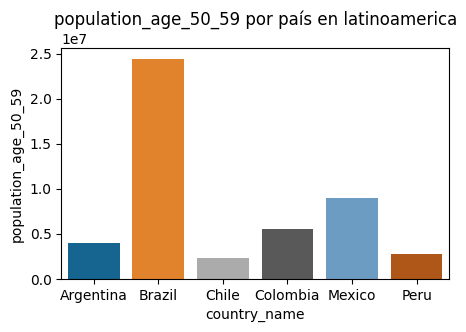

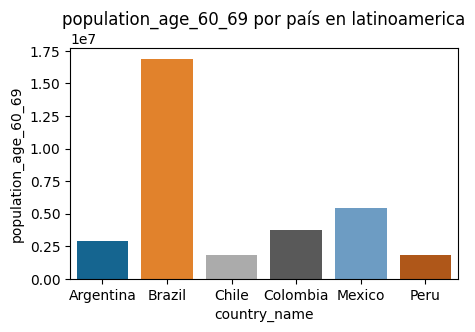

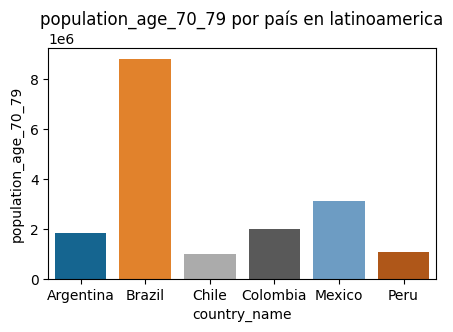

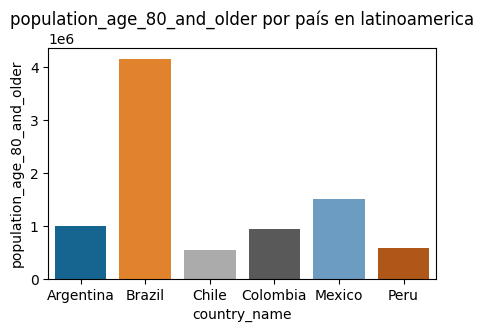

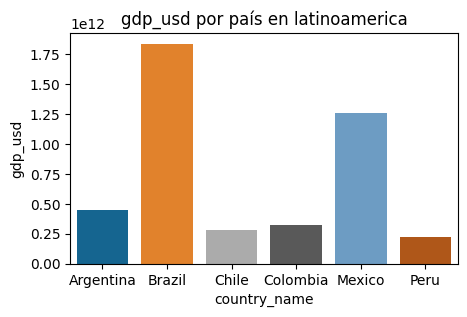

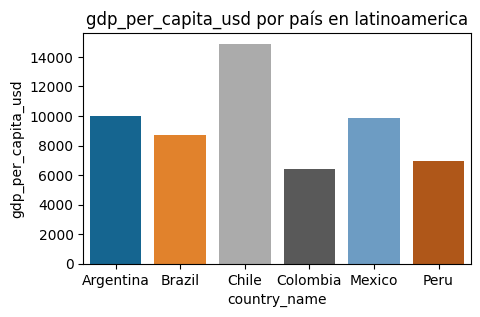

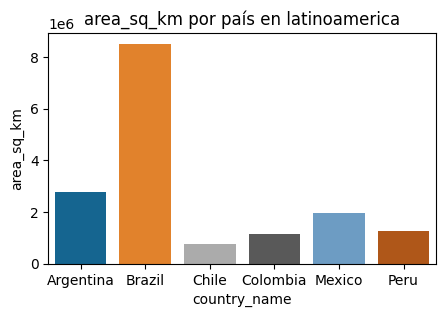

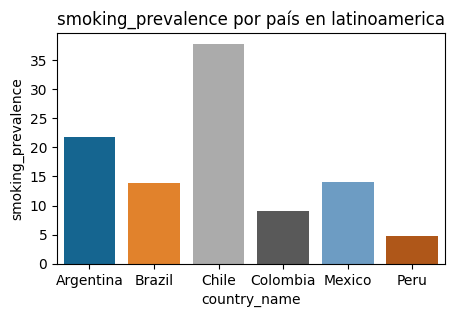

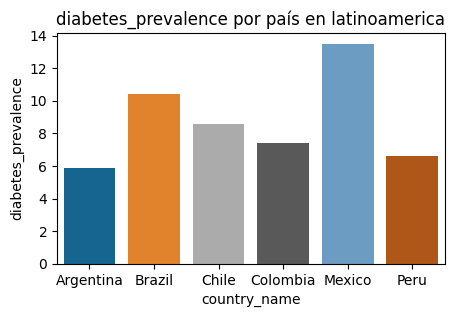

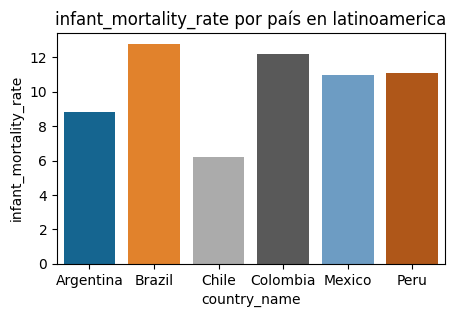

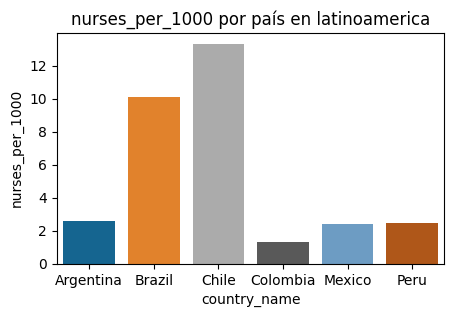

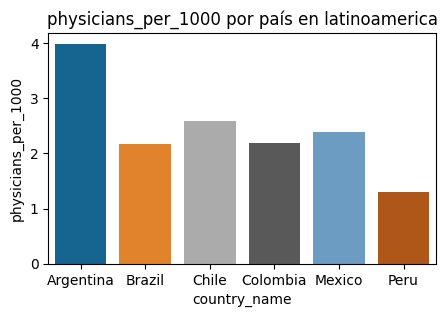

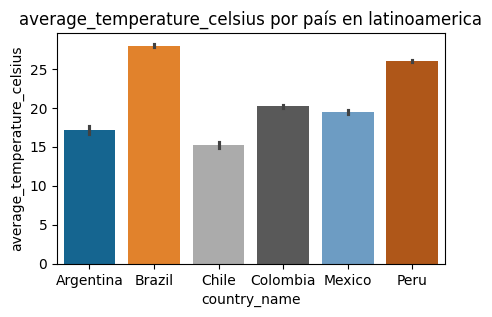

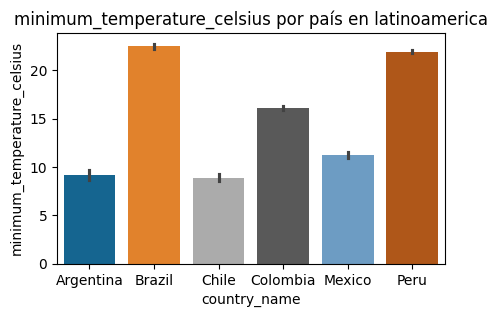

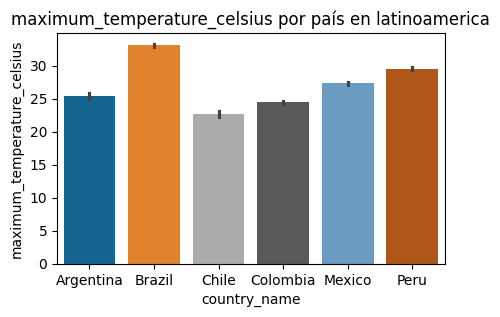

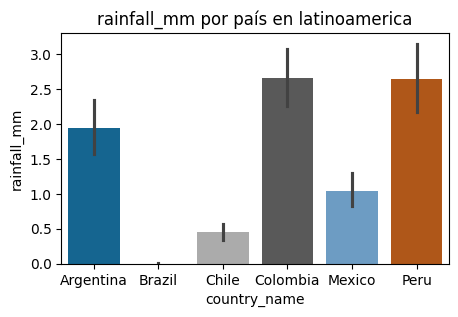

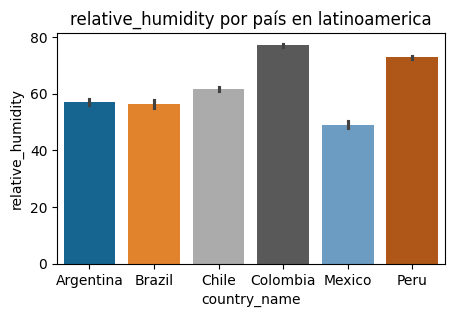

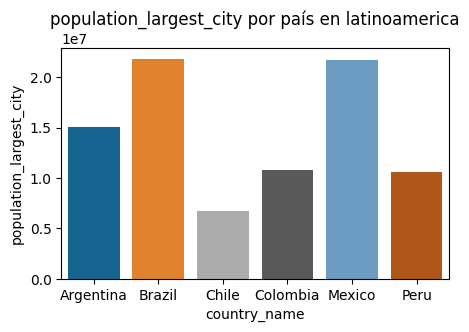

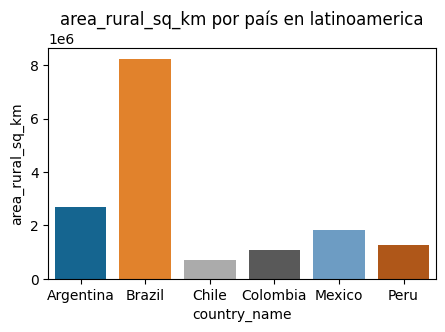

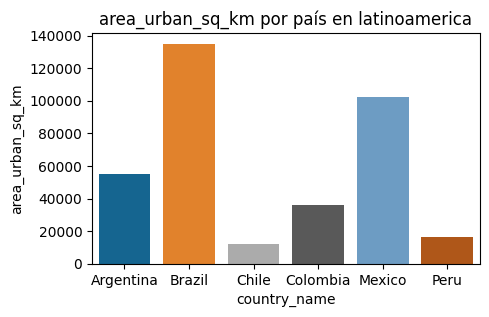

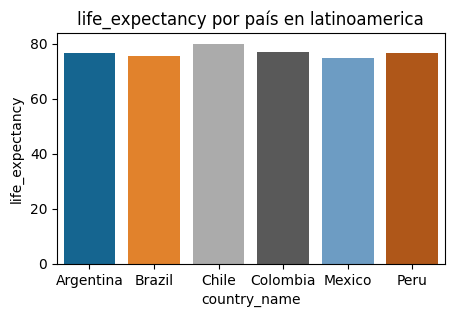

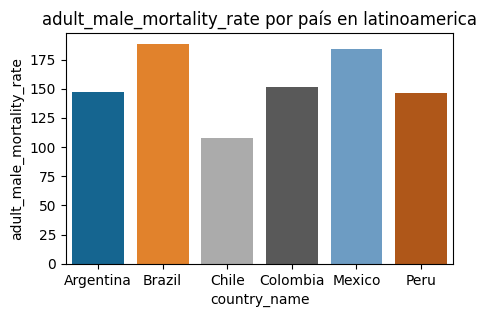

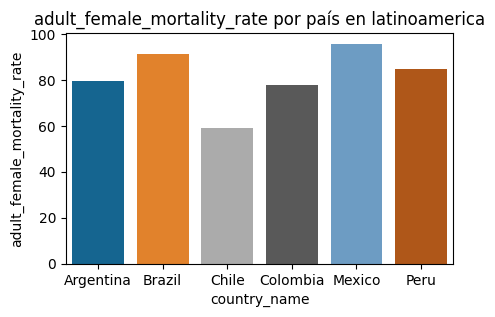

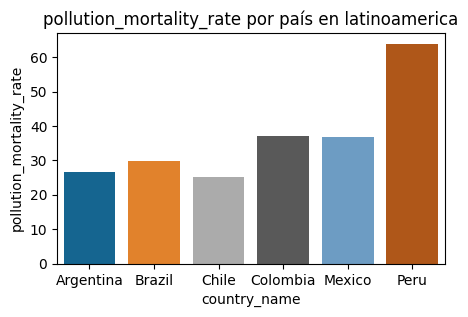

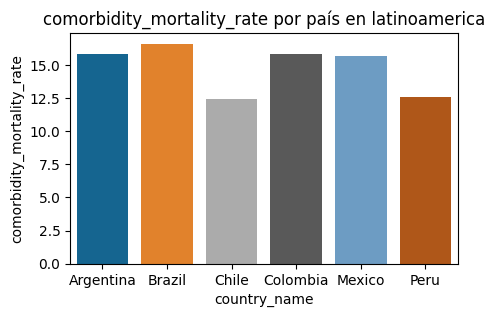

In [ ]:
# Diagrama de barras para cada país en data_latinoamerica_paises con 6 columnas

# Iteramos sobre cada columna en el DataFrame data_latinoamerica_paises
for i in data_latinoamerica_paises.columns:
    
    # Excluimos ciertas columnas que no tienen sentido graficar en un barplot
    if i not in ['location_key', 'date', 'country_code', 'country_name', 'latitude', 'longitude', 
                 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 
                 'cumulative_vaccine_doses_administered', 'new_recovered']:
        
        # Configuramos la figura y los ejes para el gráfico de barras
        fig, ax = plt.subplots(figsize=(5, 3))
        
        # Creamos un gráfico de barras (barplot) utilizando seaborn
        sns.barplot(x='country_name', y=i, data=data_latinoamerica_paises, ax=ax, hue=('country_name'))
        
        # Añadimos un título al gráfico
        plt.title(f'{i} por país en latinoamerica')
        
        # Mostramos el gráfico
        plt.show()

Se pueden extraer varios insights clave que serán útiles para evaluar la situación de COVID-19 en los países latinoamericanos.

Diferencias Significativas en Casos Confirmados y Mortalidad: 

Brasil muestra un número notablemente alto de casos nuevos confirmados y decesos, lo que sugiere que ha sido uno de los países más afectados en la región. Estos datos resaltan la necesidad de foco en estrategias de mitigación específicas para Brasil.

Población y Demografía: 

Brasil también se destaca por tener la población más grande tanto en términos totales como en la mayoría de las categorías de edad, lo que podría explicar en parte la magnitud de los casos de COVID-19. La estructura de edad de la población puede influir en la respuesta al COVID-19, dado que las tasas de mortalidad y los riesgos de complicaciones suelen aumentar con la edad.

Índice de Desarrollo Humano y Mortalidad: 

Hay una variación considerable en el Índice de Desarrollo Humano (IDH) entre los países. Los países con un IDH más alto podrían tener mejores infraestructuras de salud, lo que puede influir en la capacidad para manejar la pandemia.

Recursos de Salud: 

La disponibilidad de personal médico, como enfermeras y médicos por cada 1,000 habitantes, varía significativamente entre los países. Chile y Colombia, por ejemplo, muestran un alto número de enfermeras por 1,000 personas, lo que podría correlacionarse con una mejor capacidad de respuesta a la salud pública.

Mortalidad por Contaminación y Comorbilidades: 

Perú muestra tasas relativamente altas de mortalidad relacionada con la contaminación y comorbilidades, lo que podría ser un factor de riesgo adicional para la población en el contexto de la pandemia de COVID-19, ya que estas condiciones pueden exacerbar los casos de COVID-19.

Impacto Ambiental y Social: 

La temperatura, la humedad y las tasas de mortalidad por contaminación son indicadores indirectos de las condiciones ambientales y de vida que podrían afectar la transmisión del virus y la vulnerabilidad de la población.

Urbanización y Densidad de Población: 

La densidad de población y la urbanización son factores críticos en la propagación de enfermedades infecciosas. Países con altas tasas de urbanización y densidad poblacional, como México y Brasil, podrían enfrentar desafíos adicionales en el control de la propagación del virus.

Estos insights son fundamentales para entender cómo las características demográficas, socioeconómicas y de salud pública de cada país pueden influir en la propagación del COVID-19 y en la efectividad de las respuestas sanitarias. Estos factores deben ser considerados al diseñar e implementar estrategias para combatir la pandemia en diferentes contextos nacionales.

**Histogramas**

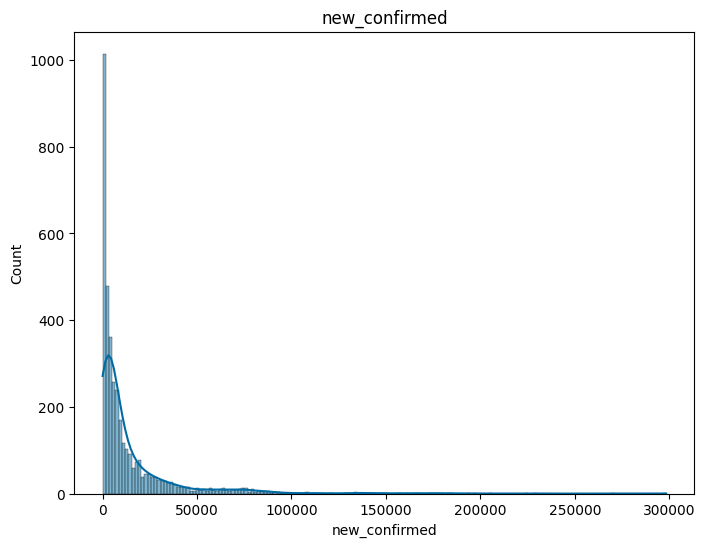

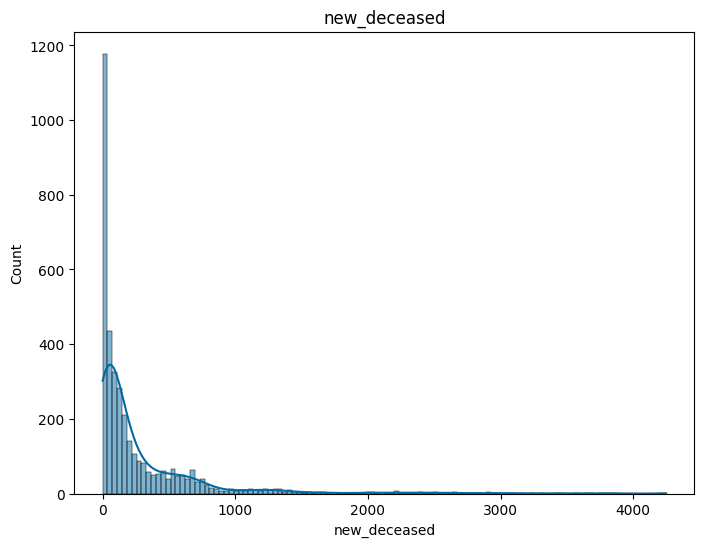

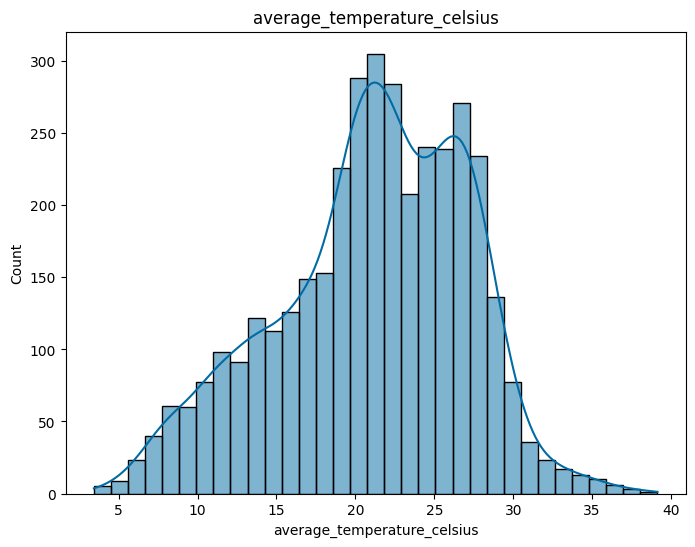

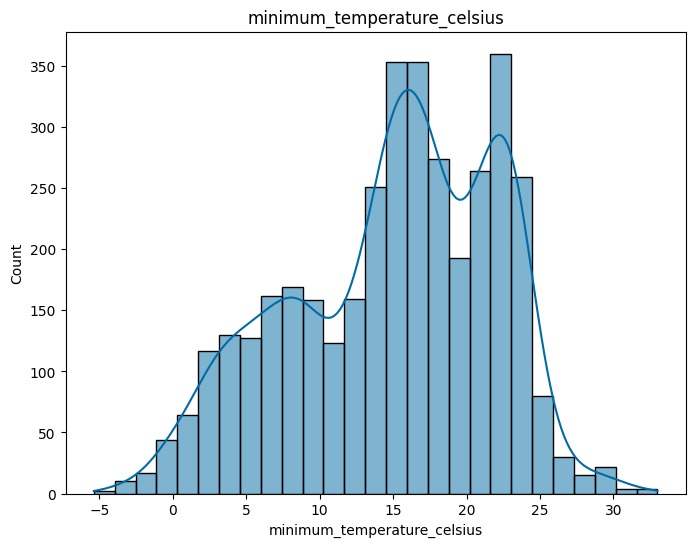

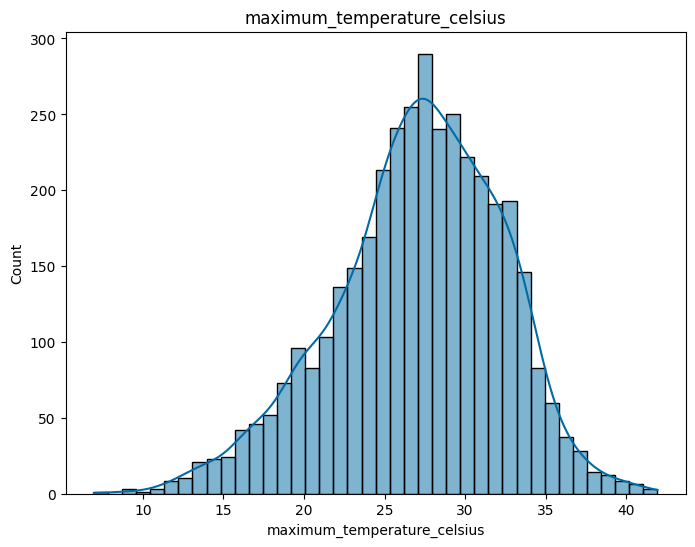

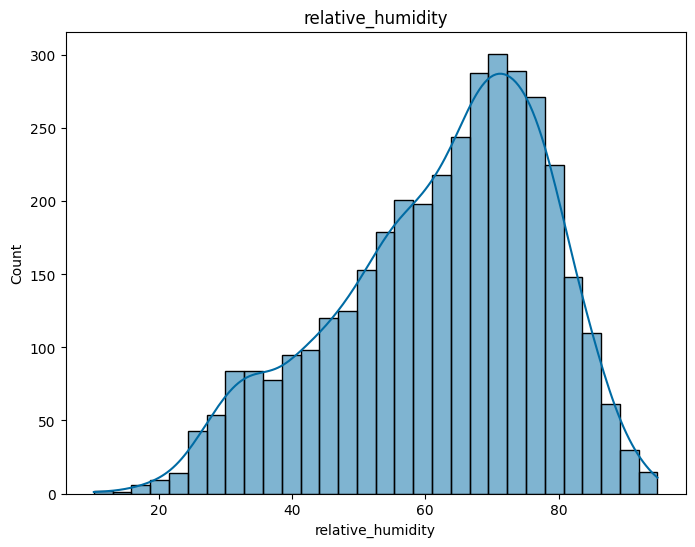

In [ ]:
# Se repite el proceso con un ciclo for pero ahora vamos a realizar histogramas para ver la distribución de algunos de los datos.

# Definimos una lista con las columnas que queremos analizar
lista_columnas_6 = [
    "new_confirmed", "new_deceased", "cumulative_confirmed", "cumulative_deceased", 
    "cumulative_vaccine_doses_administered", "average_temperature_celsius", 
    "minimum_temperature_celsius", "maximum_temperature_celsius", "relative_humidity"
]

# Crear histogramas de las variables numéricas
for i in data_latinoamerica_paises[lista_columnas_6]:
    # Excluimos ciertas columnas que no tienen sentido graficar en un histograma
    if i not in ['location_key', 'date', 'country_code', 'country_name', 'latitude', 'longitude', 
                 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 
                 'cumulative_vaccine_doses_administered']:
        
        # Configuramos la figura y los ejes para el histograma
        fig, ax = plt.subplots(figsize=(8, 6))
        
        # Creamos un histograma utilizando seaborn
        sns.histplot(data_latinoamerica_paises[i], kde=True)
        
        # Añadimos un título al histograma
        plt.title(i)
        
        # Mostramos el histograma
        plt.show()


Los gráficos proporcionados ofrecen insights valiosos sobre la situación demográfica, económica, y de salud en los países latinoamericanos, lo cual es crucial para la evaluación de la gestión y los impactos de la COVID-19. 

Aquí algunos puntos clave para destacar:

Desigualdad Demográfica:
 Brasil domina en términos de población, tanto total como en segmentos específicos (urbano, rural). Esto puede afectar la propagación y gestión de la COVID-19 debido a la densidad poblacional y los retos logísticos que implica.

Recursos de Salud: La cantidad de profesionales de la salud (enfermeras y médicos por cada 1000 habitantes) varía significativamente entre los países. Chile y Colombia muestran altas tasas, lo que podría indicar mejor capacidad para manejar emergencias sanitarias.

Mortalidad y Comorbilidades: 

Las tasas de mortalidad por contaminación y comorbilidades como la diabetes son indicadores críticos de la salud general de la población, lo cual puede influir en la severidad de los casos de COVID-19.

Temperaturas y Humedad: 

Los histogramas muestran una distribución variada de temperaturas y humedad, lo que podría tener implicaciones en la transmisión del virus, aunque las correlaciones directas con la COVID-19 son aún objeto de estudio.

Impacto Económico y Expectativa de Vida: 

El PIB y la expectativa de vida varían ampliamente, indicando diferencias en el desarrollo y posiblemente en la resiliencia frente a crisis sanitarias.

Confirmados y Decesos por COVID-19: 

Los histogramas de casos nuevos confirmados y decesos muestran una distribución altamente sesgada, con la mayoría de los días reportando cifras relativamente bajas, lo que puede reflejar tanto la efectividad de las medidas de control como los desafíos en la recopilación de datos.

Relación entre Temperatura Media y Nuevos Casos Confirmados de COVID-19 en Países de Latinoamérica



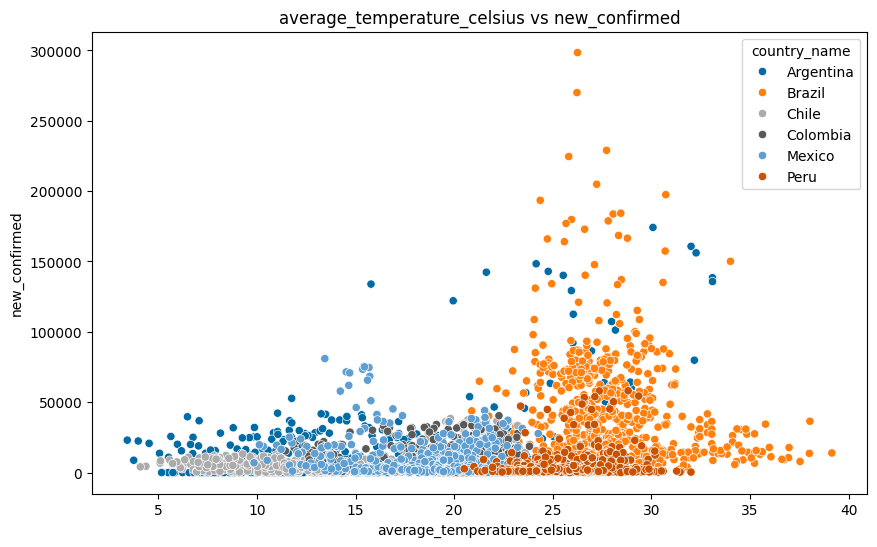

In [ ]:
# En este caso vamos a analizar la variable average_temperature y la variable new_confirmed,
# con el fin de tratar de entender el comportamiento de los casos respecto a la temperatura.

# Gráfica de average_temperature_celsius vs new_confirmed
fig, ax = plt.subplots(figsize=(10, 6))

# Creamos un gráfico de dispersión (scatter plot) utilizando seaborn
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=data_latinoamerica_paises, hue='country_name')

# Añadimos un título al gráfico
plt.title('average_temperature_celsius vs new_confirmed')

# Mostramos el gráfico
plt.show()

El gráfico de dispersión que muestra la relación entre la temperatura media y los nuevos casos confirmados de COVID-19 en varios países de Latinoamérica proporciona varios insights importantes que podrían ser útiles para la evaluación y gestión de la pandemia:

Distribución de Casos: 

La mayoría de los países muestra un aumento de casos confirmados con temperaturas medias que varían entre 5 y 25 grados Celsius, con una notable dispersión en el número de casos a medida que aumenta la temperatura. Esto sugiere que no hay una relación directa y clara entre la temperatura y la propagación del virus, contrariamente a algunas hipótesis iniciales sobre el COVID-19.

Ausencia de Tendencia Clara: 

No se observa una tendencia lineal clara que relacione la temperatura con el aumento de los casos de COVID-19. Esto indica que otros factores, como las políticas de salud pública, la densidad poblacional, y la movilidad de las personas, pueden ser más determinantes en la propagación del virus que la temperatura ambiental por sí sola.

Picos en Casos: 

Algunos países como Brasil y México muestran picos más altos en el número de casos nuevos, lo cual podría estar relacionado con su mayor población y posiblemente con medidas de control y prevención menos estrictas o eficaces en ciertos períodos.

Análisis por País: 

Cada país tiene un patrón de dispersión característico, lo que sugiere que las condiciones locales específicas (como las intervenciones de salud pública y el comportamiento social) pueden tener un impacto significativo en la cantidad de casos reportados, más allá de las condiciones climáticas.

Implicaciones para Políticas Públicas: 

Este gráfico puede ayudar a los responsables de la formulación de políticas a entender que las respuestas al COVID-19 deben ser adaptativas y no pueden basarse exclusivamente en factores ambientales como la temperatura. Es esencial considerar una combinación de intervenciones adaptadas a las condiciones y necesidades locales.

Como vimos que la temperatura puede tener en algunos paises alguna relación con los casos confirmados, vamos a realizar un análisis de la temperatura promedio con la cantidad de muertes.

Diagrama de dispersión de la temperatura media contra las muertes confirmadas

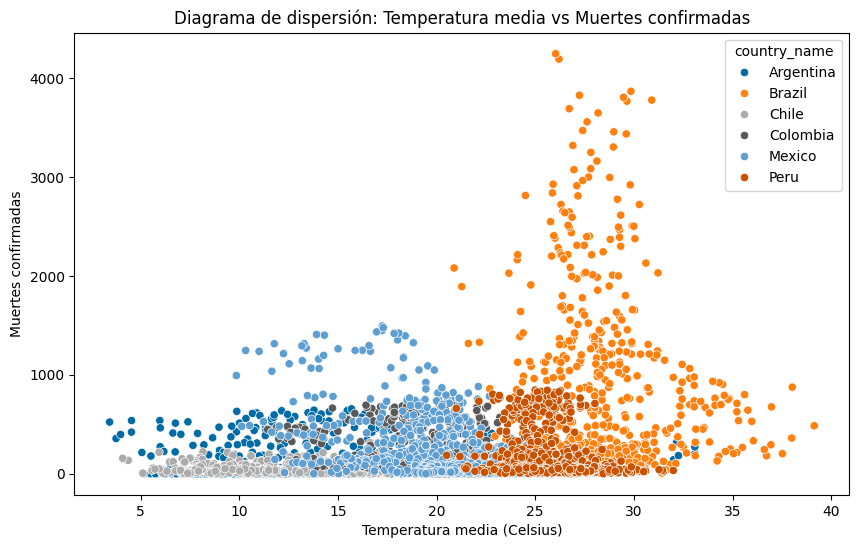

In [ ]:
# Crear una figura y un conjunto de ejes con tamaño 10x6 pulgadas
fig, ax = plt.subplots(figsize=(10, 6))

# Crear un scatter plot de average_temperature_celsius vs new_deceased
# x: Define el eje X con la columna 'average_temperature_celsius'
# y: Define el eje Y con la columna 'new_deceased'
# data: Utiliza el DataFrame 'data_latinoamerica_paises'
# hue: Colorea los puntos según la columna 'country_name'
sns.scatterplot(x='average_temperature_celsius', y='new_deceased', data=data_latinoamerica_paises, hue='country_name', ax=ax)

# Establecer el título del gráfico
plt.title('Diagrama de dispersión: Temperatura media vs Muertes confirmadas')

# Establecer la etiqueta del eje X
plt.xlabel('Temperatura media (Celsius)')

# Establecer la etiqueta del eje Y
plt.ylabel('Muertes confirmadas')

# Mostrar el gráfico
plt.show()


El gráfico de dispersión que muestra la relación entre la temperatura media y las muertes confirmadas de COVID-19 en varios países de Latinoamérica aporta varios insights clave:

Distribución de Muertes: 

A diferencia de los casos confirmados, las muertes parecen concentrarse más en rangos bajos sin importar la temperatura, con la excepción de algunos valores atípicos. Esto sugiere que las muertes pueden estar más relacionadas con otros factores como la capacidad del sistema de salud, la demora en la atención médica, o la prevalencia de comorbilidades en la población.

Ausencia de Correlación Clara: 

No se observa una relación clara o lineal entre la temperatura media y las muertes confirmadas. Esto podría indicar que las muertes por COVID-19 son influenciadas por una multitud de factores y no necesariamente por la temperatura ambiental.

Variabilidad por País: 

El gráfico muestra una considerable variabilidad en el número de muertes entre los países. Países como Brasil y México muestran puntos más altos, lo que podría reflejar tanto su mayor población como posibles desafíos en la gestión de la pandemia.

El punto verde solitario de Chile: 

El punto verde de Chile que aparece aislado y más alto en el gráfico indica un día o periodo donde las muertes confirmadas fueron significativamente más altas en comparación con otros días a una temperatura similar. Este punto podría representar un evento específico como un brote severo, un cambio en la metodología de reporte, o la actualización de datos acumulados que no se habían reportado anteriormente. Este tipo de observaciones puede ser crucial para entender y discutir las dinámicas de reporte y manejo de la pandemia en Chile.

Por lo tanto, se hace una primera aproximación y observaremos las dosis administradas por mes en todos los países.

In [ ]:
data_latinoamerica_paises.head()

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   
2021-01-06       19523766.0  ...               15057273.0         2690269.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02           55032.0            76.52                    147.086   
2021-01-03           55032.0            76.52                    147.086   
2021-01-04           55032.0            76.52                    147.086   
2021-01-05           55032.0            76.52                    147.086   
2021-01-06           55032.0            76.52                    147.086   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                       79.483                      26.6   
2021-01-03                       79.483                      26.6   
2021-01-04                       79.483                      26.6   
2021-01-05                       79.483                      26.6   
2021-01-06                       79.483                      26.6   

            comorbidity_mortality_rate  new_recovered  cumulative_recovered  
date                                                                         
2021-01-02                        15.8            0.0                   0.0  
2021-01-03                        15.8            0.0                   0.0  
2021-01-04                        15.8            0.0                   0.0  
2021-01-05                        15.8            0.0                   0.0  
2021-01-06                        15.8            0.0                   0.0  

[5 rows x 49 columns]

Comportamiento de las dosis administradas de todos los países (Valor medio)

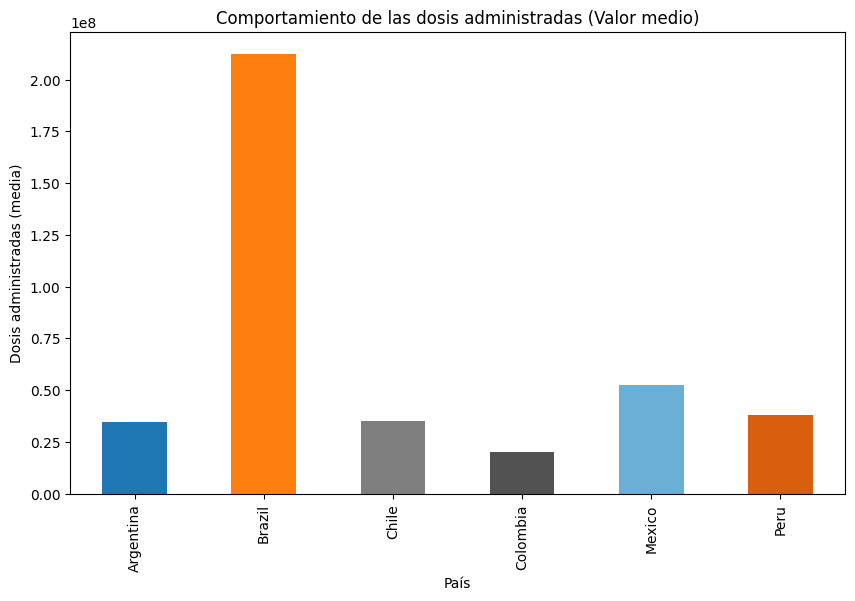

In [ ]:
# Calcular el valor medio de las dosis administradas por país
# Agrupa los datos por el nombre del país y calcula la media de las dosis de vacunas administradas acumuladas.
dosis_media = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].mean()

# Crear una figura y un eje para el gráfico con un tamaño específico
fig, ax = plt.subplots(figsize=(10, 6))

# Crear un gráfico de barras para mostrar el valor medio de las dosis administradas por país
# 'kind' especifica que se quiere un gráfico de barras
# 'ax' indica en qué eje se dibujará el gráfico
dosis_media.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#7f7f7f', '#525252', '#6baed6', '#d95f0e'], ax=ax)


# Añadir un título al gráfico
plt.title('Comportamiento de las dosis administradas (Valor medio)')

# Etiquetar el eje X
plt.xlabel('País')

# Etiquetar el eje Y
plt.ylabel('Dosis administradas (media)')

# Mostrar el gráfico
plt.show()


Los insights más importantes del gráfico sobre el comportamiento de las dosis administradas de la vacuna COVID-19 en distintos países de Latinoamérica pueden resumirse y escalarse de la siguiente manera:

Brasil > México > Perú > Colombia > Chile > Argentina

Brasil lidera ampliamente en la administración de dosis de vacuna, lo que indica una fuerte capacidad y ejecución en su campaña de vacunación.

México sigue a Brasil con una cantidad significativa de dosis administradas, mostrando también un esfuerzo considerable en su programa de vacunación.

Perú y Colombia tienen cifras menores comparadas con México, pero aún así muestran avances importantes en sus respectivas campañas de vacunación.

Chile y Argentina, aunque presentan las cifras más bajas, aún reflejan esfuerzos en la vacunación que deben ser evaluados y posiblemente intensificados.

Gráfica de la evolución mensual de las dosis acumuladas administradas en todos los países

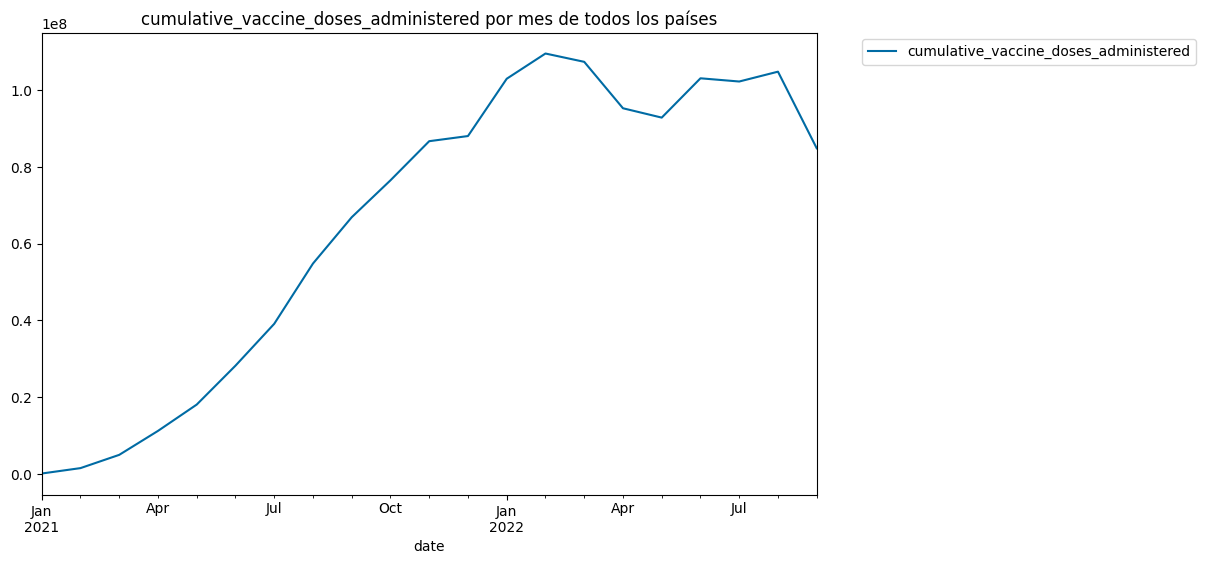

In [ ]:
# Gráfica de valores medios de todos los países cumulative_vaccine_doses_administered

# Crear una figura y un conjunto de ejes con tamaño 10x6 pulgadas
fig, ax = plt.subplots(figsize=(10, 6))

# Resamplear los datos para obtener promedios mensuales
# 'ME' significa fin de mes
# resample('M'): Agrupa los datos por mes.
# mean(numeric_only=True): Calcula el promedio mensual de todas las columnas numéricas
# plot(ax=ax): Grafica los datos en los ejes creados previamente. Esto genera el gráfico de la evolución de las dosis administradas mensualmente.
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot(ax=ax)

# Configurar la leyenda del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Establecer el título del gráfico
plt.title('cumulative_vaccine_doses_administered por mes de todos los países')

# Mostrar el gráfico
plt.show()


El gráfico muestra un crecimiento inicial fuerte en las dosis de vacunas administradas, seguido de fluctuaciones y una disminución hacia fines de 2022. Esta tendencia sugiere que las campañas de vacunación inicialmente tuvieron éxito, pero luego enfrentaron desafíos como la saturación del mercado y posiblemente la hesitación en vacunarse. 

Evolución del valor medio de las dosis administradas por mes de cada país

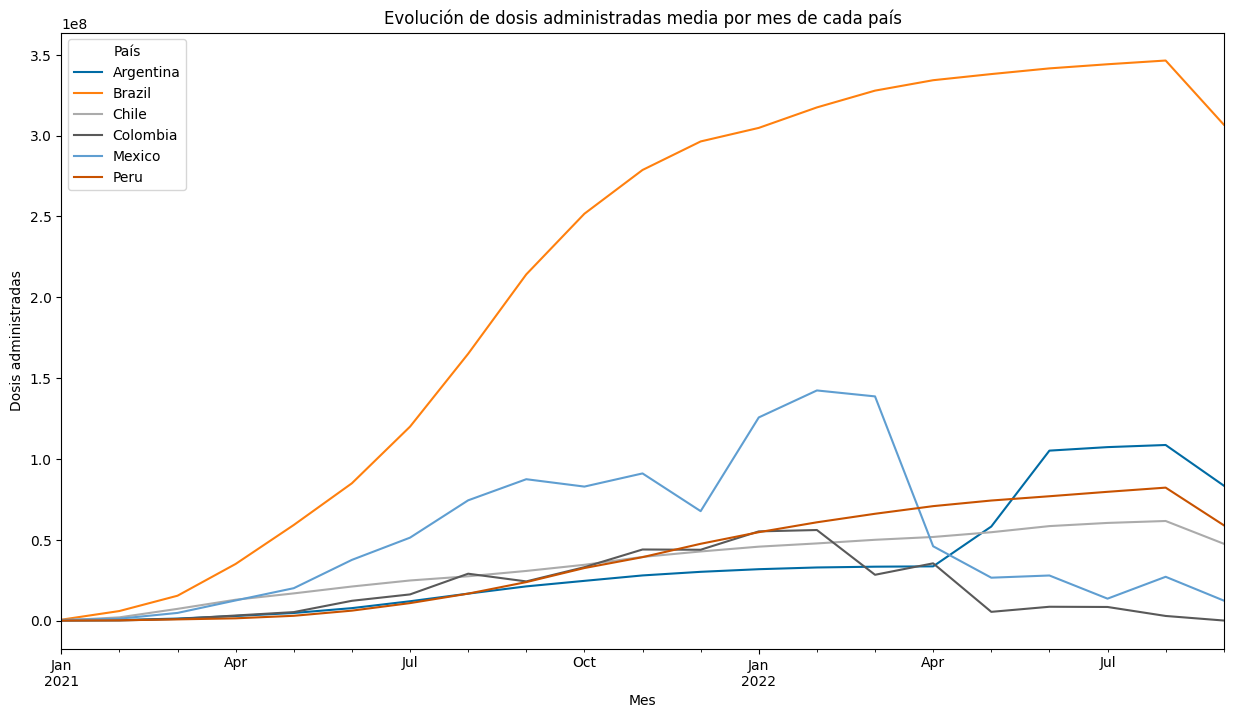

In [ ]:
# Asegurándonos de que el índice 'date' esté en formato datetime
# Esto es crucial para realizar operaciones basadas en fechas
data_latinoamerica_paises.index = pd.to_datetime(data_latinoamerica_paises.index)

# Crear una columna 'month' basada en el índice 'date'
# Convertimos el índice datetime en un período mensual para agrupar datos por mes
data_latinoamerica_paises['month'] = data_latinoamerica_paises.index.to_period('M')

# Agrupar y sumar las dosis mensuales
# Agrupamos los datos por 'country_name' y 'month', luego calculamos la media de 'cumulative_vaccine_doses_administered'
# 'unstack' convierte el índice 'country_name' en columnas
dosis_mensuales = data_latinoamerica_paises.groupby(['country_name', 'month'])['cumulative_vaccine_doses_administered'].mean().unstack('country_name')

# Graficar la evolución de dosis administradas por mes de cada país
# Usamos 'plot' para graficar el DataFrame resultante con un tamaño de figura específico
dosis_mensuales.plot(figsize=(15, 8))

# Añadir un título al gráfico
plt.title('Evolución de dosis administradas media por mes de cada país')

# Etiquetar el eje X
plt.xlabel('Mes')

# Etiquetar el eje Y
plt.ylabel('Dosis administradas')

# Añadir una leyenda con el título 'País'
plt.legend(title='País')

# Mostrar el gráfico
plt.show()

En la gráfica se puede observar la cantidad de dosis administradas en los países de Argentina, Brasil, Chile, Colombia, México y Perú.

Podemos observar que en algunos países la cantidad de dosis administradas ha ido aumentando a lo largo del tiempo, sin embargo en otros países la cantidad de dosis administradas ha ido disminuyendo. Esto puede ser debido a muchos factores, como la cantidad de vacunas disponibles, la cantidad de personas que se han vacunado, entre otros.

Muertes por mes de cada país

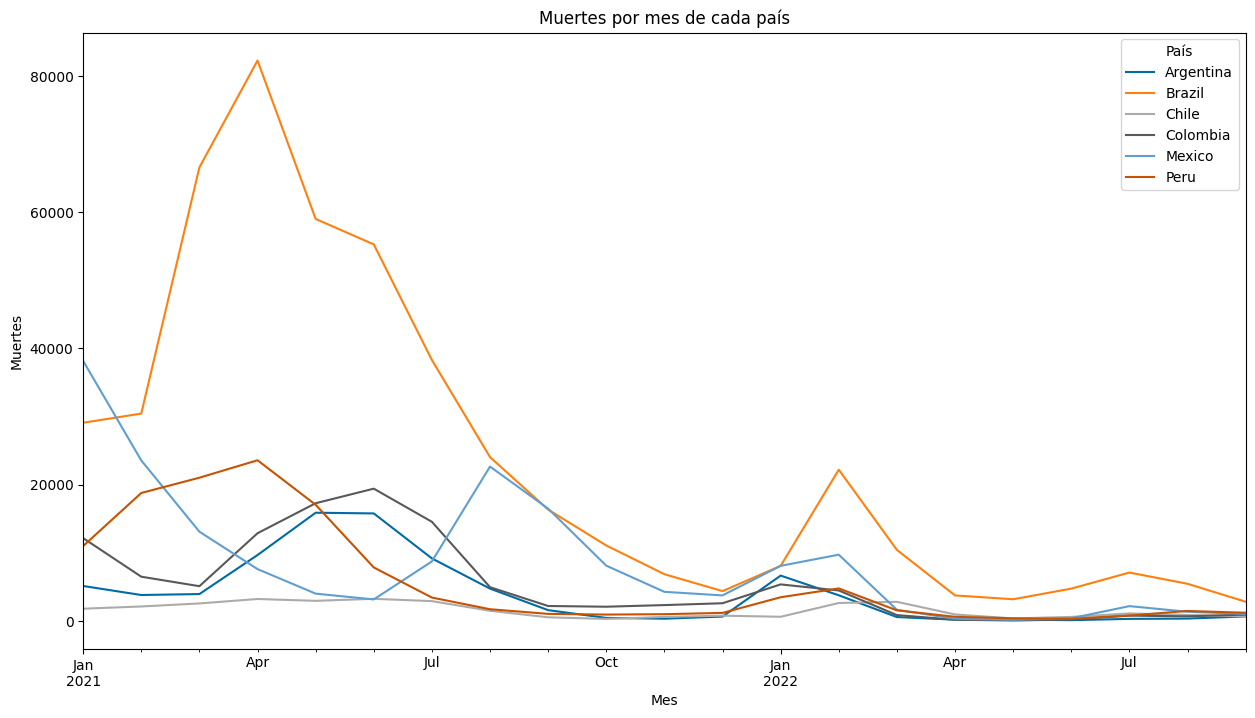

In [ ]:
# Agrupar los datos por nombre del país y mes, luego sumar las muertes nuevas para cada grupo
# Transforma el nivel country_name del índice de fila a las columnas, creando una columna separada para cada país (pivotear).

muertes_mensuales = data_latinoamerica_paises.groupby(['country_name', 'month'])['new_deceased'].sum().unstack('country_name')

# Graficar la evolución mensual de las muertes para cada país
muertes_mensuales.plot(figsize=(15, 8))

# Establecer el título del gráfico
plt.title('Muertes por mes de cada país')

# Establecer la etiqueta del eje X
plt.xlabel('Mes')

# Establecer la etiqueta del eje Y
plt.ylabel('Muertes')

# Configurar la leyenda del gráfico, con el título 'País'
plt.legend(title='País')

# Mostrar el gráfico
plt.show()

El gráfico muestra la evolución mensual de las muertes por COVID-19 en varios países de Latinoamérica. Brasil destaca con un pico dramático en muertes a mediados de 2021, indicando una severa ola de la pandemia en ese periodo. Posteriormente, las cifras en todos los países tienden a disminuir, lo cual podría estar correlacionado con el aumento en la cobertura de vacunación observado en gráficos anteriores. Fluctuaciones menores en otros países sugieren olas epidémicas menos pronunciadas o mejor manejo de la crisis sanitaria tras las primeras olas.



Visualización de Muertes Acumuladas Mensuales por País en América Latina

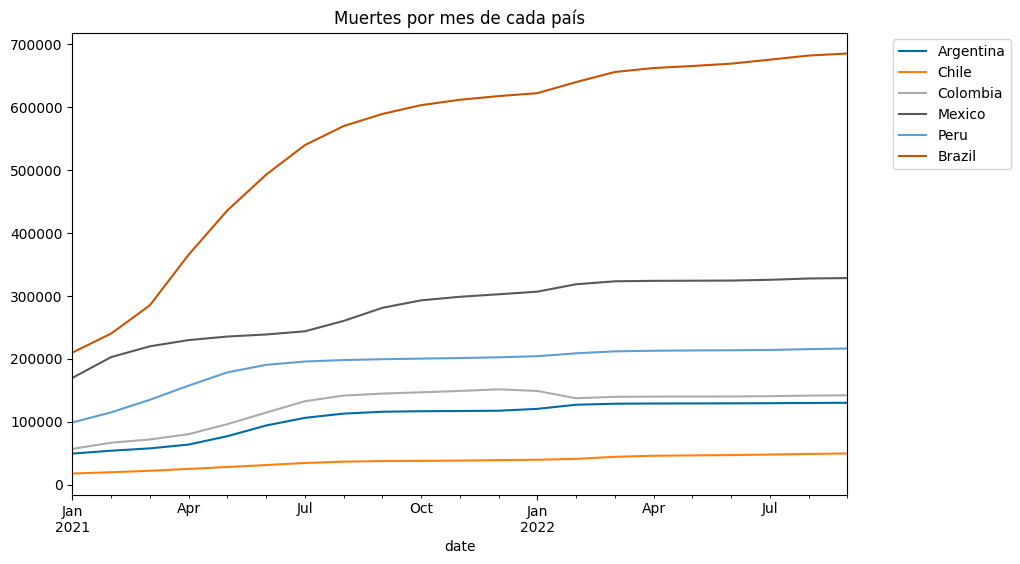

In [ ]:
# Crear una figura y un conjunto de ejes con tamaño 10x6 pulgadas
fig, ax = plt.subplots(figsize=(10, 6))

# Iterar sobre cada país en la lista de países seleccionados
for pais in paises_seleccionados:
    # Filtrar los datos para el país actual
    pais_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'] == pais]
    
    # Asegurarse de que el índice de fecha esté en el formato correcto
    pais_data.index = pd.to_datetime(pais_data.index)
    
    # Resamplear los datos para obtener promedios mensuales
    # 'ME' significa fin de mes
    # resample('ME'): Agrupa los datos por fin de mes.
    # Agrupar los datos por mes y calcular el promedio mensual de todas las columnas numéricas
    mensual_data = pais_data.resample('ME').mean(numeric_only=True)
    
    # Seleccionar la columna 'cumulative_deceased' y graficarla
    mensual_data['cumulative_deceased'].plot(ax=ax, label=pais)

# Establecer el título del gráfico
plt.title('Muertes por mes de cada país')

# Configurar la leyenda del gráfico, ubicándola fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

----El comportamiento anómalo de los datos de México, donde las muertes llegan a cero, indica un error significativo en la recolección o procesamiento de datos. Se corrige en el avance 1 


El gráfico revela que Brasil presenta la mayor cantidad de muertes acumuladas por COVID-19, seguido por Perú y México. La abrupta caída en la línea de México probablemente se debe a una corrección en los datos reportados, lo que resalta la necesidad de consistencia en la información. En general, las tendencias indican una estabilización en las muertes acumuladas a partir de mediados de 2021 en la mayoría de los países.

Casos confirmados por mes de cada país

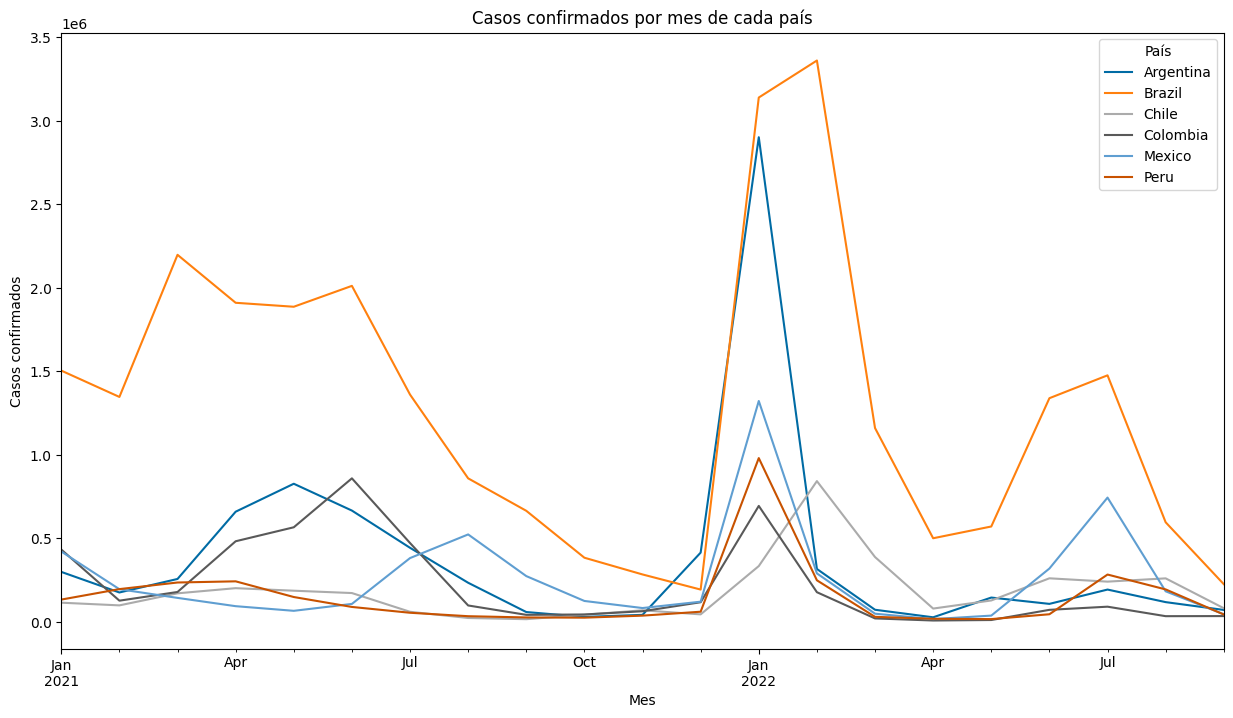

In [ ]:
# Agrupar los datos por nombre del país y mes, luego sumar los casos nuevos para cada grupo
# Esto transforma el nivel 'country_name' del índice de fila a las columnas, creando una columna separada para cada país
casos_confirmados_mensuales = data_latinoamerica_paises.groupby(['country_name', 'month'])['new_confirmed'].sum().unstack('country_name')

# Graficar la evolución mensual de los casos confirmados para cada país
# figsize=(15, 8): Establece el tamaño de la figura en 15x8 pulgadas
casos_confirmados_mensuales.plot(figsize=(15, 8))

# Establecer el título del gráfico
plt.title('Casos confirmados por mes de cada país')

# Establecer la etiqueta del eje X
plt.xlabel('Mes')

# Establecer la etiqueta del eje Y
plt.ylabel('Casos confirmados')

# Configurar la leyenda del gráfico, con el título 'País'
plt.legend(title='País')

# Mostrar el gráfico
plt.show()

El gráfico muestra que Brasil ha tenido consistentemente el mayor número de casos confirmados de COVID-19, con picos significativos a principios de 2022. Argentina, México y Perú también presentan aumentos notables durante el mismo período. En general, la tendencia indica variaciones significativas en los casos confirmados, destacando la necesidad de monitoreo continuo y adaptación de estrategias de control de la pandemia en cada país.


Visualización de la media de casos Confirmados Acumulados Mensuales por País en América Latina

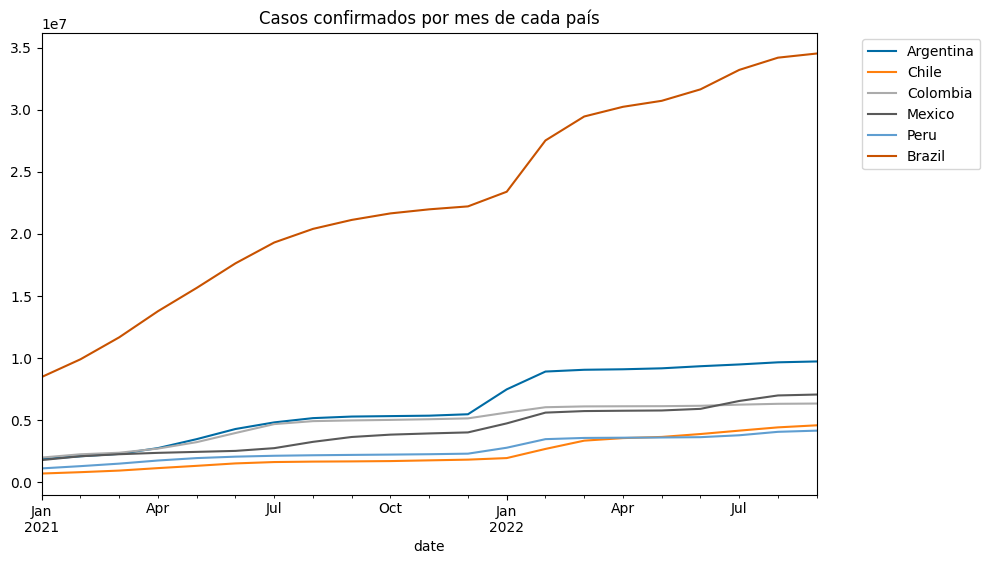

In [ ]:
# Crear una figura y un conjunto de ejes con tamaño 10x6 pulgadas
fig, ax = plt.subplots(figsize=(10, 6))

# Iterar sobre cada país en la lista de países seleccionados
for pais in paises_seleccionados:
    # Filtrar los datos para el país actual y resamplear para obtener promedios mensuales
    # Filtrar los datos para el país actual
    pais_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'] == pais]
    
    # Asegurarse de que el índice de fecha esté en el formato correcto
    pais_data.index = pd.to_datetime(pais_data.index)
    
    # resample('ME'): Agrupa los datos por fin de mes
    # mean(numeric_only=True): Calcula el promedio mensual de todas las columnas numéricas
    mensual_data = pais_data.resample('ME').mean(numeric_only=True)
    
    # ['cumulative_confirmed']: Selecciona la columna 'cumulative_confirmed'
    # plot(ax=ax): Grafica los datos en los ejes creados previamente
    mensual_data['cumulative_confirmed'].plot(ax=ax, label=pais)

# Establecer el título del gráfico
plt.title('Casos confirmados por mes de cada país')

# Configurar la leyenda del gráfico, ubicándola fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

El gráfico muestra que Brasil tiene la mayor acumulación de casos confirmados de COVID-19, seguido por Argentina y Colombia. Chile y México tienen un crecimiento más lento y estable, mientras que Perú muestra una tendencia lineal en el tiempo. Estos patrones reflejan la necesidad de enfoques personalizados en la gestión de la pandemia para cada país.


Recuperaciones de casos por mes de cada país

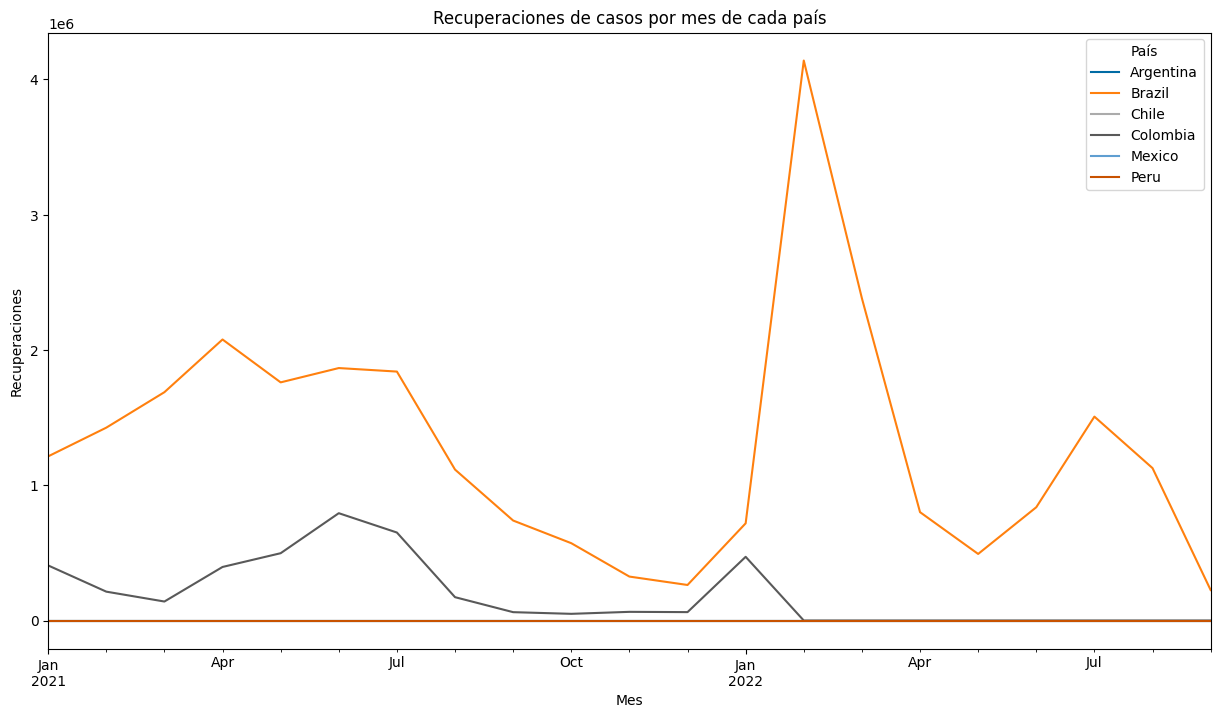

In [ ]:
# Recuperaciones de casos por mes de cada país

# Agrupar los datos por nombre del país y mes, luego sumar las recuperaciones nuevas para cada grupo
# Esto transforma el nivel 'country_name' del índice de fila a las columnas, creando una columna separada para cada país
#.unstack('country_name'): Transforma el índice del país de filas a columnas, creando una columna separada para cada país.
recuperaciones_mensuales = data_latinoamerica_paises.groupby(['country_name', 'month'])['new_recovered'].sum().unstack('country_name')

# Graficar la evolución mensual de las recuperaciones para cada país
# figsize=(15, 8): Establece el tamaño de la figura en 15x8 pulgadas
recuperaciones_mensuales.plot(figsize=(15, 8))

# Establecer el título del gráfico
plt.title('Recuperaciones de casos por mes de cada país')

# Establecer la etiqueta del eje X
plt.xlabel('Mes')

# Establecer la etiqueta del eje Y
plt.ylabel('Recuperaciones')

# Configurar la leyenda del gráfico, con el título 'País'
plt.legend(title='País')

# Mostrar el gráfico
plt.show()

El gráfico muestra que Brasil tiene la mayor cantidad de recuperaciones mensuales, con picos significativos en ciertos períodos. Colombia también presenta variabilidad en las recuperaciones, mientras que los otros países muestran cifras más estables y menores en comparación. Esto indica diferentes ritmos de recuperación y posibles variaciones en las estrategias de manejo de la pandemia entre los países.

Visualización de la media de Recuperaciones Acumuladas Mensuales por País en América Latina

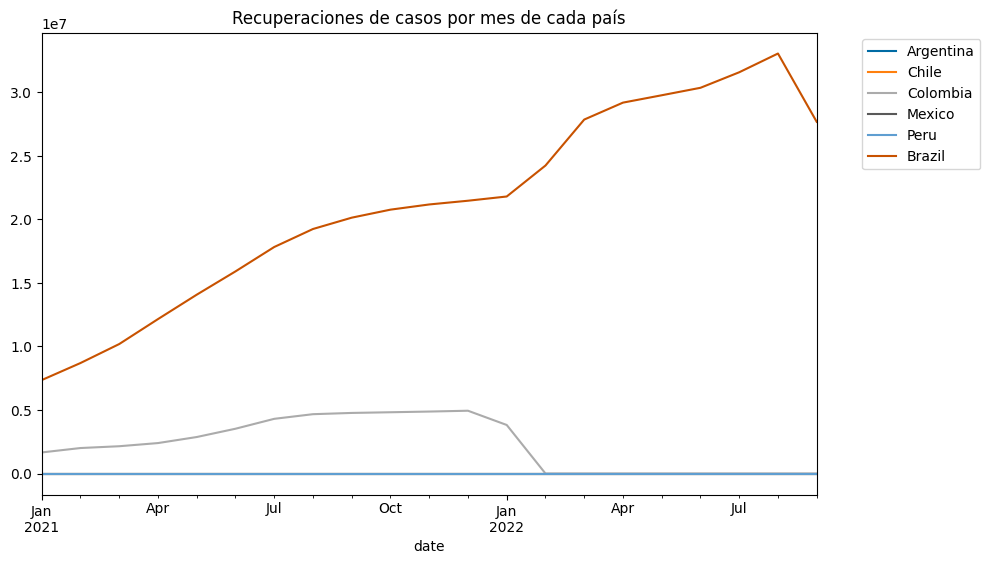

In [ ]:
# Crear una figura y un conjunto de ejes con tamaño 10x6 pulgadas
fig, ax = plt.subplots(figsize=(10, 6))

# Iterar sobre cada país en la lista de países seleccionados
for pais in paises_seleccionados:
    # Filtrar los datos para el país actual
    pais_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'] == pais]
    
    # Resamplear los datos para obtener promedios mensuales
    # 'ME' significa fin de mes
    # resample('ME'): Agrupa los datos por fin de mes
    # mean(numeric_only=True): Calcula el promedio mensual de todas las columnas numéricas
    mensual_data = pais_data.resample('ME').mean(numeric_only=True)
    
    # Seleccionar la columna 'cumulative_recovered' y graficarla
    mensual_data['cumulative_recovered'].plot(ax=ax, label=pais)

# Establecer el título del gráfico
plt.title('Recuperaciones de casos por mes de cada país')

# Configurar la leyenda del gráfico, ubicándola fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

El gráfico muestra que Brasil y Colombia tienen tendencias de recuperación acumulativa, con Brasil liderando significativamente en el número de recuperaciones. Colombia también muestra un aumento constante, aunque a un ritmo más bajo en comparación con Brasil. Esto sugiere diferentes velocidades de recuperación entre estos dos países.

Comparación del Número de Casos Nuevos entre Países

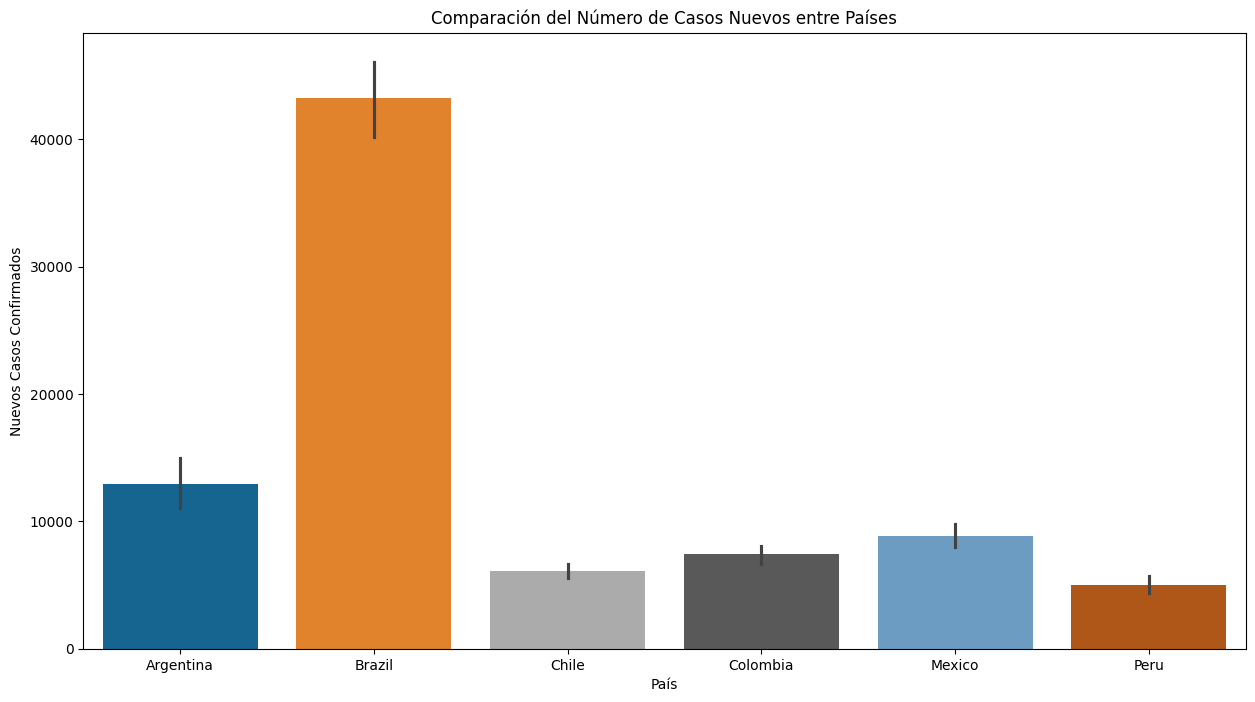

In [ ]:
# Comparación del Número de Casos Nuevos entre Países

# Crear una figura y un conjunto de ejes con tamaño 15x8 pulgadas
fig, ax = plt.subplots(figsize=(15, 8))

# Crear un gráfico de barras utilizando Seaborn
# x='country_name': Los nombres de los países se representan en el eje X
# y='new_confirmed': El número de nuevos casos confirmados se representa en el eje Y
# data=data_latinoamerica_paises: Usar el DataFrame 'data_latinoamerica_paises' como fuente de datos
# ax=ax: Graficar en los ejes creados previamente

sns.barplot(x='country_name', y='new_confirmed', data=data_latinoamerica_paises, ax=ax, hue='country_name')

# Establecer el título del gráfico
plt.title('Comparación del Número de Casos Nuevos entre Países')

# Establecer la etiqueta del eje X
plt.xlabel('País')

# Establecer la etiqueta del eje Y
plt.ylabel('Nuevos Casos Confirmados')


# Mostrar el gráfico
plt.show()


El gráfico compara el número de nuevos casos confirmados de COVID-19 entre varios países de América Latina. Brasil lidera con una cantidad significativamente mayor de casos nuevos, seguido por Argentina y México con cifras intermedias. Colombia, Chile y Perú muestran números más bajos de nuevos casos confirmados, con Perú teniendo la menor cantidad. Esta distribución destaca la disparidad en la propagación del virus y la carga epidemiológica entre los países de la región.

Dosis acumuladas por país

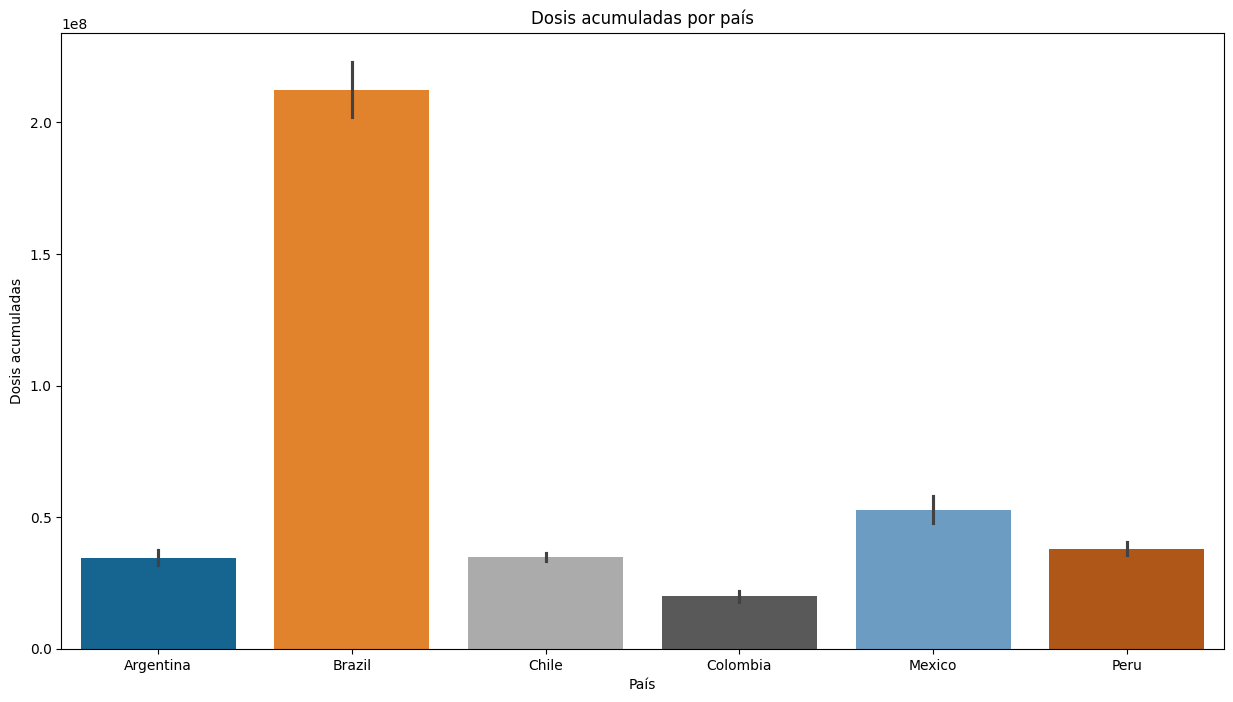

In [ ]:
# Dosis acumuladas por país

# Crear una figura y un conjunto de ejes con tamaño 15x8 pulgadas
fig, ax = plt.subplots(figsize=(15, 8))

# Crear un gráfico de barras utilizando Seaborn
# x='country_name': Los nombres de los países se representan en el eje X
# y='cumulative_vaccine_doses_administered': El número de dosis acumuladas de vacunas administradas se representa en el eje Y
# data=data_latinoamerica_paises: Usar el DataFrame 'data_latinoamerica_paises' como fuente de datos
# ax=ax: Graficar en los ejes creados previamente
sns.barplot(x='country_name', y='cumulative_vaccine_doses_administered', data=data_latinoamerica_paises, ax=ax, hue='country_name')

# Establecer el título del gráfico
plt.title('Dosis acumuladas por país')

# Establecer la etiqueta del eje X
plt.xlabel('País')

# Establecer la etiqueta del eje Y
plt.ylabel('Dosis acumuladas')

# Mostrar el gráfico
plt.show()

El gráfico muestra la cantidad acumulada de dosis de vacunas administradas por país en América Latina. Brasil destaca con una cantidad significativamente mayor de dosis administradas, seguido por México, Argentina, Chile, Perú y finalmente Colombia. Esto evidencia la variabilidad en la implementación de campañas de vacunación entre los diferentes países de la región.

Orden de países según dosis acumuladas:

Brasil
México
Argentina
Chile
Perú
Colombia

Distribución de Dosis de Vacunas Acumuladas por densidad de País

Text(0.5, 1.0, 'Distribución de dosis acumuladas por país')

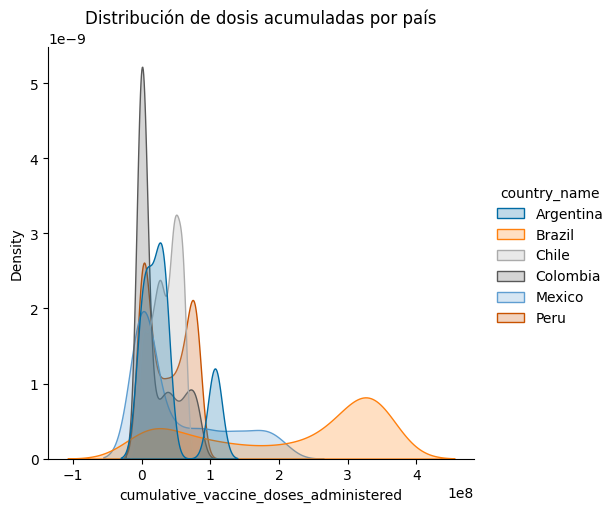

In [ ]:
# Crear una gráfica de distribución utilizando Seaborn
# data_latinoamerica_paises: Usar el DataFrame 'data_latinoamerica_paises' como fuente de datos
# x='cumulative_vaccine_doses_administered': Los datos en el eje X serán las dosis acumuladas de vacunas administradas
# hue='country_name': Diferenciar por el nombre del país, cada país tendrá un color diferente
# kind='kde': Especifica que el tipo de gráfico es una estimación de densidad de Kernel
# fill=True: Rellenar el área bajo la curva de densidad
sns.displot(data_latinoamerica_paises, x="cumulative_vaccine_doses_administered", hue="country_name", kind="kde", fill=True)

# Establecer el título del gráfico
plt.title('Distribución de dosis acumuladas por país')


El gráfico muestra la distribución de las dosis acumuladas de vacunas administradas en varios países de América Latina. Brasil lidera con la mayor cantidad de dosis acumuladas, seguido por México y Chile. Argentina tiene una distribución concentrada, pero con valores menores que Chile. Perú y Colombia presentan las distribuciones más bajas, con Colombia siendo el país con menos dosis acumuladas.

Comparación de la Temperatura Media por País

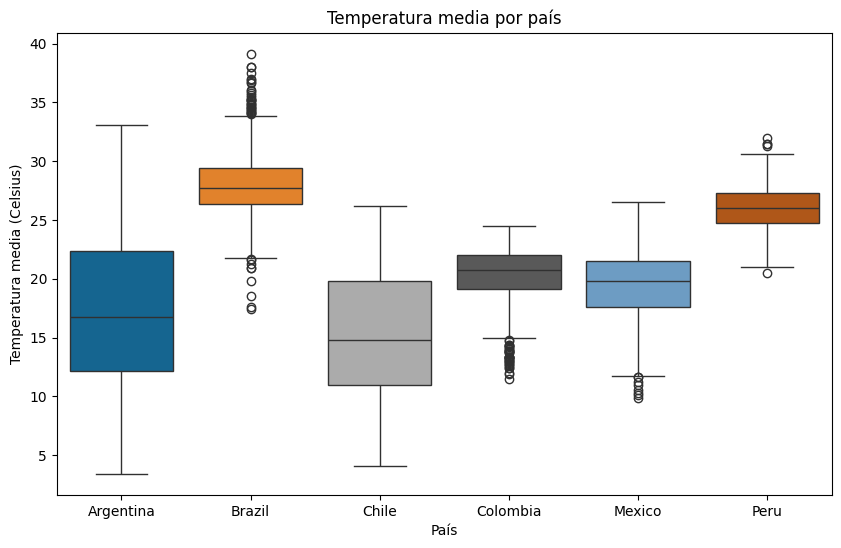

In [ ]:
# Comparación de la temperatura media (average_temperature_celsius) entre países utilizando un boxplot

# Crear una figura y un conjunto de ejes con tamaño 10x6 pulgadas
fig, ax = plt.subplots(figsize=(10, 6))

# Crear un gráfico de caja (boxplot) utilizando Seaborn
# x='country_name': Los nombres de los países se representan en el eje X
# y='average_temperature_celsius': La temperatura media se representa en el eje Y
# data=data_latinoamerica_paises: Usar el DataFrame 'data_latinoamerica_paises' como fuente de datos
# hue='country_name': Diferenciar por el nombre del país, cada país tendrá un color diferente
sns.boxplot(x='country_name', y='average_temperature_celsius', data=data_latinoamerica_paises, hue='country_name')

# Establecer el título del gráfico
plt.title('Temperatura media por país')

plt.xlabel('País')
plt.ylabel('Temperatura media (Celsius)')

# Mostrar el gráfico
plt.show()

Brasil tiene la temperatura media más alta con una variabilidad significativa y numerosos valores atípicos. Argentina y Chile muestran una mayor dispersión en sus temperaturas medias, con Argentina teniendo temperaturas más bajas en general. Colombia, México y Perú tienen distribuciones más compactas, con Perú mostrando temperaturas más altas en promedio

Valores Atípicos:

Se observan varios valores atípicos en Brasil, Mexico, Peru y Colombia, lo que indica ocasiones en las que las temperaturas se desviaron significativamente de la media.

Violinplot de las variables que “Sí” tenga cambios de valores

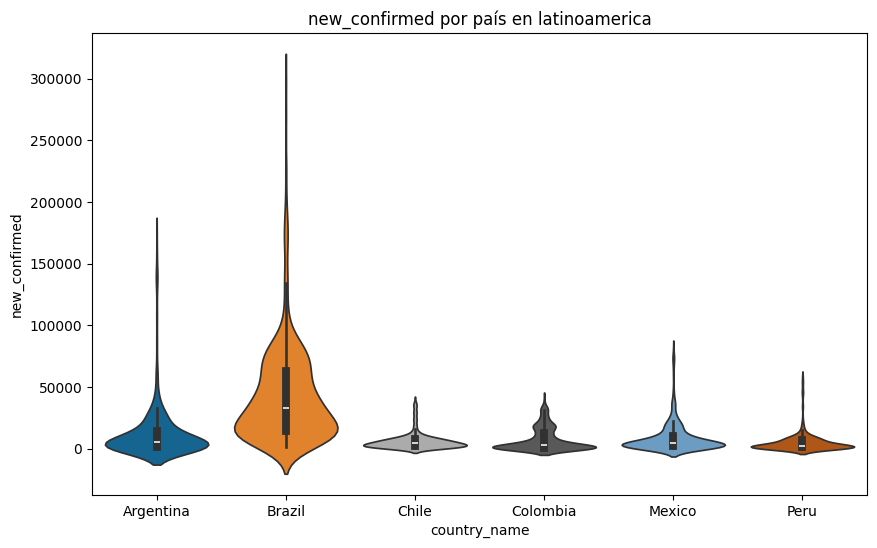

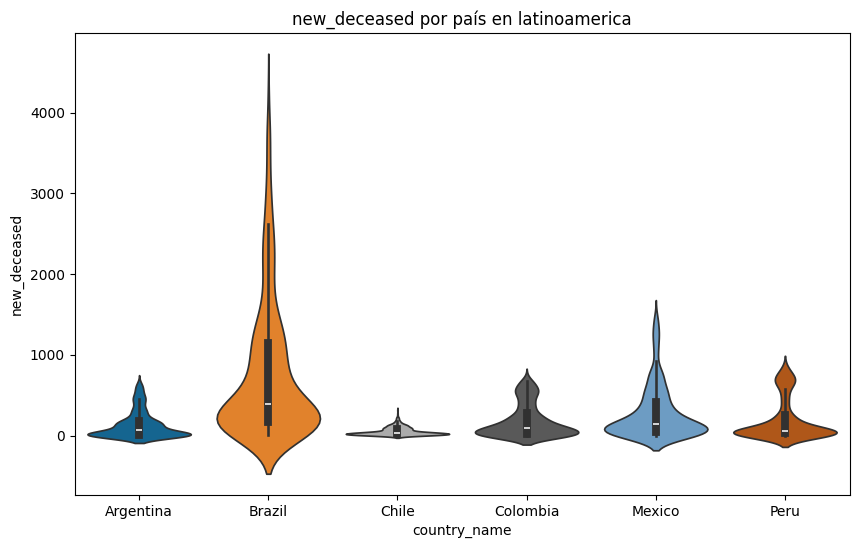

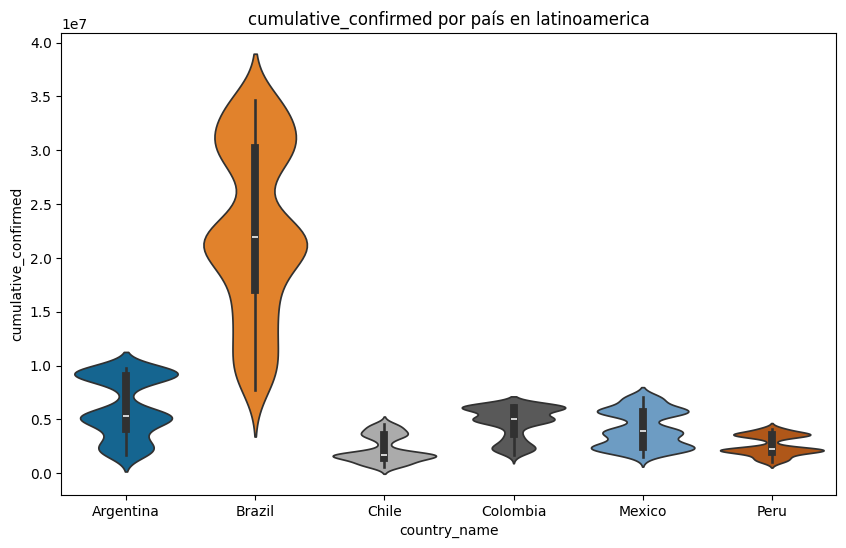

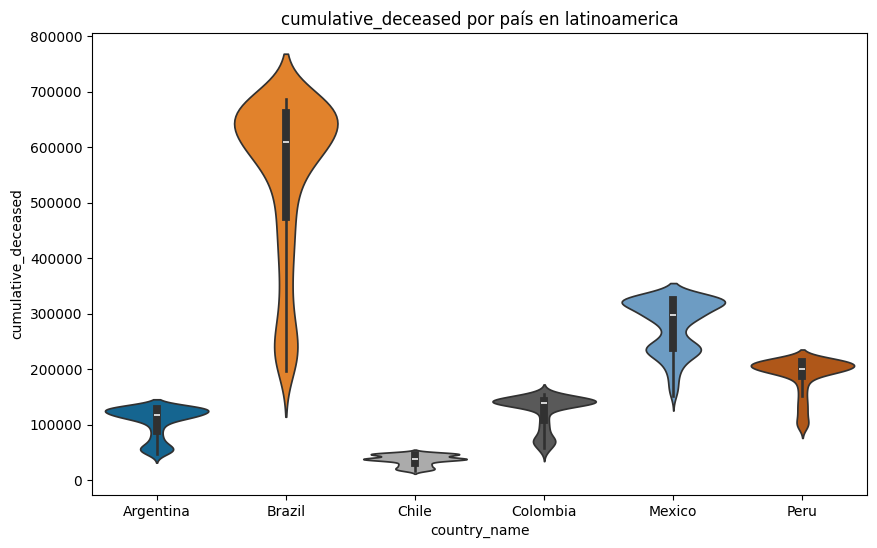

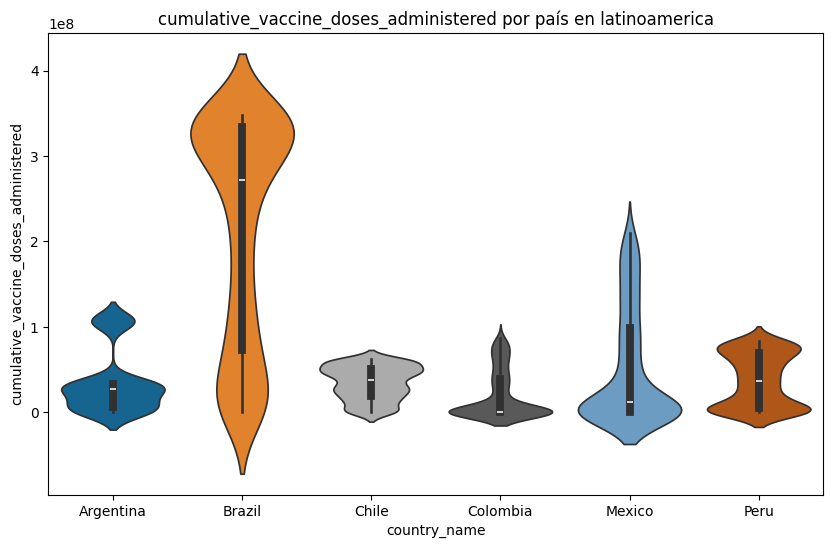

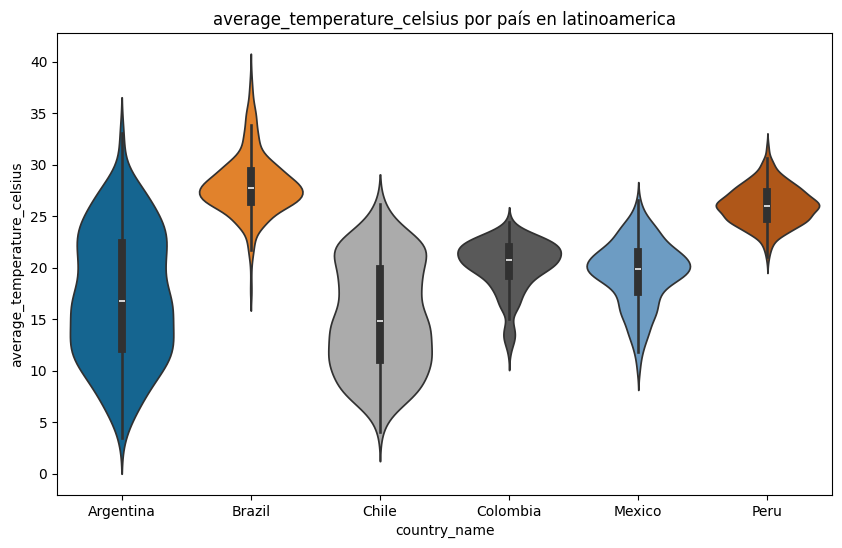

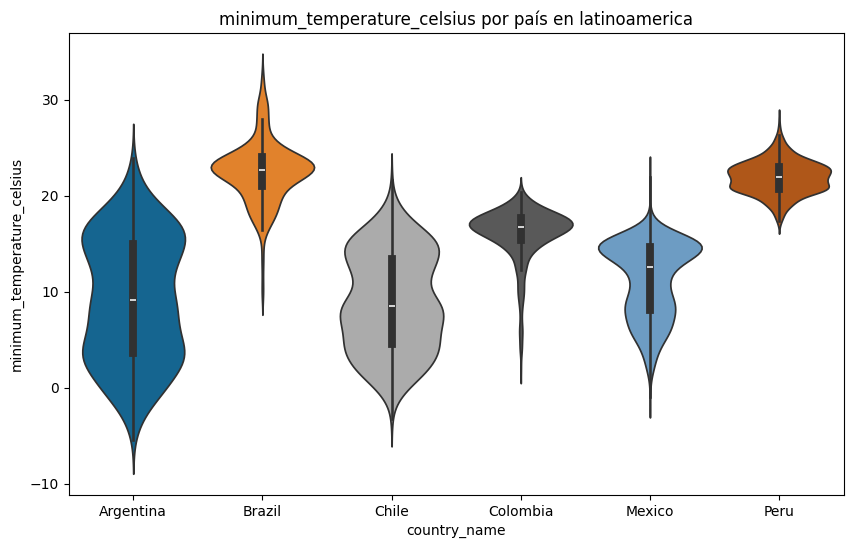

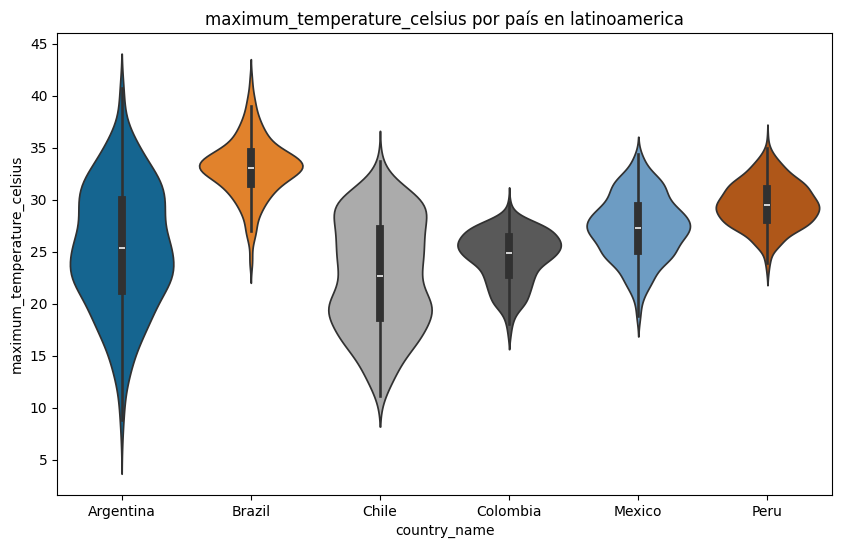

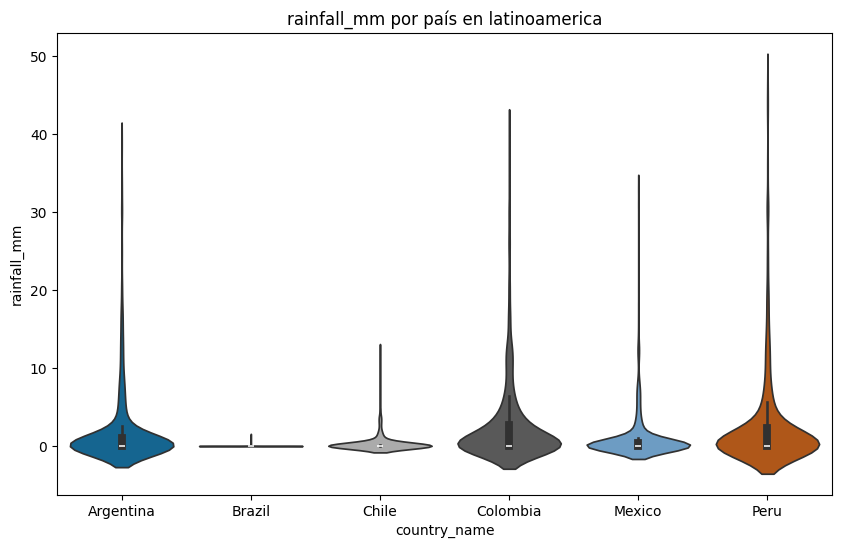

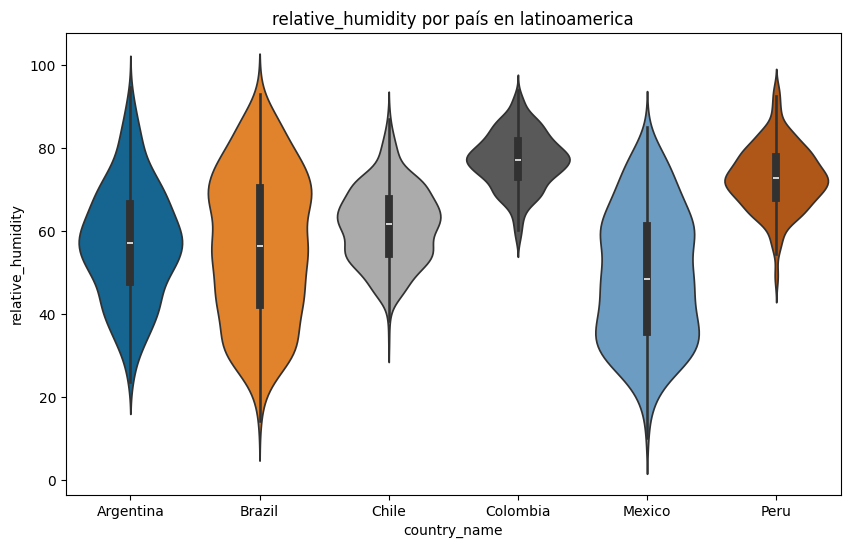

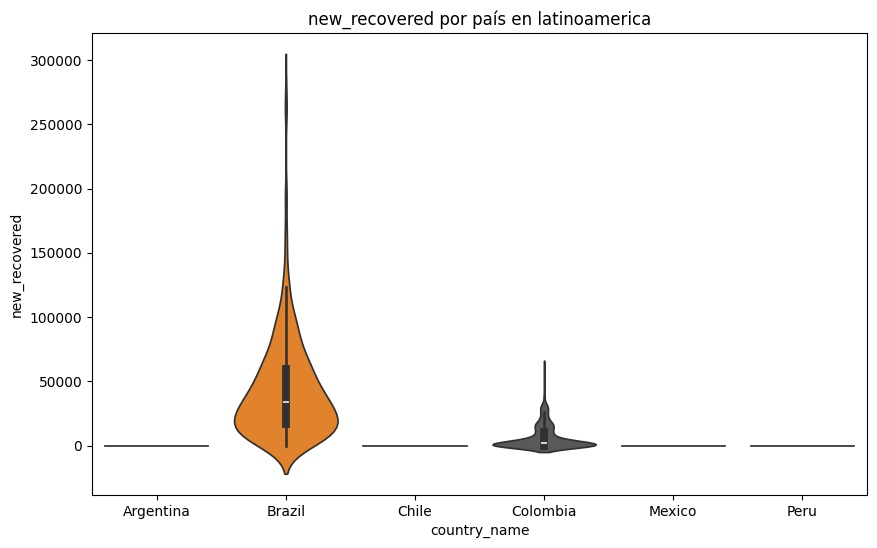

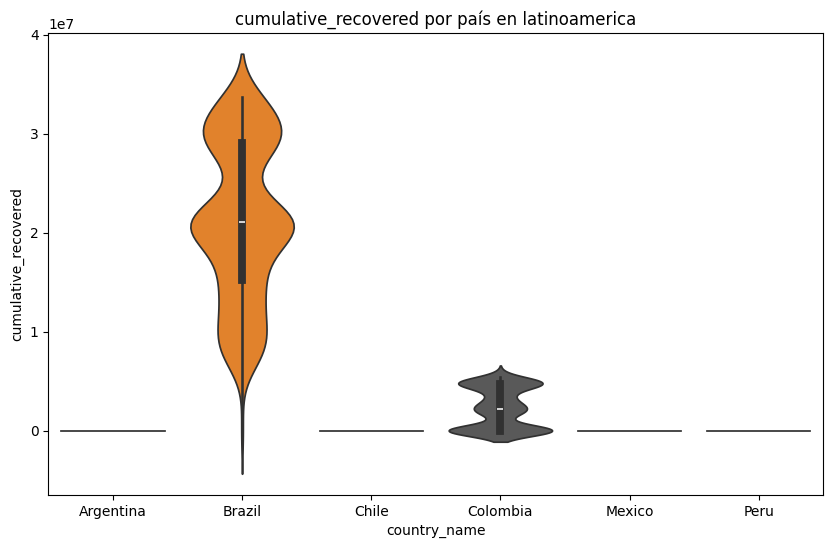

In [ ]:
# Se crea un dataframe con las columnas mayores a 6 porque son las que tienen valores diferentes
columnas_mayores_6 = []

# Recorremos cada columna en data_latinoamerica_paises.columns
for i in data_latinoamerica_paises.columns:
    # Filtrar columnas que no son relevantes para el análisis
    if i not in ['location_key', 'date', 'country_code', 'latitude', 'longitude']:
        # Si el número de valores únicos en la columna es mayor a 6, añadimos el nombre de la columna a la lista
        if data_latinoamerica_paises[i].nunique() > 6:
            columnas_mayores_6.append(i)

# Agregar a columnas_mayores_6 la columna country_name para poder hacer análisis por país.
columnas_mayores_6.append('country_name')

# Se crea un dataframe con las columnas mayores a 6
data_latinoamerica_paises_mayores_6 = data_latinoamerica_paises[columnas_mayores_6]

# Crear un violin plot en todos los países para variables numéricas
for i in data_latinoamerica_paises_mayores_6.columns:
    if i not in ['location_key', 'date', 'country_code', 'latitude', 'longitude', 'country_name','month']:
        # Configuramos la figura para tener múltiples subplots
        fig, ax = plt.subplots(figsize=(10, 6))
        # Crear el gráfico de violín para cada variable numérica
        sns.violinplot(x='country_name', y=i, data=data_latinoamerica_paises_mayores_6, hue='country_name')
        # Añadir un título al gráfico
        plt.title(f'{i} por país en latinoamerica')
        # Mostrar el gráfico
        plt.show()

Análisis de gráficos de violín

1. Nuevos casos confirmados y fallecimientos

Nuevos casos confirmados: Brasil muestra la mayor variabilidad y número de casos confirmados, seguido por Argentina, mientras que Chile y Colombia tienen una menor variabilidad y número de casos.
Nuevos fallecimientos: Brasil también lidera en número de nuevos fallecimientos, con un alto pico, mientras que otros países muestran una variabilidad menor, con Chile presentando una dispersión significativa.

2. Casos y fallecimientos acumulados
Casos acumulados: Brasil presenta el mayor número de casos acumulados con una gran dispersión, Argentina le sigue, y los otros países tienen una menor cantidad de casos acumulados.
Fallecimientos acumulados: Brasil nuevamente muestra los valores más altos en fallecimientos acumulados, seguido por México y Argentina con números significativamente menores.

3. Dosis de vacunas administradas
Dosis acumuladas: Brasil es el país con la mayor cantidad de dosis acumuladas administradas, seguido de México y Argentina, lo cual refleja su tamaño poblacional y esfuerzos de vacunación.

4. Temperatura media y precipitaciones
Temperatura media: Brasil presenta temperaturas medias más altas y una menor dispersión en comparación con otros países. Argentina y Chile tienen una mayor variabilidad de temperaturas.
Precipitaciones: Colombia y Perú muestran las mayores precipitaciones, mientras que Brasil y México tienen menos variabilidad.

5. Humedad relativa
Humedad relativa: Brasil y Colombia presentan los niveles más altos de humedad relativa, mientras que Argentina muestra una variabilidad mayor, reflejando su diversidad climática.

6. Nuevas recuperaciones
Nuevas recuperaciones: Brasil nuevamente lidera en el número de nuevas recuperaciones, con un alto pico, y los demás países muestran números mucho menores y menos dispersión.

Distribución de la población por grupos de edad

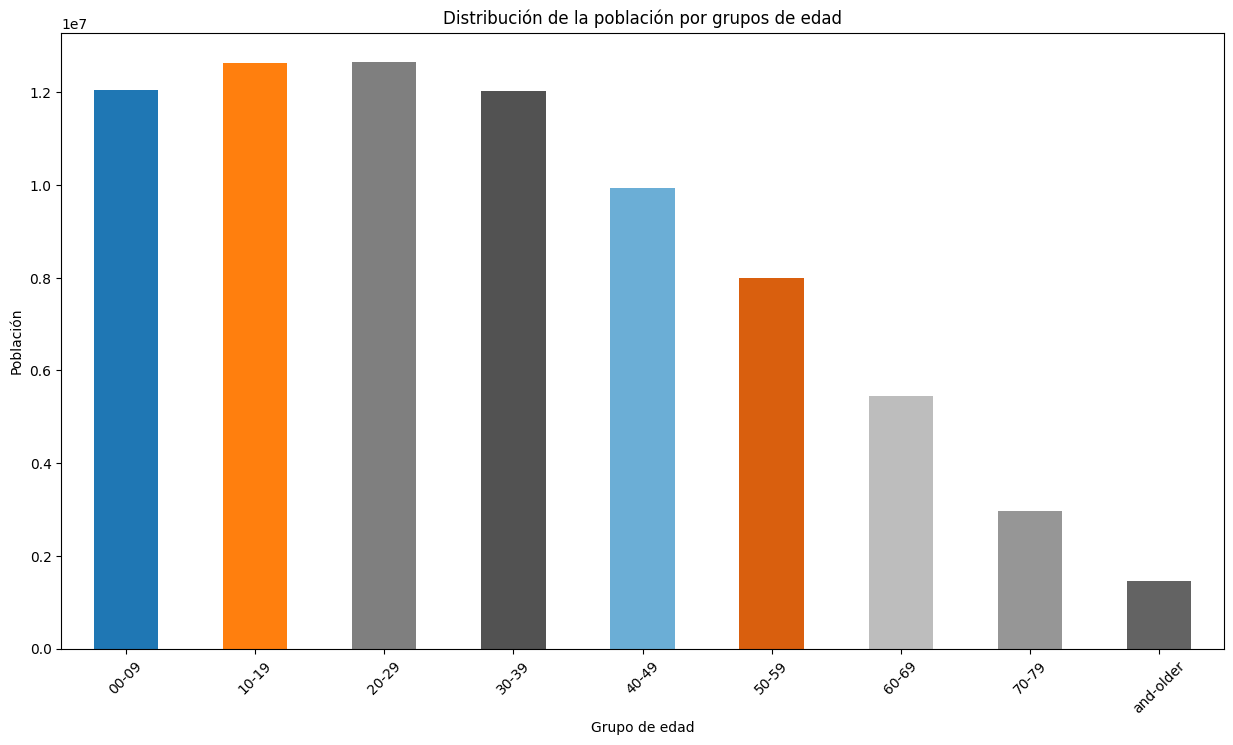

In [ ]:
# Lista de columnas que representan diferentes grupos de edad en la población


grupos_edad = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 
               'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 
               'population_age_80_and_older']

# Calcular la media de la población para cada grupo de edad
# Seleccionar las columnas correspondientes a los grupos de edad en el DataFrame y calcular la media
data_latinoamerica_paises[grupos_edad].mean().plot( kind='bar', color=['#1f77b4', '#ff7f0e', '#7f7f7f', '#525252', '#6baed6', '#d95f0e', '#bdbdbd', '#969696', '#636363'], figsize=(15, 8))

# Añadir un título al gráfico
plt.title('Distribución de la población por grupos de edad')

# Etiquetar el eje X
plt.xlabel('Grupo de edad')

# Etiquetar el eje Y
plt.ylabel('Población')

# Modificar las etiquetas del eje X para que sean más legibles
# 'xticks' establece las etiquetas del eje X en las posiciones especificadas
# Utilizamos una lista por comprensión para acortar los nombres de los grupos de edad
plt.xticks(range(len(grupos_edad)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in grupos_edad], rotation=45)
# Con el código de arriba acortamos los nombres de los datos del eje X

# Mostrar el gráfico
plt.show()

El gráfico muestra la distribución de la población en diferentes grupos de edad en los países de Latinoamérica. La población se distribuye de manera relativamente uniforme entre los grupos de edad más jóvenes (00-09, 10-19, 20-29, 30-39), con una ligera disminución en los grupos de edad mayores. A partir de los 50 años, se observa una disminución más pronunciada, reflejando una menor proporción de la población en estos rangos de edad. Esto sugiere una base poblacional joven en la región, con un decrecimiento en la población de mayor edad.

Resumen:
La población más joven (0-49 años) es la más numerosa y se distribuye de manera bastante uniforme.
A partir de los 50 años, la población comienza a disminuir significativamente.
El grupo de edad de 80 años y mayores tiene la menor representación en la población.

Mapa de calor de Métricas por país

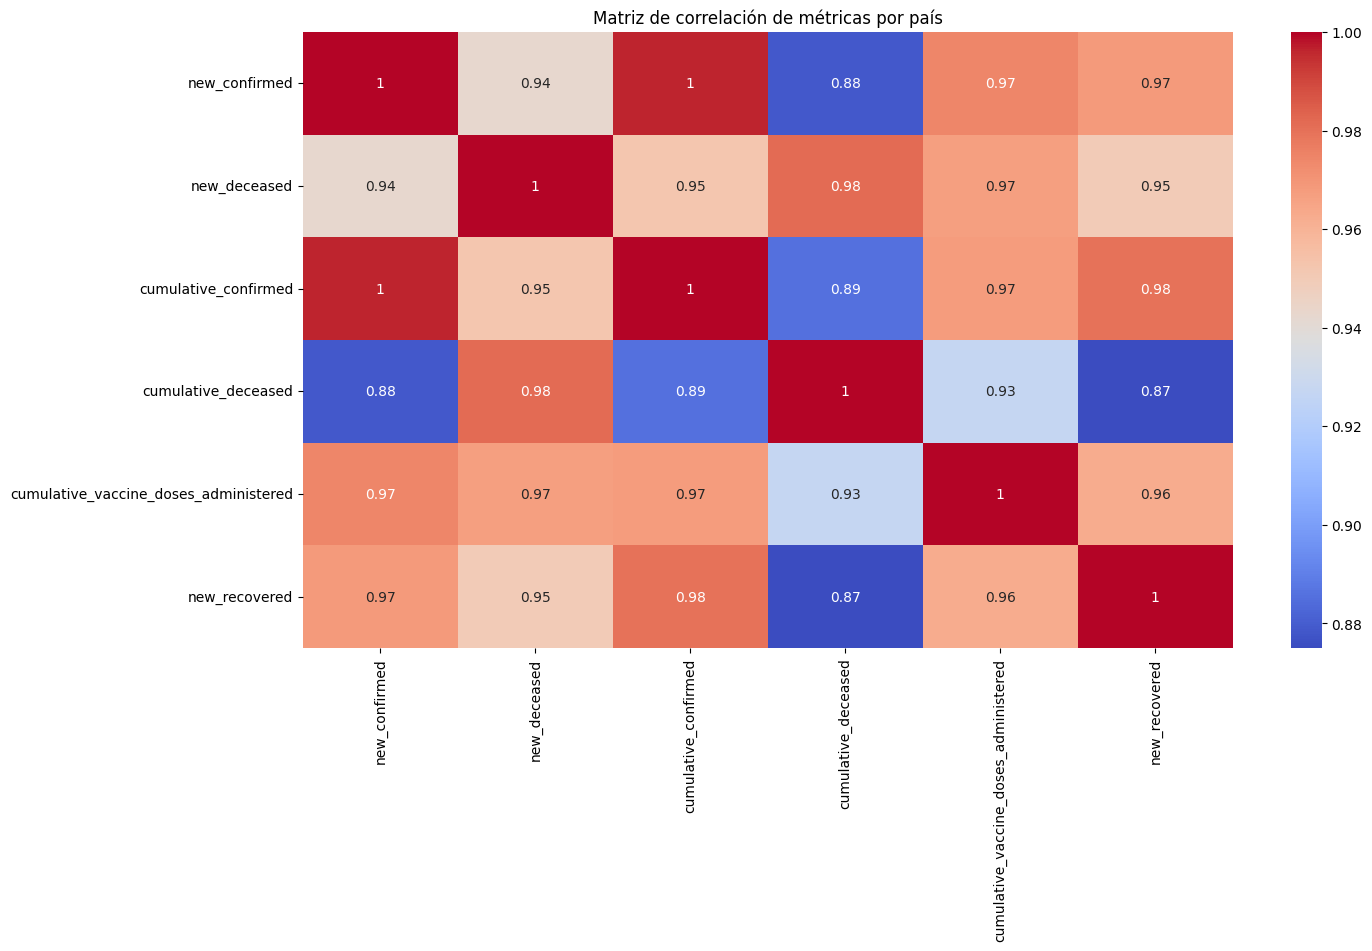

In [ ]:
# Mapa de calor de Métricas por país
# Definir la lista de métricas
metricas = ['new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'new_recovered']

# Agrupar los datos por país y calcular la media de las métricas
metricas_por_pais = data_latinoamerica_paises.groupby('country_name')[metricas].mean()

# Calcular la matriz de correlación para las métricas agrupadas
correlation_matrix = metricas_por_pais.corr()

# Configurar el tamaño de la figura para el mapa de calor
plt.figure(figsize=(15, 8))

# Crear el mapa de calor con la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Añadir un título al gráfico
plt.title('Matriz de correlación de métricas por país')

# Mostrar el gráfico
plt.show()


Análisis de la Matriz de Correlación de Métricas por País
El gráfico muestra la matriz de correlación entre diferentes métricas relacionadas con la COVID-19 en varios países de Latinoamérica. Se observa una fuerte correlación positiva entre la mayoría de las métricas. Por ejemplo:

Altamente correlacionadas:

Los casos nuevos confirmados (new_confirmed) tienen una alta correlación con los casos acumulados confirmados (cumulative_confirmed), con una correlación de 0.99.
Las dosis acumuladas de vacunas administradas (cumulative_vaccine_doses_administered) también están altamente correlacionadas con los casos nuevos confirmados (new_confirmed) y los casos acumulados confirmados (cumulative_confirmed), con correlaciones de 0.97 y 0.96 respectivamente.
Correlación significativa:

Las muertes acumuladas (cumulative_deceased) tienen una alta correlación con las muertes nuevas (new_deceased) y los casos acumulados confirmados (cumulative_confirmed), con correlaciones de 0.98 y 0.94 respectivamente.

Estas correlaciones indican que el aumento en los casos confirmados, tanto nuevos como acumulados, está estrechamente relacionado con el aumento en las muertes y las dosis de vacunas administradas. Esto sugiere que los países con más casos confirmados también han registrado más muertes y han administrado más vacunas.

Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país

Contribución total de las tasas de mortalidad masculina y femenina y comparar el total entre países

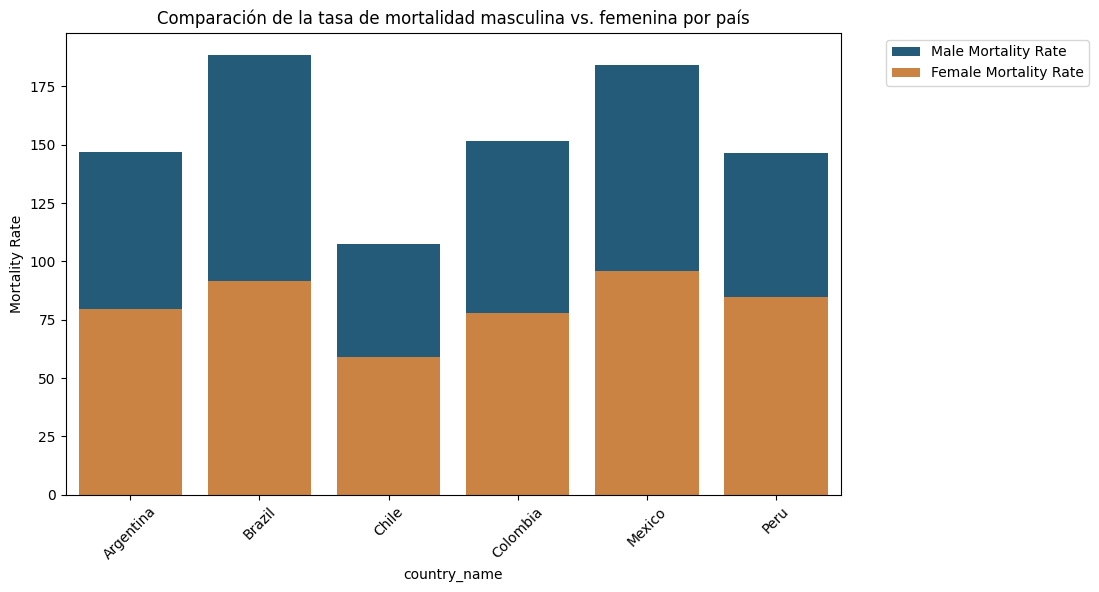

In [ ]:
# Gráfica de mortalidad por género

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear un gráfico de barras para la tasa de mortalidad masculina
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_male_mortality_rate', color='#166086', label='Male Mortality Rate')

# Crear un gráfico de barras para la tasa de mortalidad femenina, con transparencia
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_female_mortality_rate', color='#e1822c', label='Female Mortality Rate')

# Rotar las etiquetas del eje X para mejorar la legibilidad
plt.xticks(rotation=45)

# Etiquetar el eje Y
plt.ylabel('Mortality Rate')

# Añadir un título al gráfico
plt.title('Comparación de la tasa de mortalidad masculina vs. femenina por país')

# Añadir una leyenda al gráfico en la esquina superior izquierda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()


Análisis de la Gráfica de Mortalidad por Género
La gráfica compara las tasas de mortalidad masculina y femenina en diferentes países de Latinoamérica. Se observa que en todos los países analizados, la tasa de mortalidad masculina es consistentemente más alta que la tasa de mortalidad femenina. Brasil y México presentan las tasas de mortalidad más altas tanto para hombres como para mujeres, mientras que Chile y Perú tienen las tasas más bajas. Este patrón podría indicar diferencias en factores de riesgo, acceso a servicios de salud, y otros determinantes socioeconómicos entre los géneros y países.

Matriz de correlación de indicadores demográficos y de salud

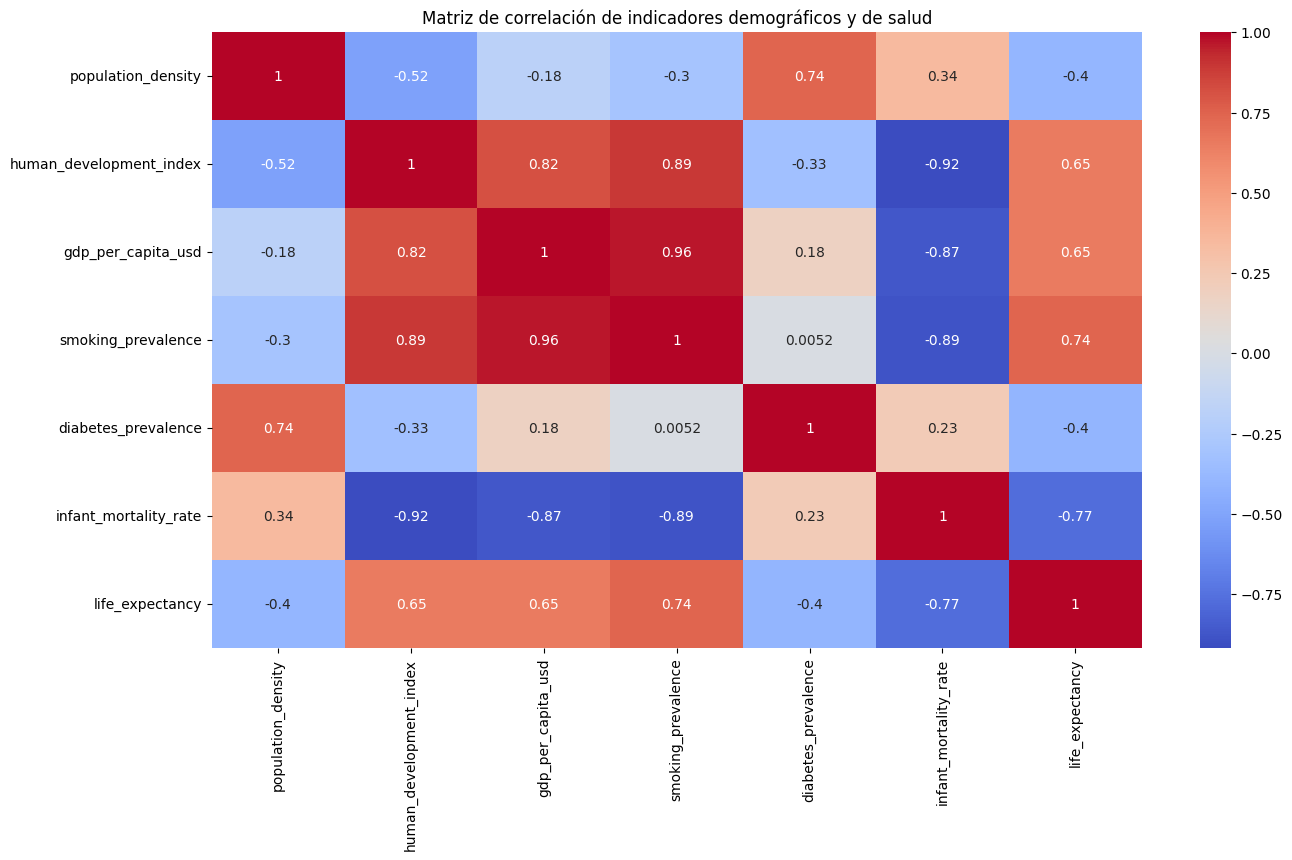

In [ ]:
# Matriz de correlación de indicadores demográficos y de salud

# Definir la lista de indicadores demográficos y de salud que se desean analizar
indicadores = ['population_density', 'human_development_index', 'gdp_per_capita_usd', 'smoking_prevalence', 
               'diabetes_prevalence', 'infant_mortality_rate', 'life_expectancy']

# Calcular la matriz de correlación para los indicadores seleccionados
# 'data_latinoamerica_paises[indicadores]' selecciona las columnas especificadas en el DataFrame
# 'corr()' calcula la matriz de correlación entre estas columnas
correlation_matrix = data_latinoamerica_paises[indicadores].corr()

# Configurar el tamaño de la figura para el mapa de calor
# 'figsize=(15, 8)' establece el tamaño de la figura a 15 pulgadas de ancho y 8 pulgadas de alto
plt.figure(figsize=(15, 8))

# Crear el mapa de calor con la matriz de correlación
# 'correlation_matrix' es la matriz de correlación calculada
# 'annot=True' añade los valores de correlación en cada celda del mapa de calor
# 'cmap='coolwarm'' establece el mapa de colores
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Añadir un título al gráfico
# 'title' establece el título del gráfico
plt.title('Matriz de correlación de indicadores demográficos y de salud')

# Mostrar el gráfico
# 'show' muestra el gráfico en la pantalla
plt.show()

El gráfico presenta la matriz de correlación de diversos indicadores demográficos y de salud. En esta matriz, cada celda muestra el coeficiente de correlación entre dos variables, variando de -1 (correlación negativa perfecta) a 1 (correlación positiva perfecta). 

Observamos fuertes correlaciones positivas entre el índice de desarrollo humano (HDI) y la prevalencia de fumar, así como entre el producto interno bruto per cápita (GDP) y la prevalencia de fumar. Contrariamente, el índice de desarrollo humano y la tasa de mortalidad infantil presentan una correlación negativa significativa, sugiriendo que a medida que el desarrollo humano aumenta, la mortalidad infantil disminuye.

Este tipo de análisis permite identificar relaciones importantes entre diferentes variables demográficas y de salud, proporcionando información valiosa para diseñar políticas públicas y estrategias de intervención.

Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad

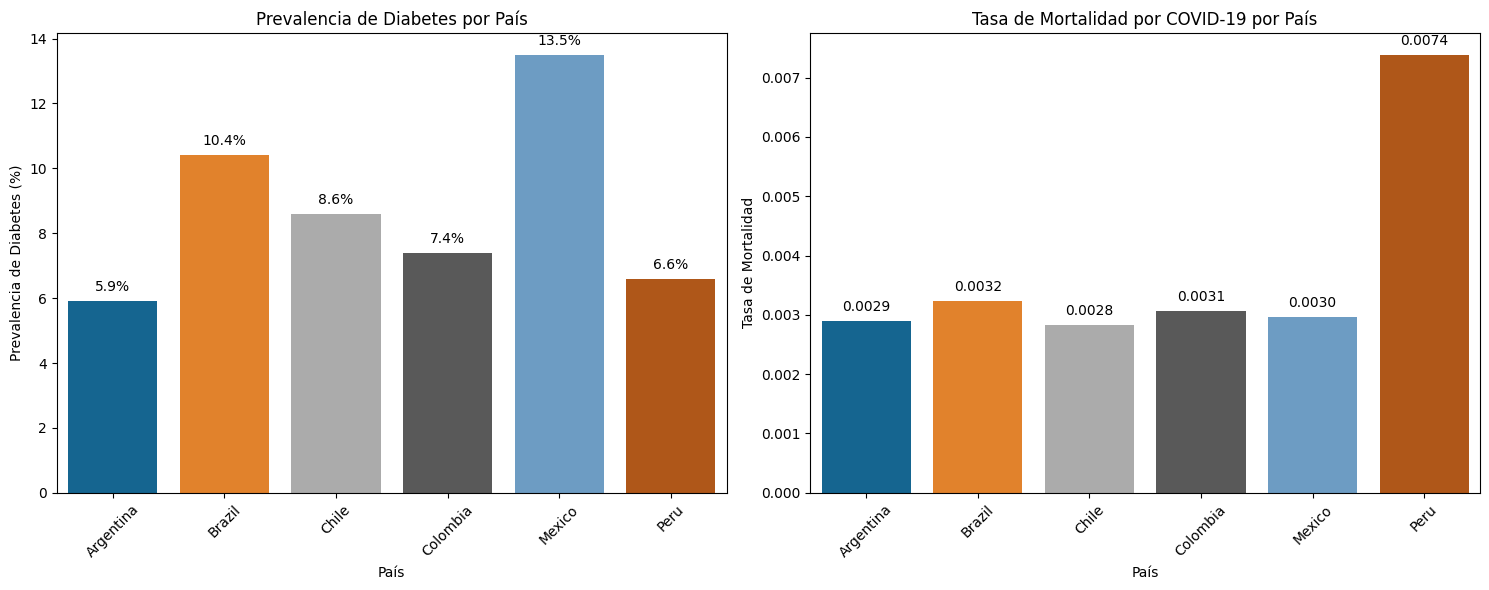

In [ ]:
# Agrupar los datos por país y obtener el valor máximo de la prevalencia de diabetes y la tasa de mortalidad

# Calcular la tasa de mortalidad
# Dividir el número acumulado de fallecidos por la población para cada país
data_latinoamerica_paises['Tasa_de_Mortalidad'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population']

# 'groupby' agrupa los datos por 'country_name'
# 'agg' permite aplicar funciones de agregación, 'max' en este caso para obtener el valor máximo
data_agrupada = data_latinoamerica_paises.groupby('country_name').agg({
    'diabetes_prevalence': 'max',
    'Tasa_de_Mortalidad': 'max'
}).reset_index()

# Crear una figura y dos ejes para el gráfico con un tamaño específico
# 'figsize=(15, 6)' establece el tamaño de la figura a 15 pulgadas de ancho y 6 pulgadas de alto
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Crear un gráfico de barras para la prevalencia de diabetes
# 'data' especifica el DataFrame que contiene los datos
# 'x' especifica la columna 'country_name' para el eje X
# 'y' especifica la columna 'diabetes_prevalence' para el eje Y
# 'hue' añade colores diferentes para cada país basado en la columna 'country_name'
# 'palette' define la paleta de colores a usar
# 'legend=False' desactiva la leyenda para este gráfico
sns.barplot(data=data_agrupada, x='country_name', y='diabetes_prevalence', ax=ax1, hue='country_name', legend=False)

# Configurar el título y las etiquetas del primer gráfico
ax1.set_title('Prevalencia de Diabetes por País')
ax1.set_xlabel('País')
ax1.set_ylabel('Prevalencia de Diabetes (%)')

# Rotar las etiquetas del eje X para mejorar la legibilidad
ax1.tick_params(axis='x', rotation=45)

# Añadir anotaciones a las barras del primer gráfico
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Crear un gráfico de barras para la tasa de mortalidad
# 'alpha=0.4' añade transparencia a las barras
sns.barplot(data=data_agrupada, x='country_name', y='Tasa_de_Mortalidad', ax=ax2, hue='country_name', legend=False)

# Configurar el título y las etiquetas del segundo gráfico
ax2.set_title('Tasa de Mortalidad por COVID-19 por País')
ax2.set_xlabel('País')
ax2.set_ylabel('Tasa de Mortalidad')

# Rotar las etiquetas del eje X para mejorar la legibilidad
ax2.tick_params(axis='x', rotation=45)

# Añadir anotaciones a las barras del segundo gráfico
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Ajustar el diseño del gráfico para que los elementos no se superpongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()

El gráfico presenta dos comparaciones importantes por país en América Latina: la prevalencia de diabetes y la tasa de mortalidad por COVID-19.

Prevalencia de Diabetes por País (Izquierda):

México tiene la mayor prevalencia de diabetes con un 13.5%.
Brasil sigue con un 10.4%, y Chile con un 8.6%.
Los países con menor prevalencia de diabetes son Argentina (5.9%) y Perú (6.6%).


Tasa de Mortalidad por COVID-19 por País (Derecha):

Perú presenta la tasa de mortalidad más alta (0.0074), significativamente superior a los demás países.
Chile y Brasil tienen tasas de mortalidad similares alrededor de 0.0032 y 0.0035, respectivamente.
Argentina y México muestran las tasas de mortalidad más bajas, con 0.0029 y 0.0027 respectivamente.

Conclusión
Existe una disparidad notable entre la prevalencia de diabetes y la tasa de mortalidad por COVID-19 entre los países.
Perú destaca con una alta tasa de mortalidad por COVID-19, pero una prevalencia de diabetes relativamente baja.
México, a pesar de tener la mayor prevalencia de diabetes, no presenta la tasa de mortalidad más alta por COVID-19.

Es crucial considerar múltiples factores al analizar la mortalidad por COVID-19, ya que la prevalencia de diabetes no parece ser el único factor influyente.
Estos hallazgos subrayan la importancia de abordar diversas variables de salud pública para entender y mitigar el impacto del COVID-19 en diferentes regiones.

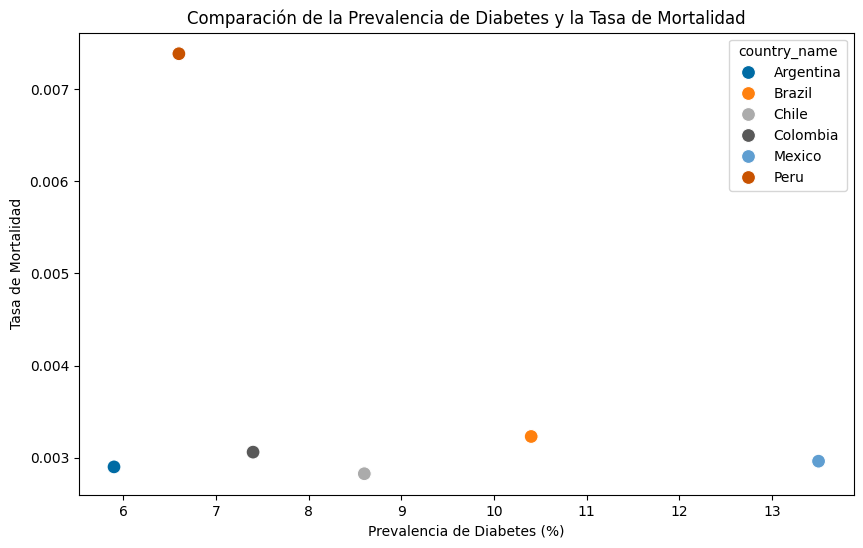

In [ ]:
# Agrupar los datos por país y obtener el valor máximo de la tasa de mortalidad y la prevalencia de diabetes
#la función agg está siendo utilizada para agrupar los datos por país y calcular el valor máximo de la prevalencia de diabetes y la tasa de mortalidad para cada país. Aquí está la línea específica comentada en detalle:
data_agrupada = data_latinoamerica_paises.groupby('country_name').agg({
    'diabetes_prevalence': 'max',
    'Tasa_de_Mortalidad': 'max'
}).reset_index()

# Crear una figura y un eje para el gráfico con un tamaño específico
fig, ax = plt.subplots(figsize=(10, 6))

# Crear un gráfico de dispersión para comparar la prevalencia de diabetes y la tasa de mortalidad
sns.scatterplot(x='diabetes_prevalence', y='Tasa_de_Mortalidad', data=data_agrupada, hue='country_name', s=100)

# Añadir un título al gráfico
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad')

# Etiquetar el eje X
plt.xlabel('Prevalencia de Diabetes (%)')

# Etiquetar el eje Y
plt.ylabel('Tasa de Mortalidad')

# Mostrar el gráfico
plt.show()



Análisis general:

El gráfico sugiere que no hay una relación directa y fuerte entre la prevalencia de diabetes y la tasa de mortalidad en estos países específicos.
Países con Alta Prevalencia de Diabetes:

México presenta la mayor prevalencia de diabetes, pero su tasa de mortalidad es moderada en comparación con otros países.

Brasil también muestra una prevalencia alta de diabetes, pero nuevamente, la tasa de mortalidad no es la más alta.

Países con Baja Prevalencia de Diabetes:
Argentina y Colombia tienen una prevalencia de diabetes relativamente baja y también una baja tasa de mortalidad, lo que podría indicar que otros factores pueden estar influyendo más significativamente en la mortalidad.

Países con Alta Tasa de Mortalidad:
Perú destaca con una tasa de mortalidad relativamente alta comparada con su prevalencia de diabetes, lo que sugiere que otros factores además de la diabetes podrían estar contribuyendo a la alta mortalidad en el país.

Conclusión:
La prevalencia de diabetes por sí sola no parece ser un indicador fuerte de la tasa de mortalidad en estos países. Es probable que otros factores de salud y socioeconómicos también jueguen un papel crucial en determinar la mortalidad en estos contextos

# AVANCE 3 

In [ ]:
#carga de librerias
import pandas as pd
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [ ]:
# Seleccion del estilo de graficos a utilizar
plt.style.use('tableau-colorblind10')

In [ ]:
#Podemos reiniciar el notebook para liberar memoria y cargar el archivo filtrado para continuar con el analisis
data_latinoamerica_paises=pd.read_csv("DatosFinalesFiltrado2.csv",sep=',')

In [ ]:
# Convertir la columna 'date' al formato datetime
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])

In [ ]:
# Configurar 'date' como el nuevo índice
#data_latinoamerica_paises.set_index('date', inplace=True)

#carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Evolución de los casos de Covid por semana y por año

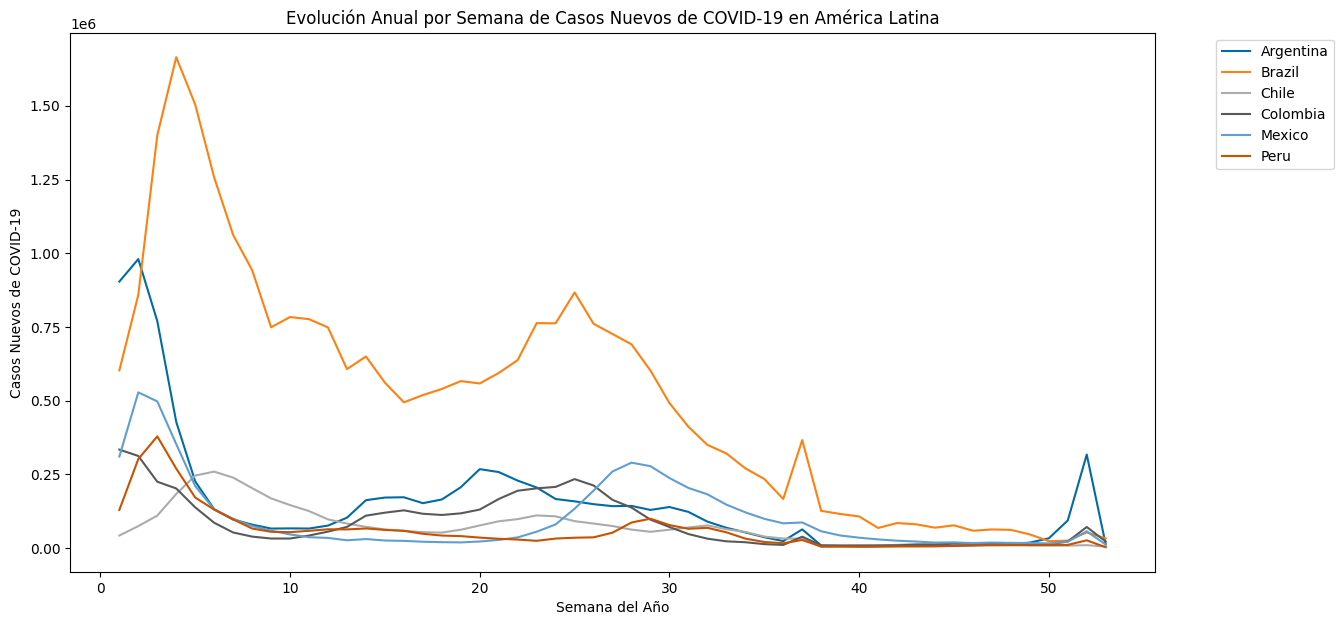

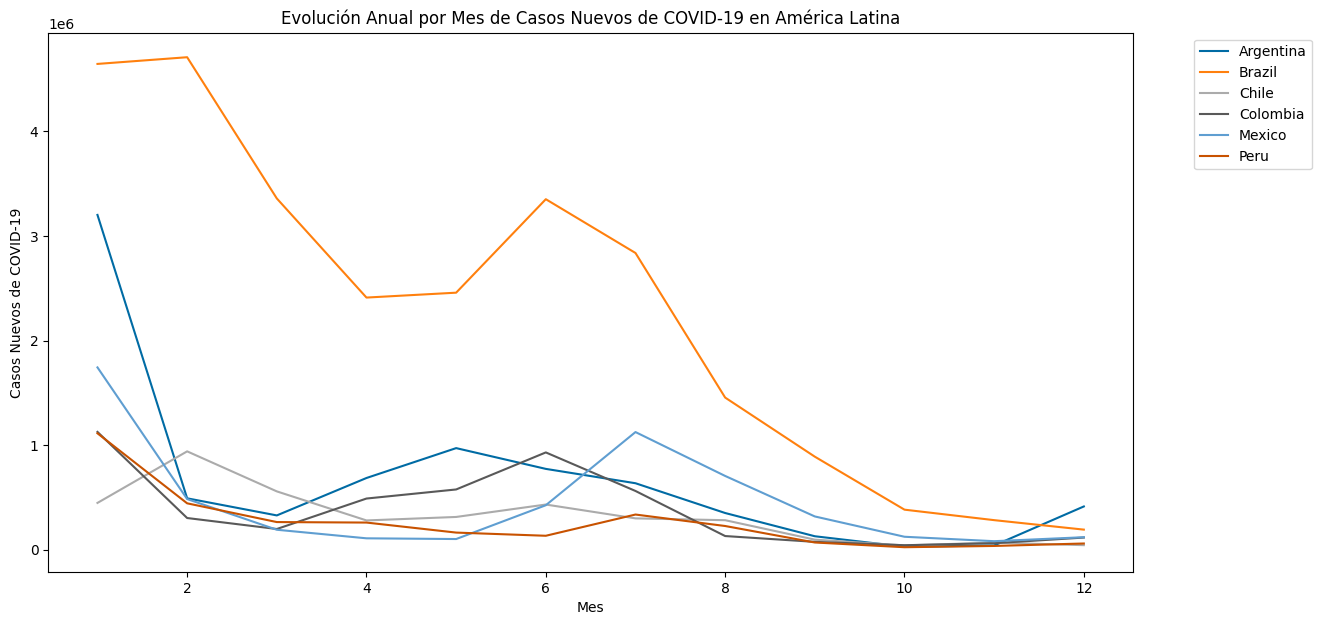

In [ ]:
# Convertir la columna 'date' al formato datetime
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])

# Se agrega una columna 'week' que contiene el número de la semana del año usando el método isocalendar()
data_latinoamerica_paises['week'] = data_latinoamerica_paises['date'].apply(lambda x: x.isocalendar()[1])

# Se agrega una columna 'year' que contiene el año usando el método isocalendar()
data_latinoamerica_paises['year'] = data_latinoamerica_paises['date'].apply(lambda x: x.isocalendar()[0])

# Se agrupan los datos por país y semana, y se suman los casos nuevos confirmados de COVID-19
weekly_cases = data_latinoamerica_paises.groupby(['country_name', 'week'])['new_confirmed'].sum().reset_index()

# Se define el tamaño de la figura para el gráfico
plt.figure(figsize=(14, 7))

# Se itera sobre cada país único en los casos semanales
for country in weekly_cases['country_name'].unique():
    # Se filtran los casos semanales por país específico
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    # Se grafica la evolución semanal de casos nuevos para cada país
    plt.plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=country)

# Etiqueta para el eje X
plt.xlabel('Semana del Año')

# Etiqueta para el eje Y
plt.ylabel('Casos Nuevos de COVID-19')

# Título del gráfico
plt.title('Evolución Anual por Semana de Casos Nuevos de COVID-19 en América Latina')

# Se coloca la leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Se muestra el gráfico
plt.show()

# Ahora por mes

# Se agrega una columna 'month' que contiene el número del mes usando el atributo month del índice de fecha
data_latinoamerica_paises['month'] = data_latinoamerica_paises['date'].dt.month

# Se agrupan los datos por país y mes, y se suman los casos nuevos confirmados de COVID-19
yearly_cases = data_latinoamerica_paises.groupby(['country_name', 'month'])['new_confirmed'].sum().reset_index()

# Se define el tamaño de la figura para el gráfico
plt.figure(figsize=(14, 7))

# Se itera sobre cada país único en los casos anuales
for country in yearly_cases['country_name'].unique():
    # Se filtran los casos anuales por país específico
    country_yearly_cases = yearly_cases[yearly_cases['country_name'] == country]
    # Se grafica la evolución mensual de casos nuevos para cada país
    plt.plot(country_yearly_cases['month'], country_yearly_cases['new_confirmed'], label=country)

# Etiqueta para el eje X
plt.xlabel('Mes')

# Etiqueta para el eje Y
plt.ylabel('Casos Nuevos de COVID-19')

# Título del gráfico
plt.title('Evolución Anual por Mes de Casos Nuevos de COVID-19 en América Latina')

# Se coloca la leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Se muestra el gráfico
plt.show()



Evolución Semanal de Casos Nuevos de COVID-19 en América Latina
Brasil mostró un pico significativo en las primeras semanas del año, seguido de una disminución gradual.Argentina y  México también tuvieron un inicio alto en casos, pero con una disminución continua. Otros países, como Chile, Colombia y Perú, presentaron picos moderados y una disminución uniforme.

Evolución Mensual de Casos Nuevos de COVID-19 en América Latina
Brasil y Argentian registraron los mayores números de casos en los primeros meses, con una disminución hacia el final del año. Los demás países muestran patrones menos pronunciados pero consistentes con los datos semanales. La tendencia general indica una disminución de casos nuevos a lo largo del año, aunque con algunas fluctuaciones.

Evolucion Anual por año

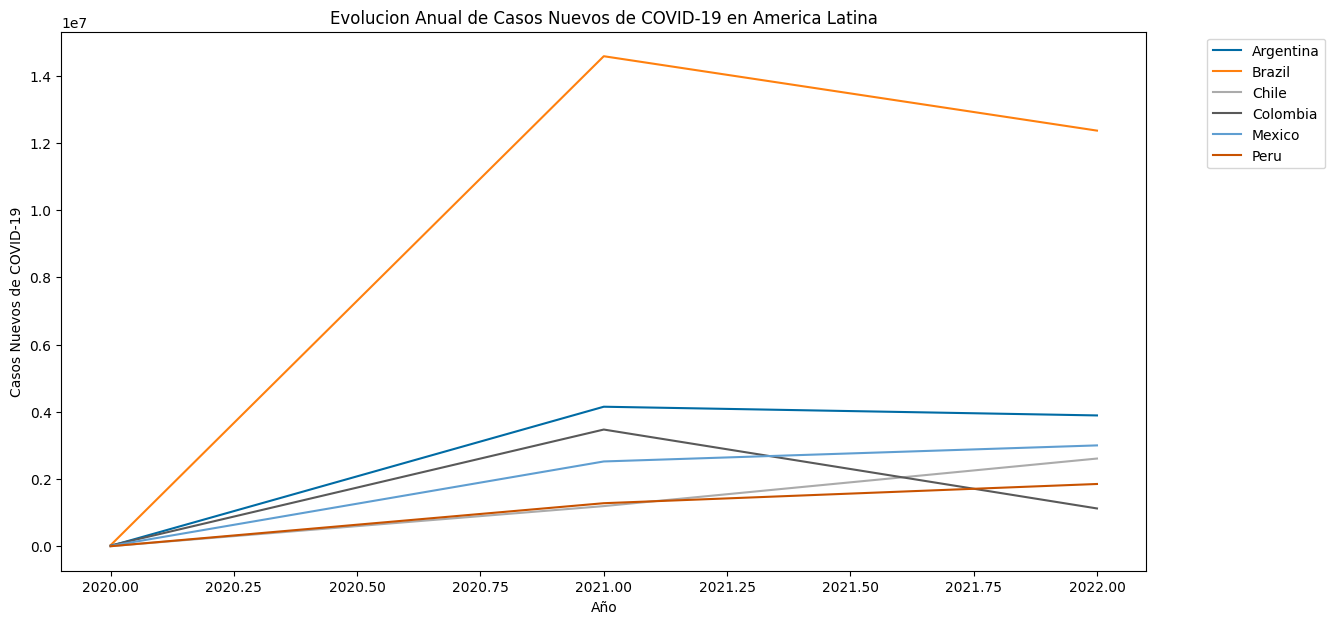

In [ ]:

# Agrupar los datos por 'country_name' y 'year' y sumar los casos nuevos confirmados para cada semana
casos_anuales = data_latinoamerica_paises.groupby(['country_name', 'year']) ['new_confirmed']. sum().reset_index()

plt.figure(figsize=(14, 7))
for country in casos_anuales['country_name'].unique():      # Iterar sobre cada país único en el conjunto de datos agrupados
    casos_anuales_por_pais = casos_anuales [casos_anuales['country_name'] == country]       # Filtrar los datos para el país actual
    plt.plot(casos_anuales_por_pais['year'], casos_anuales_por_pais['new_confirmed'], label=country)    # Graficar los casos nuevos confirmados por año por pais

plt.ylabel('Casos Nuevos de COVID-19')  #añadir titulo eje y
plt.xlabel('Año')   #añadir titulo eje x
plt.title('Evolucion Anual de Casos Nuevos de COVID-19 en America Latina')  #agregar titulo al grafico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')       # Añadir la leyenda fuera del gráfico, a la derecha
plt.show()      #imprimir el grafico

Evolución Anual de Casos Nuevos de COVID-19 en América Latina
Brasil mostró el mayor incremento en casos nuevos de COVID-19 hasta mediados de 2021, seguido de una disminución hacia el final del año. Argentina y Colombia también tuvieron incrementos significativos, pero en menor medida. La tendencia general indica un aumento inicial en los casos nuevos con una estabilización o ligera disminución posterior.

In [ ]:
data_latinoamerica_paises.head()

date location_key country_code country_name  new_confirmed  \
0 2021-01-02           AR           AR    Argentina         7767.0   
1 2021-01-03           AR           AR    Argentina         4934.0   
2 2021-01-04           AR           AR    Argentina        13953.0   
3 2021-01-05           AR           AR    Argentina        14085.0   
4 2021-01-06           AR           AR    Argentina        14496.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         166.0             1670634.0              46688.0   
1         157.0             1675568.0              46845.0   
2         157.0             1689521.0              47002.0   
3         160.0             1703606.0              47162.0   
4         131.0             1718102.0              47293.0   

   cumulative_vaccine_doses_administered  population  ...  life_expectancy  \
0                                20334.0  44938712.0  ...            76.52   
1                                20529.0  44938712.0  ...            76.52   
2                                25164.0  44938712.0  ...            76.52   
3                                29852.0  44938712.0  ...            76.52   
4                                34162.0  44938712.0  ...            76.52   

   adult_male_mortality_rate  adult_female_mortality_rate  \
0                    147.086                       79.483   
1                    147.086                       79.483   
2                    147.086                       79.483   
3                    147.086                       79.483   
4                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            0.0   
1                      26.6                        15.8            0.0   
2                      26.6                        15.8            0.0   
3                      26.6                        15.8            0.0   
4                      26.6                        15.8            0.0   

   cumulative_recovered  week  year  month  
0                   0.0    53  2020      1  
1                   0.0    53  2020      1  
2                   0.0     1  2021      1  
3                   0.0     1  2021      1  
4                   0.0     1  2021      1  

[5 rows x 53 columns]

Tasa de crecimiento %

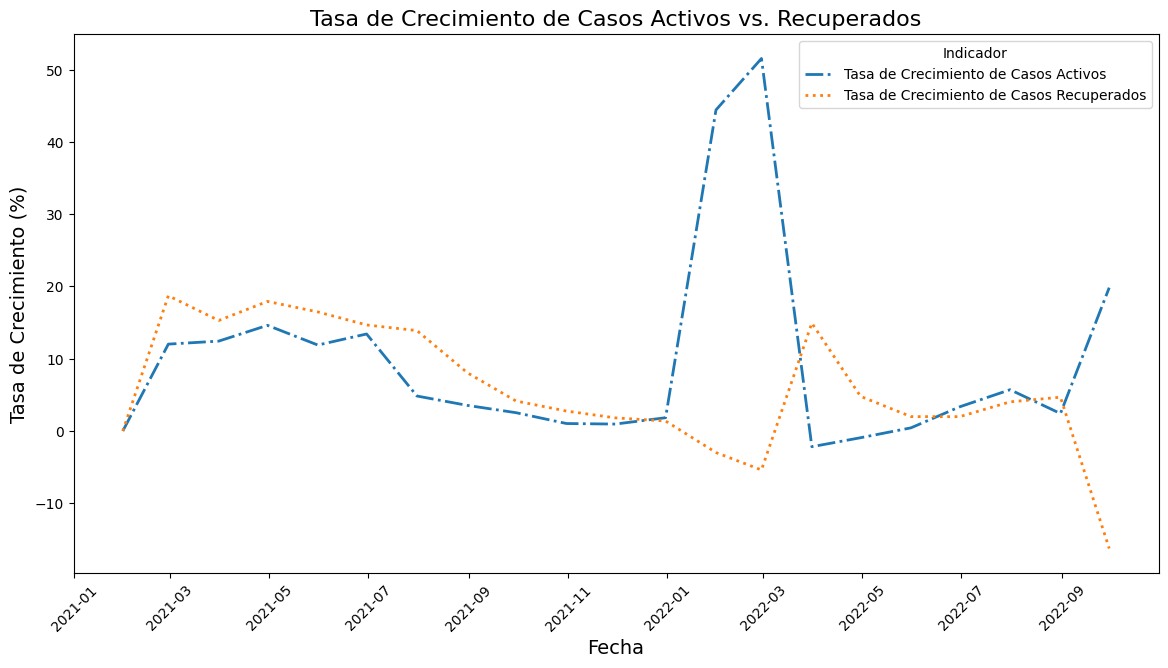

In [ ]:
# Configurar 'date' como el nuevo índice
data_latinoamerica_paises.set_index('date', inplace=True)

# Calcular los casos activos
data_latinoamerica_paises['active_cases'] = data_latinoamerica_paises['cumulative_confirmed'] - data_latinoamerica_paises['cumulative_recovered'] - data_latinoamerica_paises['cumulative_deceased']
# Crea una nueva columna 'active_cases' restando los casos recuperados y fallecidos de los casos confirmados



# Resamplear los datos a una frecuencia mensual y calcular la media
datos_mensuales = data_latinoamerica_paises.resample('ME').mean(numeric_only=True)
# Resamplea los datos a una frecuencia mensual ('M') y calcula la media de las columnas numéricas

# Calcular la tasa de crecimiento en porcentaje para casos activos
datos_mensuales['tasa_crecimiento_activos'] = ((datos_mensuales['active_cases'].diff() / datos_mensuales['active_cases'].shift()) * 100).fillna(0)
# Calcula la tasa de crecimiento mensual para casos activos
# diff() calcula la diferencia entre el valor actual y el anterior
# shift() desplaza los datos hacia abajo
# fillna(0) reemplaza los valores NaN con 0

# Calcular la tasa de crecimiento en porcentaje para casos recuperados
datos_mensuales['tasa_crecimiento_recuperados'] = ((datos_mensuales['cumulative_recovered'].diff() / datos_mensuales['cumulative_recovered'].shift()) * 100).fillna(0)
# Calcula la tasa de crecimiento mensual para casos recuperados usando la misma lógica que para casos activos

# Crear el gráfico de líneas para la tasa de crecimiento de casos activos y casos recuperados
plt.figure(figsize=(14, 7))  # Configurar el tamaño de la figura del gráfico

# Graficar la tasa de crecimiento de casos activos
plt.plot(datos_mensuales.index, datos_mensuales['tasa_crecimiento_activos'], label='Tasa de Crecimiento de Casos Activos', linestyle='-.', linewidth=2, color='#1f77b4')
# Crea una línea para la tasa de crecimiento de casos activos con un estilo de línea discontinua

# Graficar la tasa de crecimiento de casos recuperados
plt.plot(datos_mensuales.index, datos_mensuales['tasa_crecimiento_recuperados'], label='Tasa de Crecimiento de Casos Recuperados', linestyle=':', linewidth=2, color='#ff7f0e')
# Crea una línea para la tasa de crecimiento de casos recuperados con un estilo de línea punteada

# Configurar los títulos y etiquetas
plt.title('Tasa de Crecimiento de Casos Activos vs. Recuperados', fontsize=16)  # Título del gráfico
plt.xlabel('Fecha', fontsize=14)  # Etiqueta para el eje X
plt.ylabel('Tasa de Crecimiento (%)', fontsize=14)  # Etiqueta para el eje Y
plt.legend(title='Indicador')  # Mostrar la leyenda con el título 'Indicador'

# Rotar las etiquetas del eje X para que sean más legibles
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X 45 grados

# Mostrar el gráfico
plt.show()  # Muestra el gráfico en pantalla



Tasa de Crecimiento de Casos Activos vs. Recuperados
La gráfica muestra fluctuaciones significativas en diferentes periodos. Los casos activos experimentaron un pico notable a principios de 2022, seguido de una rápida disminución. En contraste, la tasa de crecimiento de casos recuperados se mantuvo más estable pero presentó algunos aumentos abruptos.

Ejemplos de Valores Negativos
Casos Activos: Un valor negativo en la tasa de crecimiento de casos activos puede ocurrir cuando hay una disminución significativa en los casos activos debido a un aumento en los recuperados o fallecidos. Por ejemplo, si en un mes hay más personas recuperándose o falleciendo que nuevos casos confirmados, esto reduciría el número de casos activos.

Casos Recuperados: Un valor negativo en la tasa de crecimiento de casos recuperados podría resultar de errores en los reportes de datos o correcciones en los datos históricos, donde se ajustan los números reportados previamente.

Progreso de la vacunación por país

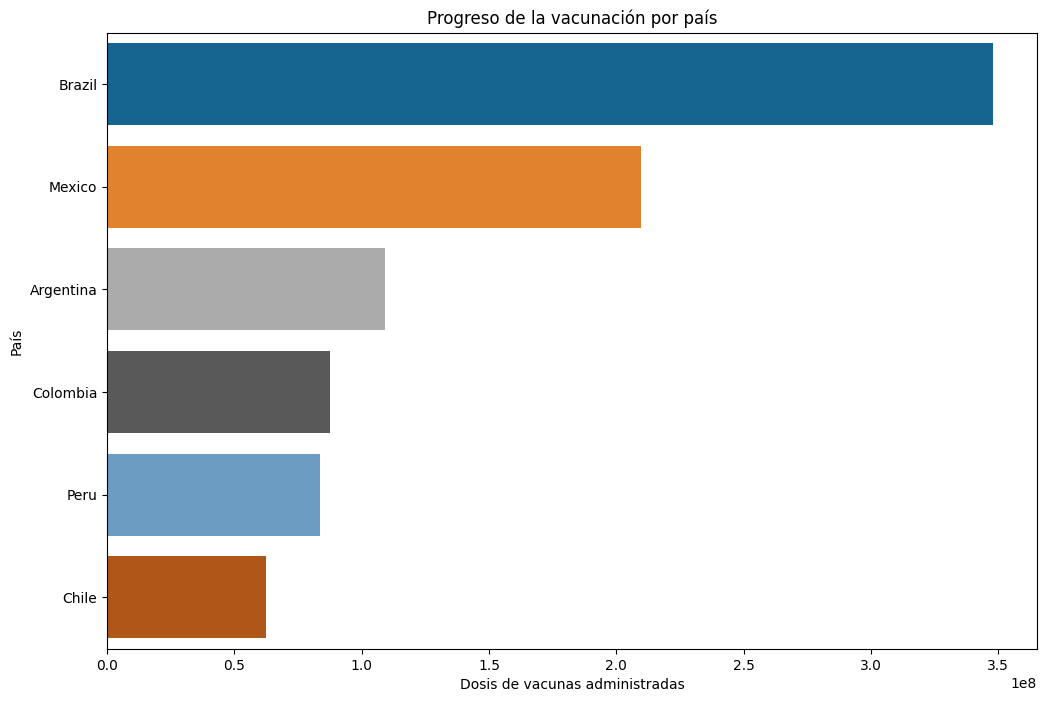

In [ ]:
# Agrupar los datos de vacunación por país y obtener el máximo de dosis administradas
vaccination_data = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

# Configurar el tamaño de la figura para el gráfico
plt.figure(figsize=(12, 8))

# Crear un gráfico de barras con seaborn para mostrar las dosis de vacunas administradas por país
# hue=vaccination_data.index: Asigna la variable y (los países) al parámetro hue para colorear las barras correctamente.
# legend=False: Desactiva la leyenda ya que no es necesaria para este gráfico.
# dodge=False: Evita la separación de las barras por grupos, ya que cada país tiene una sola barra.
sns.barplot(x=vaccination_data.values, y=vaccination_data.index, hue=vaccination_data.index, dodge=False, legend=False)

# Etiqueta para el eje X
plt.xlabel('Dosis de vacunas administradas')

# Etiqueta para el eje Y
plt.ylabel('País')

# Título del gráfico
plt.title('Progreso de la vacunación por país')

# Mostrar el gráfico
plt.show()

Brasil y México lideran significativamente en términos de dosis administradas, con Brasil alcanzando cerca de 350 millones de dosis. Argentina, Colombia, Perú y Chile siguen, aunque con cifras notablemente más bajas, reflejando una distribución desigual en la campaña de vacunación en la región.



Temperatura promedio y nuevos casos confirmados

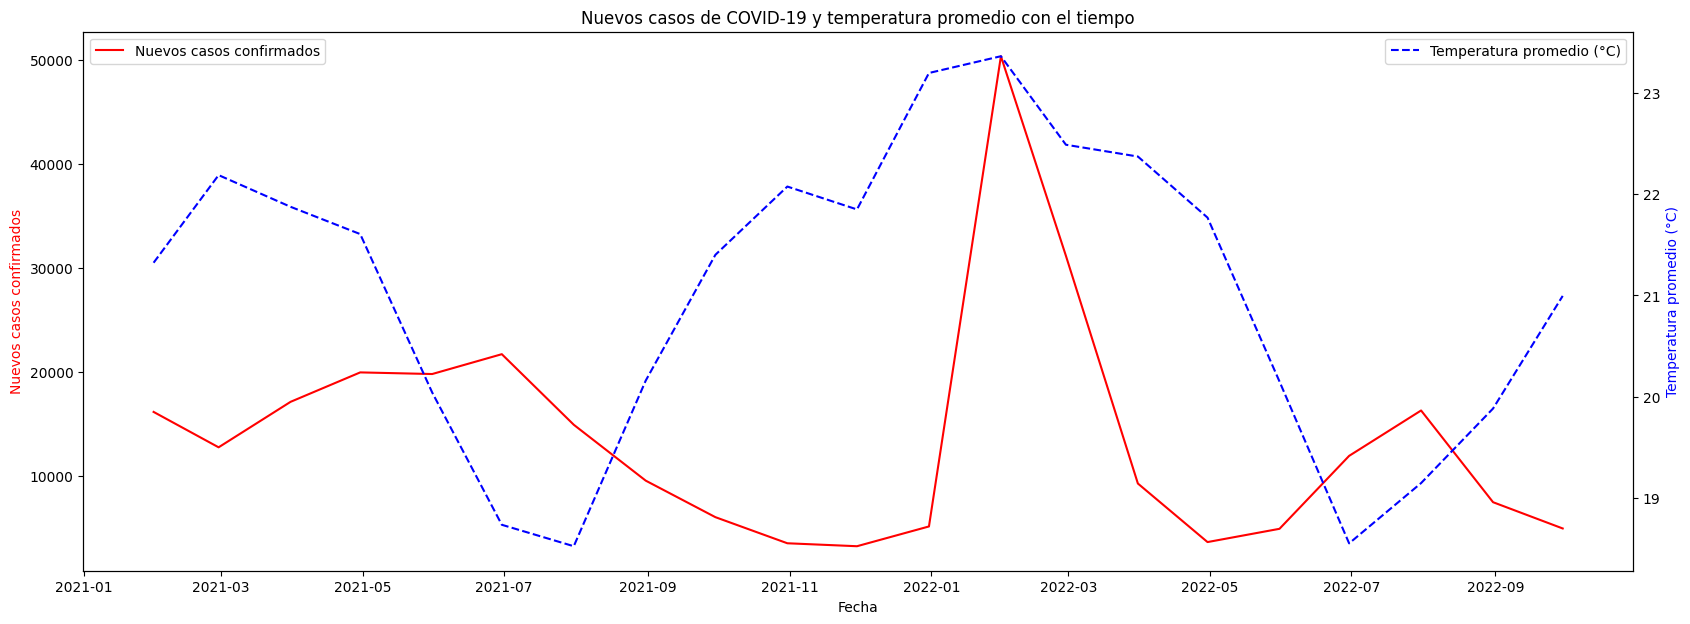

In [ ]:
# Graficamos la relación entre la temperatura promedio y los nuevos casos confirmados de COVID-19

# Configurar el tamaño de la figura para el gráfico
plt.figure(figsize=(20, 7))

# Obtener el objeto del eje actual
ax1 = plt.gca()

# Crear un segundo eje y compartir el mismo eje x
ax2 = ax1.twinx()

# Graficar los nuevos casos confirmados en el primer eje
# data_latinoamerica_paises.resample('ME').mean(numeric_only=True): Resamplea los datos mensualmente y calcula la media de los valores numéricos.
ax1.plot(
    data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, 
    data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'], 
    color='red', 
    label='Nuevos casos confirmados'
)

# Graficar la temperatura promedio en el segundo eje
# data_latinoamerica_paises.resample('ME').mean(numeric_only=True): Resamplea los datos mensualmente y calcula la media de los valores numéricos.
ax2.plot(
    data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, 
    data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['average_temperature_celsius'], 
    color='blue', 
    label='Temperatura promedio (°C)', 
    linestyle='--'
)

# Etiqueta para el eje x
ax1.set_xlabel('Fecha')

# Etiqueta para el eje y del primer gráfico
ax1.set_ylabel('Nuevos casos confirmados', color='red')

# Etiqueta para el eje y del segundo gráfico
ax2.set_ylabel('Temperatura promedio (°C)', color='blue')

# Título del gráfico
plt.title('Nuevos casos de COVID-19 y temperatura promedio con el tiempo')

# Mostrar leyenda para el primer gráfico
ax1.legend(loc='upper left')

# Mostrar leyenda para el segundo gráfico
ax2.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

La tendencia de los nuevos casos de COVID-19 no parece estar directamente correlacionada con la temperatura promedio. Aunque ambos muestran patrones de cambio a lo largo del tiempo, las variaciones en la temperatura no coinciden necesariamente con los aumentos o disminuciones en los casos de COVID-19.

Es posible que otros factores, además de la temperatura, jueguen un papel más significativo en la variabilidad de los nuevos casos confirmados.

Impacto de la urbanización en la propagación de Covid-19

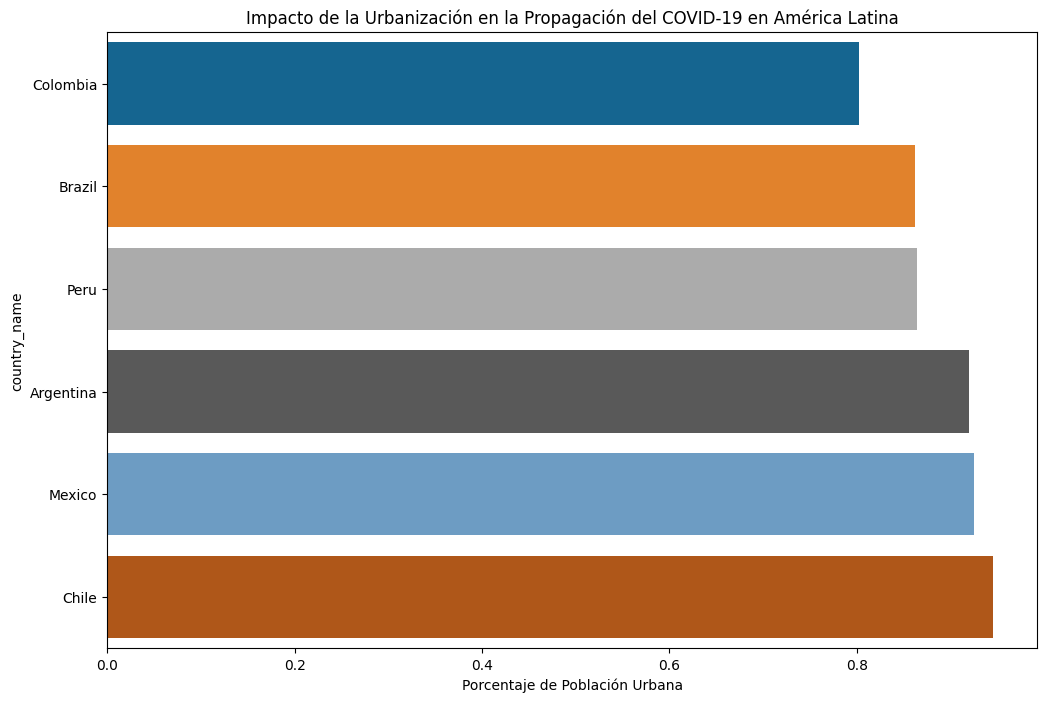

In [ ]:
# Cada país tiene un impacto debido a la urbanización y la densidad de población, por lo que vamos a analizar la densidad de población en cada país.

# Calcular el porcentaje de población urbana para cada país
data_latinoamerica_paises['urban_population_percentage'] = data_latinoamerica_paises['population_urban'] / data_latinoamerica_paises['population']

# Agrupar los datos por país y obtener el último valor de cada grupo, luego ordenar por el porcentaje de población urbana
# groupby('country_name'): Agrupa los datos por el nombre del país.
# .last(): Obtiene el último registro de cada grupo (país).
# .sort_values(by='urban_population_percentage'): Ordena los datos por el porcentaje de población urbana en orden ascendente.
urban_cases = data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_percentage')

# Configurar el tamaño de la figura para el gráfico
plt.figure(figsize=(12, 8))

# Crear un gráfico de barras con seaborn para mostrar el porcentaje de población urbana por país
# Corregir el uso de hue y legend para evitar la advertencia de depreciación
# sns.barplot(): Crea un gráfico de barras utilizando seaborn.
# x=urban_cases['urban_population_percentage']: Utiliza el porcentaje de población urbana para el eje X.
# y=urban_cases.index: Utiliza los nombres de los países para el eje Y.
# hue=urban_cases.index: Asigna los colores basados en los países para evitar la advertencia de depreciación.
# dodge=False: Evita la separación de las barras por grupos, ya que cada país tiene una sola barra.
# legend=False: Desactiva la leyenda ya que no es necesaria para este gráfico.
sns.barplot(x=urban_cases['urban_population_percentage'], y=urban_cases.index, hue=urban_cases.index, dodge=False, legend=False)

# Etiqueta para el eje X
plt.xlabel('Porcentaje de Población Urbana')

# Título del gráfico
plt.title('Impacto de la Urbanización en la Propagación del COVID-19 en América Latina')

# Mostrar el gráfico
plt.show()

El gráfico muestra el porcentaje de población urbana en diferentes países de América Latina y cómo esto podría influir en la propagación del COVID-19. La mayor poblacion en urbanizaciones(Chile, Mexico, Argentina) podria facilitar la propagacion del virus debido a la mayor densidad de población y la interacción social. Esto es raro ya que en Chile fue uno de los mejores paises que manejo la pandemia

Distribución de la Población por Edad en cada país

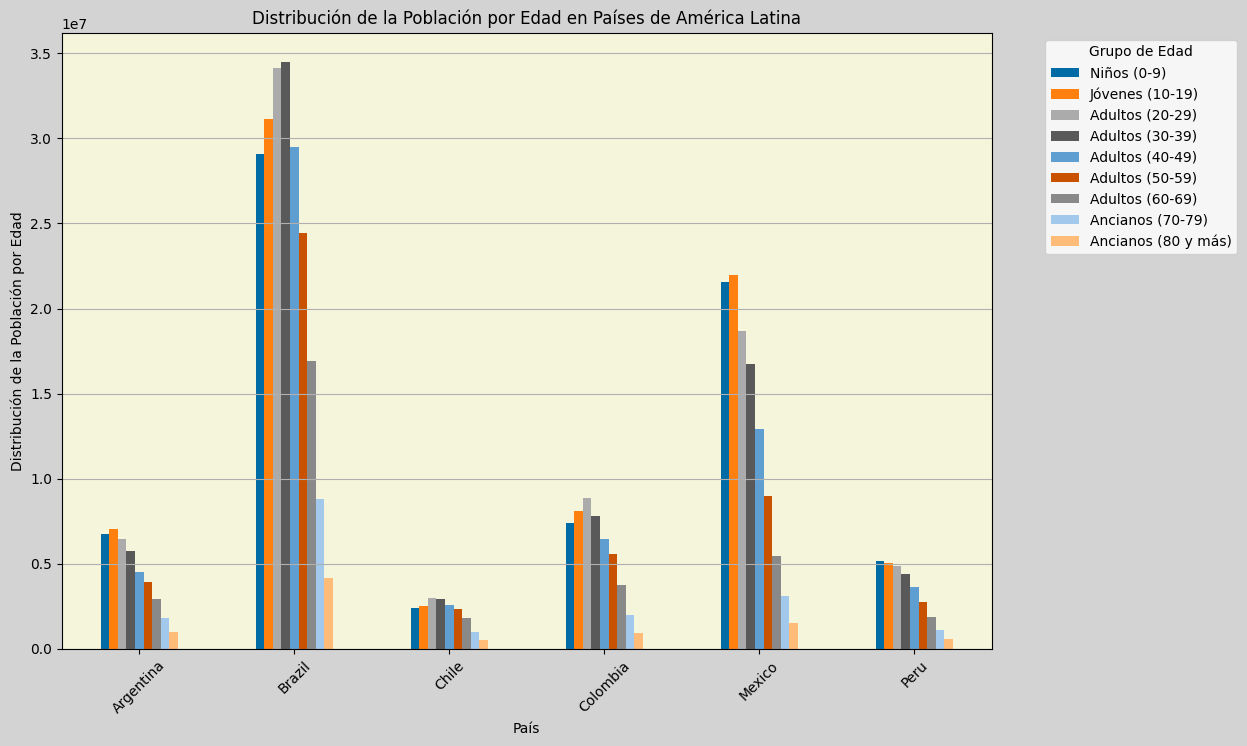

In [ ]:

# Definir los grupos de edad para el análisis
age_groups = [
    'population_age_00_09', 
    'population_age_10_19', 
    'population_age_20_29', 
    'population_age_30_39', 
    'population_age_40_49', 
    'population_age_50_59', 
    'population_age_60_69', 
    'population_age_70_79', 
    'population_age_80_and_older'
]

# Agrupar los datos por país y calcular la media para cada grupo de edad
age_distribution = data_latinoamerica_paises.groupby('country_name')[age_groups].mean()

# Graficar la distribución de la población por edad en cada país
age_distribution.plot(kind='bar', stacked=False, figsize=(12, 8))

# Etiqueta para el eje X
plt.xlabel('País')

# Etiqueta para el eje Y
plt.ylabel('Distribución de la Población por Edad')

# Título del gráfico
plt.title('Distribución de la Población por Edad en Países de América Latina')

# Mostrar la leyenda del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Grupo de Edad', labels=['Niños (0-9)', 'Jóvenes (10-19)', 'Adultos (20-29)', 'Adultos (30-39)', 'Adultos (40-49)', 'Adultos (50-59)', 'Adultos (60-69)', 'Ancianos (70-79)', 'Ancianos (80 y más)'])
plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico
plt.grid(axis='y')  # Agregar lineas solo en el eje y
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

El gráfico muestra claramente la desigualdad en cantidades de población por grupos de edad en los países seleccionados aunque no proporcione muchas cosas interesantes. Es bueno tenerlo en cuenta para conocer la mayoria de poblacion en cada pais y para futuros analisis.

Tasa de mortalidad por Covid cada 1000 habitantes por país

              cumulative_deceased   population  mortality_rate_per_1000
country_name                                                           
Argentina           130367.516129   44938712.0                 2.901007
Brazil              686777.893891  212559409.0                 3.230993
Chile                49679.916129   17574003.0                 2.826898
Colombia            155770.000000   50882884.0                 3.061344
Mexico              328867.816425  110991953.0                 2.962988
Peru                216961.935484   29381884.0                 7.384208


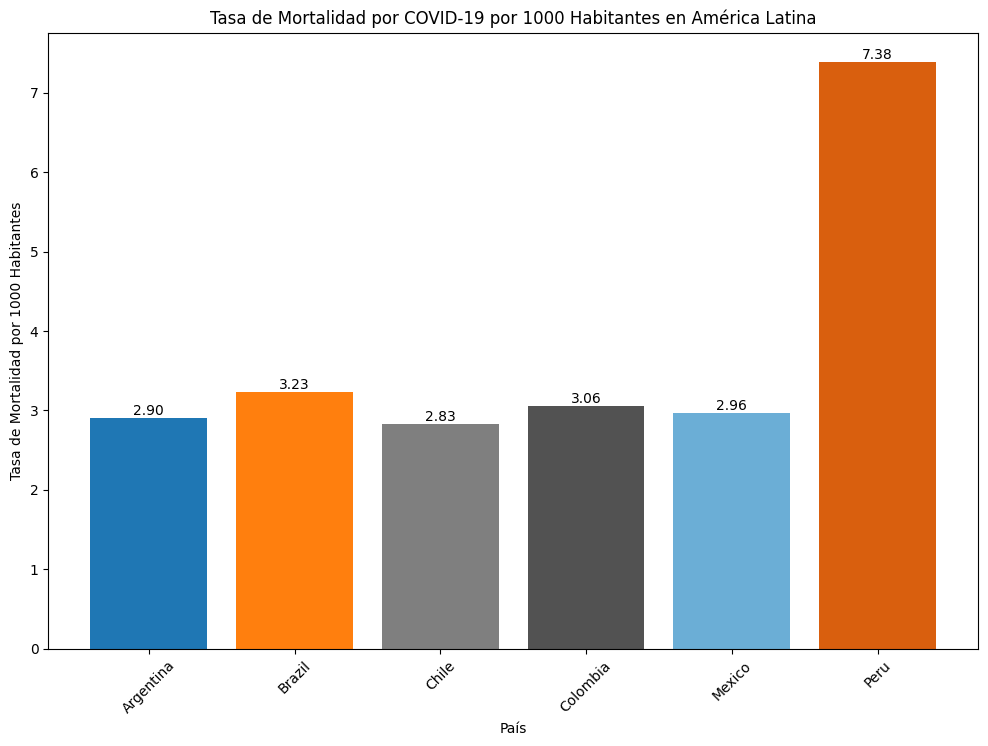

In [ ]:
# Calcular la tasa de mortalidad por cada 1000 habitantes en cada país


# data_latinoamerica_paises = pd.DataFrame({
#     'country_name': ['Country1', 'Country2', 'Country3', 'Country4', 'Country5', 'Country6'],
#     'cumulative_deceased': [1000, 2000, 3000, 4000, 5000, 6000],
#     'population': [1000000, 2000000, 3000000, 4000000, 5000000, 6000000]
# })

# 1. Agrupar los datos por país y obtener el valor máximo de fallecidos acumulados y población total
grouped_data = data_latinoamerica_paises.groupby('country_name').max()

# 2. Calcular la tasa de mortalidad por cada 1000 habitantes
grouped_data['mortality_rate_per_1000'] = (grouped_data['cumulative_deceased'] / grouped_data['population']) * 1000

# 3. Seleccionar las columnas relevantes para visualizar la tasa de mortalidad
mortality_rate_data = grouped_data[['cumulative_deceased', 'population', 'mortality_rate_per_1000']]

# 4. Mostrar los resultados (Imprimir el DataFrame resultante para verificar los cálculos)
print(mortality_rate_data)

# Opcional: Graficar la tasa de mortalidad por cada 1000 habitantes para cada país

# Configurar el tamaño de la figura para el gráfico
plt.figure(figsize=(12, 8))

# Definir una paleta de colores manualmente basada en la imagen proporcionada
palette = ['#1f77b4', '#ff7f0e', '#7f7f7f', '#525252', '#6baed6', '#d95f0e']

# Crear un gráfico de barras con los países y sus tasas de mortalidad, asignando un color distinto a cada país
bars = plt.bar(mortality_rate_data.index, mortality_rate_data['mortality_rate_per_1000'], color=palette)

# Etiqueta para el eje X
plt.xlabel('País')

# Etiqueta para el eje Y
plt.ylabel('Tasa de Mortalidad por 1000 Habitantes')

# Título del gráfico
plt.title('Tasa de Mortalidad por COVID-19 por 1000 Habitantes en América Latina')

# Rotar las etiquetas del eje X para que se vean mejor
plt.xticks(rotation=45)

# Agregar el valor de cada tasa de mortalidad por encima de cada barra con formato abreviado
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

Tasa de Mortalidad por COVID-19 por 1000 Habitantes en América Latina

Perú presenta la tasa de mortalidad más alta por COVID-19, con una cifra de 7.38 muertes por cada 1000 habitantes. Chile, Brasil y Colombia también muestran tasas de mortalidad relativamente altas en comparación con Argentina y México. Este análisis resalta la necesidad de enfoques específicos y mejorados en las estrategias de manejo de la pandemia en los países con tasas de mortalidad más altas.

Comparación de Estrategias de Vacunación por cada 1000 habitantes en América Latina

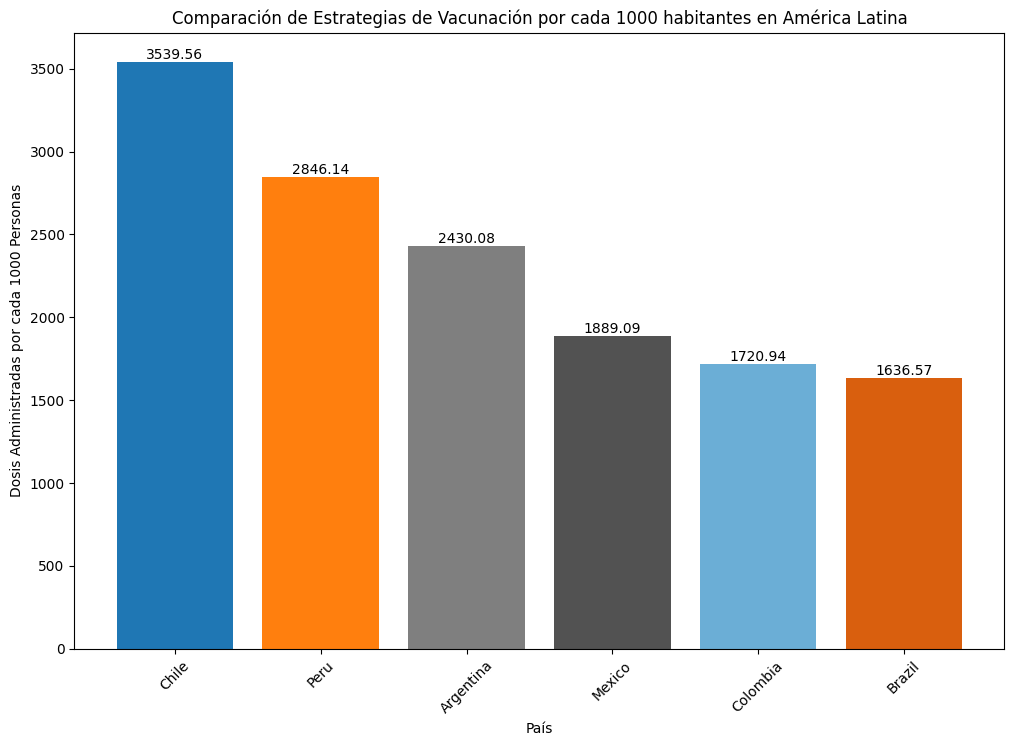

In [ ]:

# 1. Agrupar los datos por país y obtener el valor máximo de dosis de vacunas administradas y población total
vaccination_strategy = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].max() * 1000

# 2. Ordenar los datos de la estrategia de vacunación en orden ascendente
vaccination_strategy = vaccination_strategy.sort_values(ascending=False)

# 3. Configurar el tamaño de la figura para el gráfico
plt.figure(figsize=(12, 8))

# 4. Definir una paleta de colores manualmente basada en la imagen proporcionada
palette = ['#1f77b4', '#ff7f0e', '#7f7f7f', '#525252', '#6baed6', '#d95f0e']

# 5. Crear un gráfico de barras con los países y sus tasas de vacunación, asignando un color distinto a cada país
bars = plt.bar(vaccination_strategy.index, vaccination_strategy.values, color=palette)

# 6. Etiqueta para el eje X
plt.xlabel('País')

# 7. Etiqueta para el eje Y
plt.ylabel('Dosis Administradas por cada 1000 Personas')

# 8. Título del gráfico
plt.title('Comparación de Estrategias de Vacunación por cada 1000 habitantes en América Latina')

# 9. Rotar las etiquetas del eje X para que se vean mejor
plt.xticks(rotation=45)

# 10. Agregar el valor de cada dosis de vacunación por encima de cada barra con formato abreviado
for bar in bars:
    # Obtiene la altura de cada barra del gráfico de barras
    yval = bar.get_height()
    
    # Agrega un texto encima de cada barra en el gráfico
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Posición X del texto: centro de la barra
        yval,  # Posición Y del texto: altura de la barra
        f'{yval:.2f}',  # Texto a mostrar: valor de la altura con 2 decimales
        ha='center',  # Alineación horizontal del texto: centro
        va='bottom'  # Alineación vertical del texto: parte inferior del texto justo encima de la barra
    )
# 11. Mostrar el gráfico
plt.show()

Comparación de Estrategias de Vacunación por cada 1000 Habitantes en América Latina:

Chile lidera significativamente en la administración de dosis de vacunas por cada 1000 personas, seguido por Perú y Argentina. Brasil y Colombia muestran menores tasas de vacunación por cada 1000 habitantes, indicando variaciones en las estrategias de vacunación entre los países.

Países con las mayores y menores tasas de mortalidad acumulada

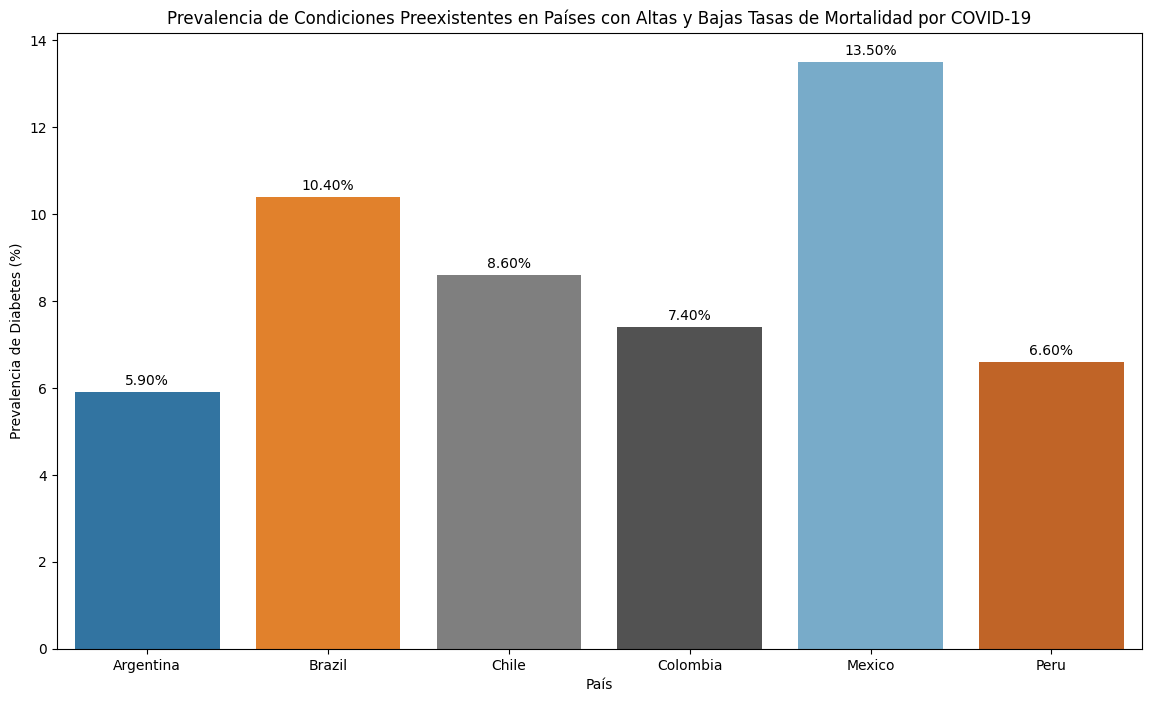

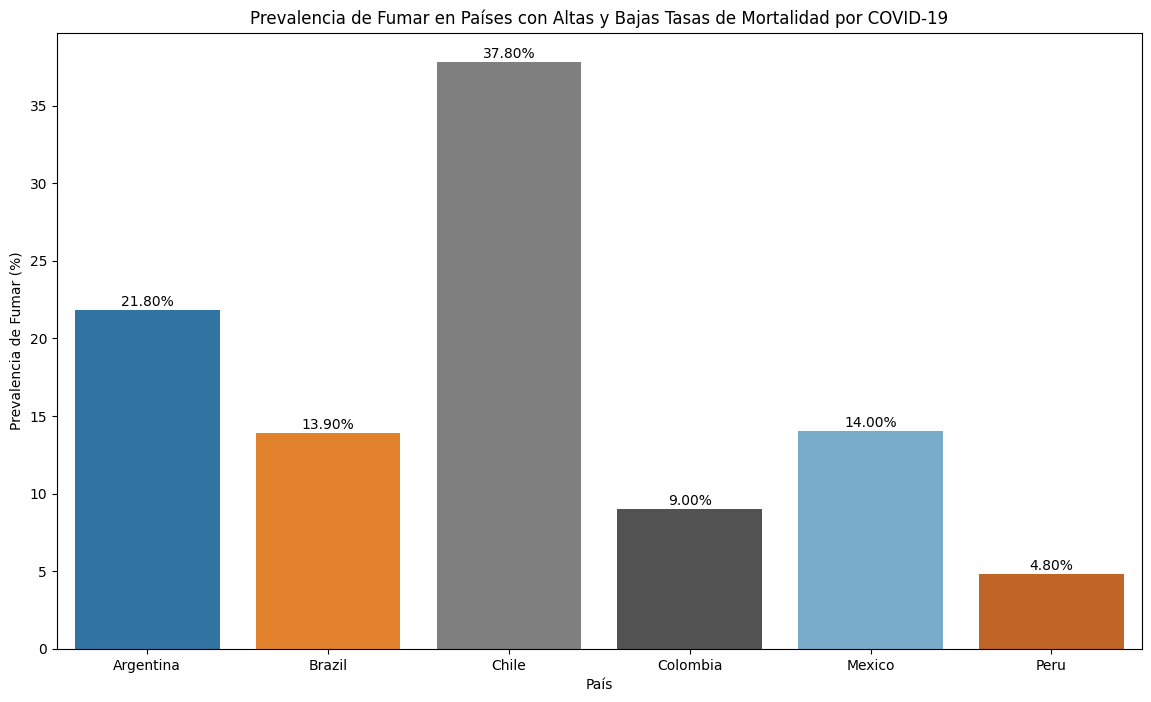

In [ ]:

# Obtener los países con las mayores y menores tasas de mortalidad acumulada
top_countries = data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index
bottom_countries = data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().nsmallest(5).index

# Filtrar los datos para incluir solo los países en las listas de mayores y menores tasas de mortalidad
conditions_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(top_countries.union(bottom_countries))]

# Paleta de colores
palette = ['#1f77b4', '#ff7f0e', '#7f7f7f', '#525252', '#6baed6', '#d95f0e']

# Prevalencia de diabetes
plt.figure(figsize=(14, 8))  # Configurar el tamaño de la figura para el gráfico
ax = sns.barplot(data=conditions_data, x='country_name', y='diabetes_prevalence', hue='country_name', palette=palette)

# Etiqueta para el eje X
plt.xlabel('País')

# Etiqueta para el eje Y
plt.ylabel('Prevalencia de Diabetes (%)')

# Título del gráfico
plt.title('Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')

# Agregar el valor de prevalencia de diabetes encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height:.2f}%', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

# Prevalencia de fumar
plt.figure(figsize=(14, 8))  # Configurar el tamaño de la figura para el gráfico
ax = sns.barplot(data=conditions_data, x='country_name', y='smoking_prevalence', hue='country_name', palette=palette)

# Etiqueta para el eje X
plt.xlabel('País')

# Etiqueta para el eje Y
plt.ylabel('Prevalencia de Fumar (%)')

# Título del gráfico
plt.title('Prevalencia de Fumar en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')

# Agregar el valor de prevalencia de fumar encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height:.2f}%', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

Ahora identificamos que la diabetes afecta mucho más a México y Brasil, por lo que se podría decir que estos países son los que más han sufrido por la diabetes. 

Respecto a fumar se puede observar que afecta más a Chile y Argentina, por lo que se podría decir que estos países son los que más han sufrido por el fumar.

Y viendo todo esto, ¿cómo se ha visto la fatalidad por país?

Tasa de letalidad de Covid-19 por país

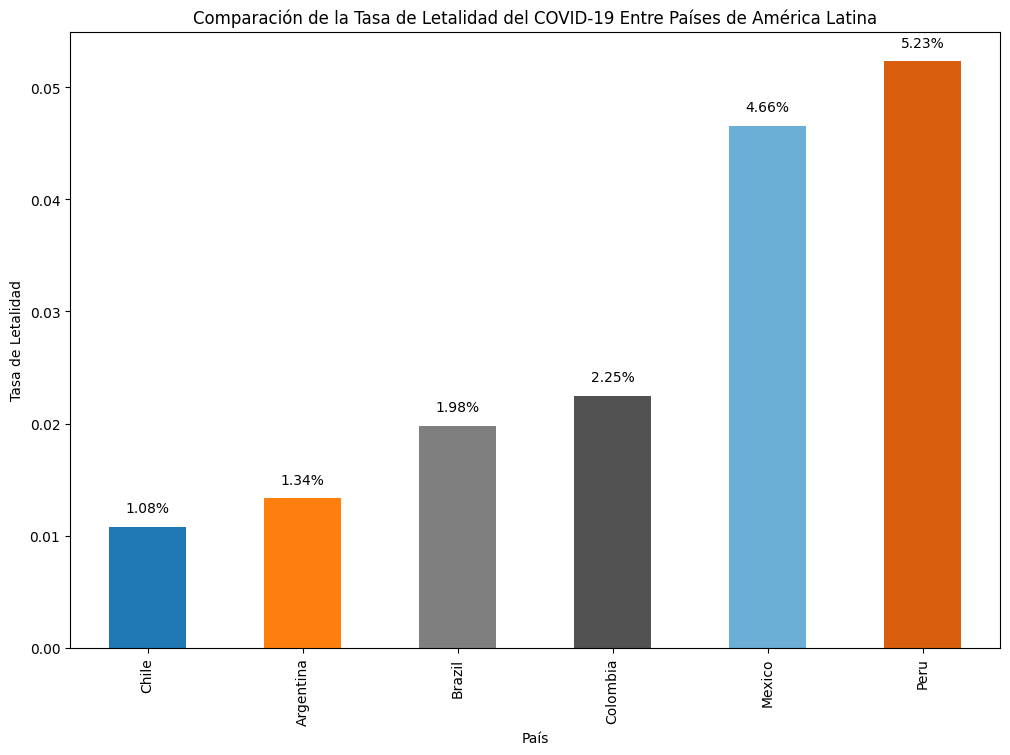

In [ ]:
# Calcula la tasa de letalidad por país
data_latinoamerica_paises['case_fatality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']

# Agrupa los datos por país y obtiene la última tasa de letalidad registrada para cada país, luego ordena estos valores
fatality_rates = data_latinoamerica_paises.groupby('country_name')['case_fatality_rate'].last().sort_values()

# Crear la figura del gráfico
plt.figure(figsize=(12, 8))  # Configura el tamaño de la figura para el gráfico

# Definir la paleta de colores
palette = ['#1f77b4', '#ff7f0e', '#7f7f7f', '#525252', '#6baed6', '#d95f0e']

# Crear el gráfico de barras utilizando la paleta de colores
bars = fatality_rates.plot(kind='bar', color=palette)

# Configurar los ejes y el título del gráfico
plt.xlabel('País')  # Etiqueta para el eje X
plt.ylabel('Tasa de Letalidad')  # Etiqueta para el eje Y
plt.title('Comparación de la Tasa de Letalidad del COVID-19 Entre Países de América Latina')  # Título del gráfico

# Agregar el valor de la tasa de letalidad encima de cada barra
for p in bars.patches:
    height = p.get_height()
    bars.text(p.get_x() + p.get_width() / 2., height + 0.001, f'{height:.2%}', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()  # Muestra el gráfico en pantalla

Comparación de la Tasa de Letalidad del COVID-19:

Perú muestra la tasa de letalidad más alta con un 5.23%, seguido por Colombia con 2.25% y Brasil con 1.98%. México presenta la tasa de letalidad más baja con un 0.83%, indicando diferencias significativas en la mortalidad por COVID-19 entre los países.Tasa de Mortalidad y Letalidad:

Se observó que Perú tiene la tasa de mortalidad más alta por COVID-19, lo que coincide con su alta tasa de letalidad en esta gráfica. Esto sugiere una mayor gravedad y mortalidad del virus en este país.
México, aunque tiene una tasa de mortalidad relativamente baja, también presenta una baja tasa de letalidad, lo que indica una mejor capacidad de tratamiento o menor gravedad de los casos confirmados.

Evolucion de la vacunación en América Latina y la reducción de casos

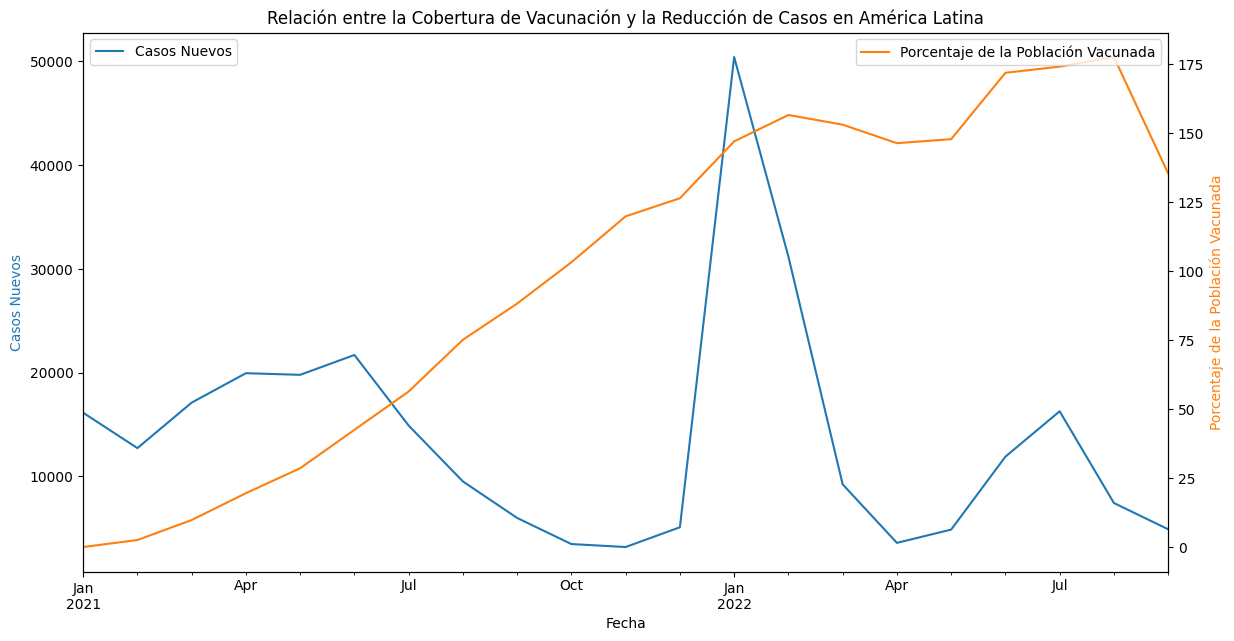

In [ ]:
# Como evoluciona la vacunación en América Latina y la reducción de casos de COVID-19

plt.figure(figsize=(14, 7))  # Configura el tamaño de la figura del gráfico

ax1 = plt.gca()  # Obtiene el eje actual
ax2 = ax1.twinx()  # Crea un segundo eje y que comparte el eje x con el primero

# Crea porcentajes de vacunación
data_latinoamerica_paises['percentage_vaccinated'] = (data_latinoamerica_paises['cumulative_vaccine_doses_administered'] / data_latinoamerica_paises['population']) * 100
# Calcula el porcentaje de vacunación acumulado

data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='#1f77b4', label='Casos Nuevos')
# Agrupa los datos por mes, calcula la media de nuevos casos confirmados y los grafica en el primer eje (ax1) con color de la paleta

data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='#ff7f0e', label='Porcentaje de la Población Vacunada')
# Agrupa los datos por mes, calcula la media del porcentaje de vacunación y los grafica en el segundo eje (ax2) con color de la paleta

# Configura los ejes y el título del gráfico
ax1.set_xlabel('Fecha')  # Etiqueta para el eje X
ax1.set_ylabel('Casos Nuevos', color='#1f77b4')  # Etiqueta para el eje Y del primer eje con color de la paleta
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='#ff7f0e')  # Etiqueta para el eje Y del segundo eje con color de la paleta

ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')  # Título del gráfico

# Añade las leyendas a los gráficos
ax1.legend(loc='upper left')  # Ubica la leyenda del primer eje en la parte superior izquierda
ax2.legend(loc='upper right')  # Ubica la leyenda del segundo eje en la parte superior derecha

plt.show()  # Muestra el gráfico en pantalla

El gráfico muestra una relación inversa entre la cobertura de vacunación y los casos nuevos de COVID-19 en América Latina. A medida que aumenta el porcentaje de la población vacunada, se observa una disminución significativa en los casos nuevos confirmados. Esto sugiere que la vacunación ha sido efectiva en reducir la propagación del virus en la región.

Variación Mensual de Casos y Muertes

C:\Users\danie\AppData\Local\Temp\ipykernel_14392\3142159841.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  nuevos_casos_por_mes = data_latinoamerica_paises['new_confirmed'].resample('M').sum()
C:\Users\danie\AppData\Local\Temp\ipykernel_14392\3142159841.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  nuevos_fallecidos_por_mes = data_latinoamerica_paises['new_deceased'].resample('M').sum()


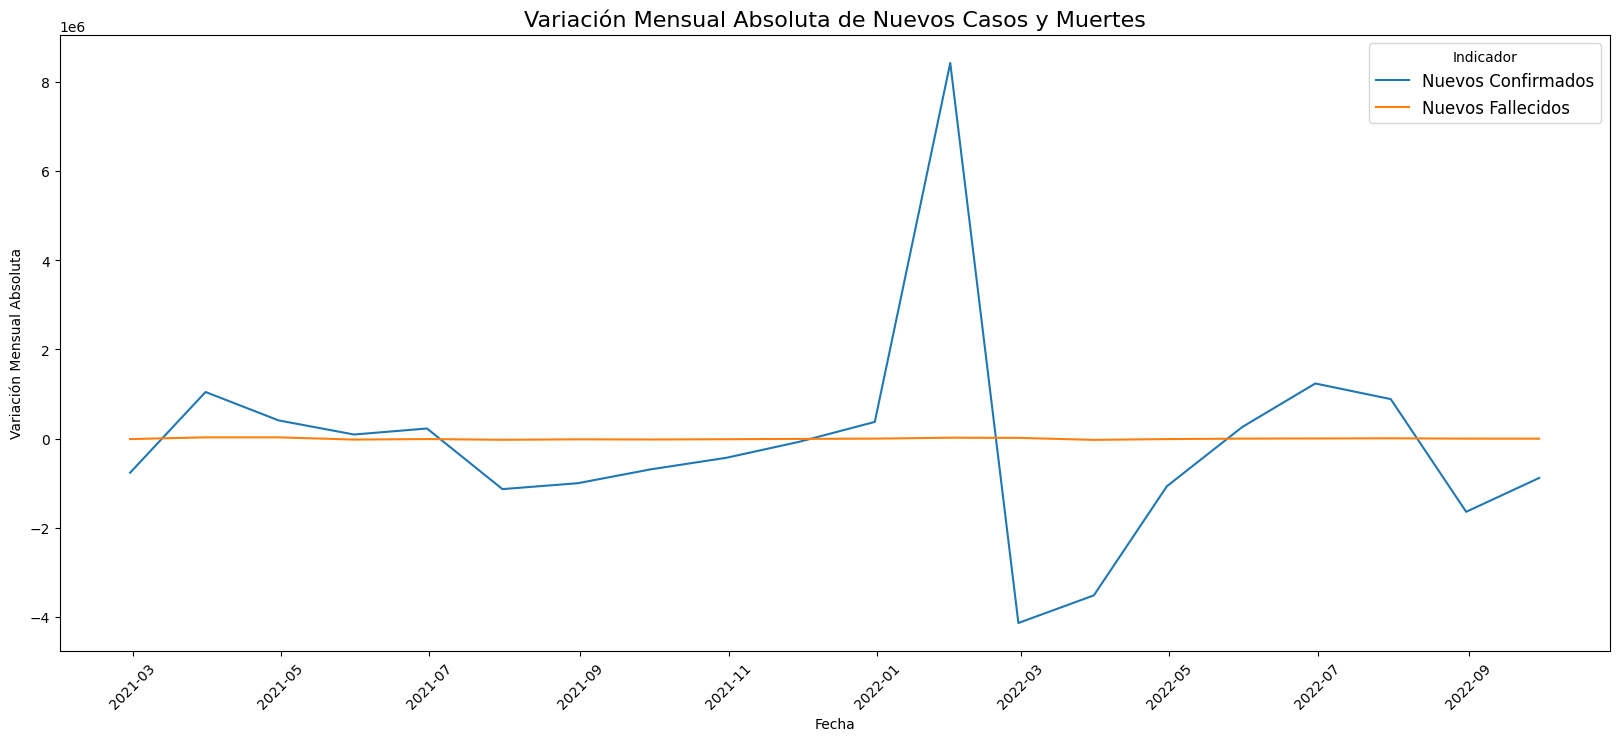

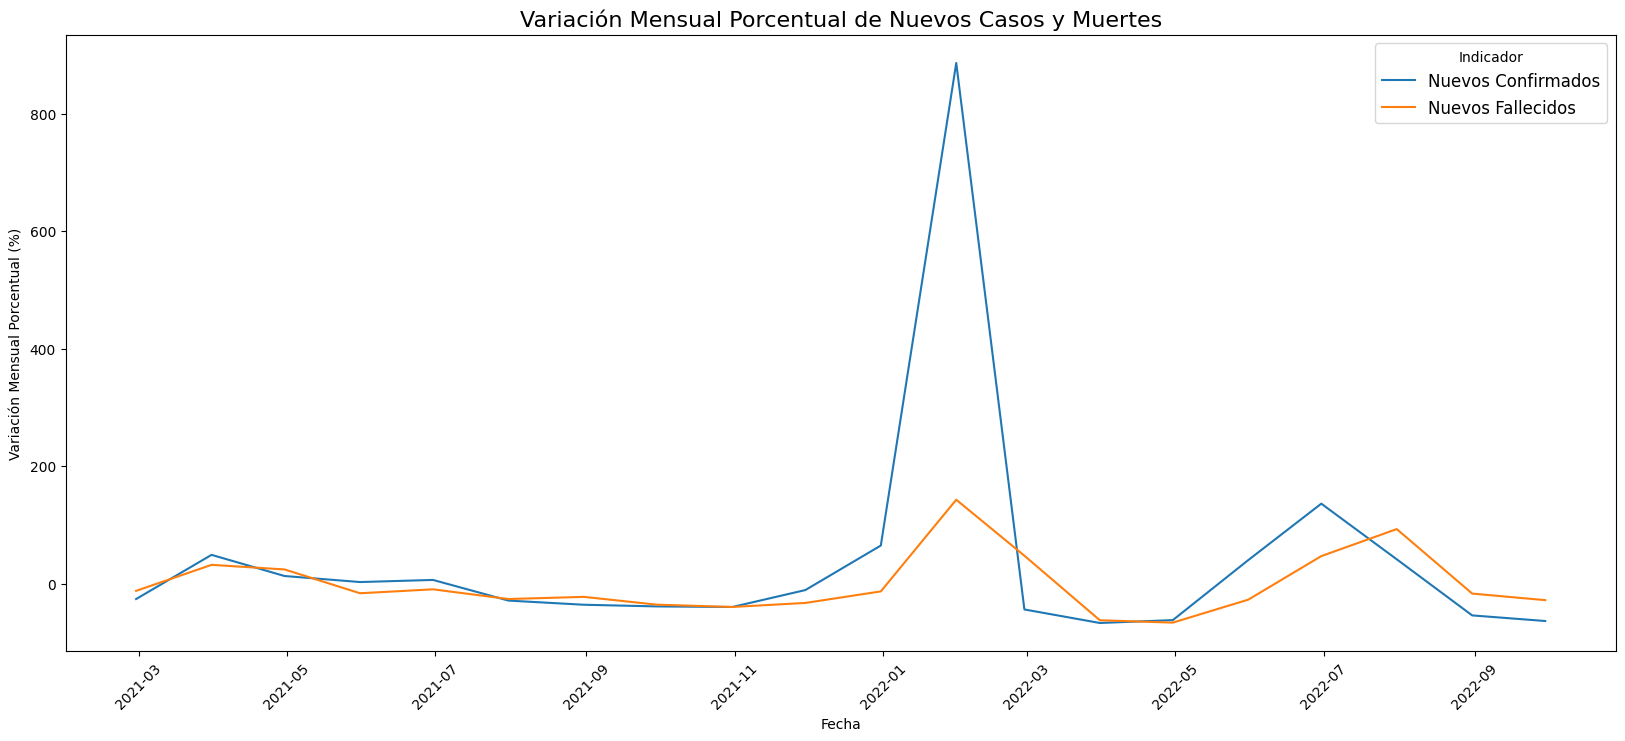

In [ ]:
# Importar las librerías necesarias
import pandas as pd  # Librería para manipulación y análisis de datos
import matplotlib.pyplot as plt  # Librería para crear gráficos
import seaborn as sns  # Librería para visualización de datos basada en matplotlib

# Supongamos que ya tienes un DataFrame con la columna 'date' como índice y en formato datetime
# data_latinoamerica_paises

# Asegurarse de que la columna 'date' esté en el índice y en formato datetime
data_latinoamerica_paises.index = pd.to_datetime(data_latinoamerica_paises.index)
# Convierte el índice del DataFrame 'data_latinoamerica_paises' a formato datetime

# Hacer un resampleo para calcular la suma mensual de nuevos casos confirmados y nuevas muertes
nuevos_casos_por_mes = data_latinoamerica_paises['new_confirmed'].resample('M').sum()
# Resamplea los datos para obtener la suma mensual de nuevos casos confirmados

nuevos_fallecidos_por_mes = data_latinoamerica_paises['new_deceased'].resample('M').sum()
# Resamplea los datos para obtener la suma mensual de nuevas muertes

# Calcular la variación mensual absoluta
variacion_absoluta_nuevos_casos = nuevos_casos_por_mes.diff()
# Calcula la diferencia absoluta mensual de nuevos casos confirmados

variacion_absoluta_nuevos_fallecidos = nuevos_fallecidos_por_mes.diff()
# Calcula la diferencia absoluta mensual de nuevas muertes

# Calcular la variación mensual porcentual
variacion_porcentual_nuevos_casos = (variacion_absoluta_nuevos_casos / nuevos_casos_por_mes.shift()) * 100
# Calcula la variación porcentual mensual de nuevos casos confirmados

variacion_porcentual_nuevos_fallecidos = (variacion_absoluta_nuevos_fallecidos / nuevos_fallecidos_por_mes.shift()) * 100
# Calcula la variación porcentual mensual de nuevas muertes

# Crear el gráfico de variación absoluta
plt.figure(figsize=(20, 8))  # Configura el tamaño de la figura del gráfico

# Graficar la variación mensual absoluta de nuevos casos confirmados
sns.lineplot(x=variacion_absoluta_nuevos_casos.index, y=variacion_absoluta_nuevos_casos.values, label='Nuevos Confirmados', color='#1f77b4')
# 'x' especifica el eje X que es el índice (fechas), 'y' especifica los valores de variación absoluta de nuevos casos

# Graficar la variación mensual absoluta de nuevas muertes
sns.lineplot(x=variacion_absoluta_nuevos_fallecidos.index, y=variacion_absoluta_nuevos_fallecidos.values, label='Nuevos Fallecidos', color='#ff7f0e')
# 'x' especifica el eje X que es el índice (fechas), 'y' especifica los valores de variación absoluta de nuevas muertes

# Personalizar el gráfico
plt.xlabel('Fecha')  # Etiqueta del eje X
plt.ylabel('Variación Mensual Absoluta')  # Etiqueta del eje Y
plt.title('Variación Mensual Absoluta de Nuevos Casos y Muertes', fontsize=16)  # Título del gráfico
plt.legend(title='Indicador', fontsize=12)  # Mostrar la leyenda con el título 'Indicador'
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X 45 grados
plt.show()  # Muestra el gráfico en pantalla

# Crear el gráfico de variación porcentual
plt.figure(figsize=(20, 8))  # Configura el tamaño de la figura del gráfico

# Graficar la variación mensual porcentual de nuevos casos confirmados
sns.lineplot(x=variacion_porcentual_nuevos_casos.index, y=variacion_porcentual_nuevos_casos.values, label='Nuevos Confirmados', color='#1f77b4')
# 'x' especifica el eje X que es el índice (fechas), 'y' especifica los valores de variación porcentual de nuevos casos

# Graficar la variación mensual porcentual de nuevas muertes
sns.lineplot(x=variacion_porcentual_nuevos_fallecidos.index, y=variacion_porcentual_nuevos_fallecidos.values, label='Nuevos Fallecidos', color='#ff7f0e')
# 'x' especifica el eje X que es el índice (fechas), 'y' especifica los valores de variación porcentual de nuevas muertes

# Personalizar el gráfico
plt.xlabel('Fecha')  # Etiqueta del eje X
plt.ylabel('Variación Mensual Porcentual (%)')  # Etiqueta del eje Y
plt.title('Variación Mensual Porcentual de Nuevos Casos y Muertes', fontsize=16)  # Título del gráfico
plt.legend(title='Indicador', fontsize=12)  # Mostrar la leyenda con el título 'Indicador'
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X 45 grados
plt.show()  # Muestra el gráfico en pantalla


Gráfico 1: Variación Mensual Absoluta de Nuevos Casos y Muertes
Este gráfico muestra la variación mensual absoluta en los nuevos casos confirmados y nuevas muertes por COVID-19 en América Latina. Se observa una fluctuación significativa en los nuevos casos confirmados, especialmente a inicios de 2022, mientras que las nuevas muertes mantienen una línea más estable. Esto sugiere que los casos confirmados experimentaron picos y descensos notables, mientras que las muertes no tuvieron variaciones tan drásticas.

Gráfico 2: Variación Mensual Porcentual de Nuevos Casos y Muertes
Este gráfico presenta la variación mensual porcentual de nuevos casos confirmados y nuevas muertes. A diferencia del gráfico de variación absoluta, aquí se puede observar que tanto los casos confirmados como las muertes muestran picos en porcentajes de variación, especialmente a principios de 2022. Esto indica que, aunque el número absoluto de muertes no varió significativamente, el porcentaje de cambio mensual fue considerable en ciertos períodos.

Analisis temporal de la Mortalidad por COVID-19 en America Latina

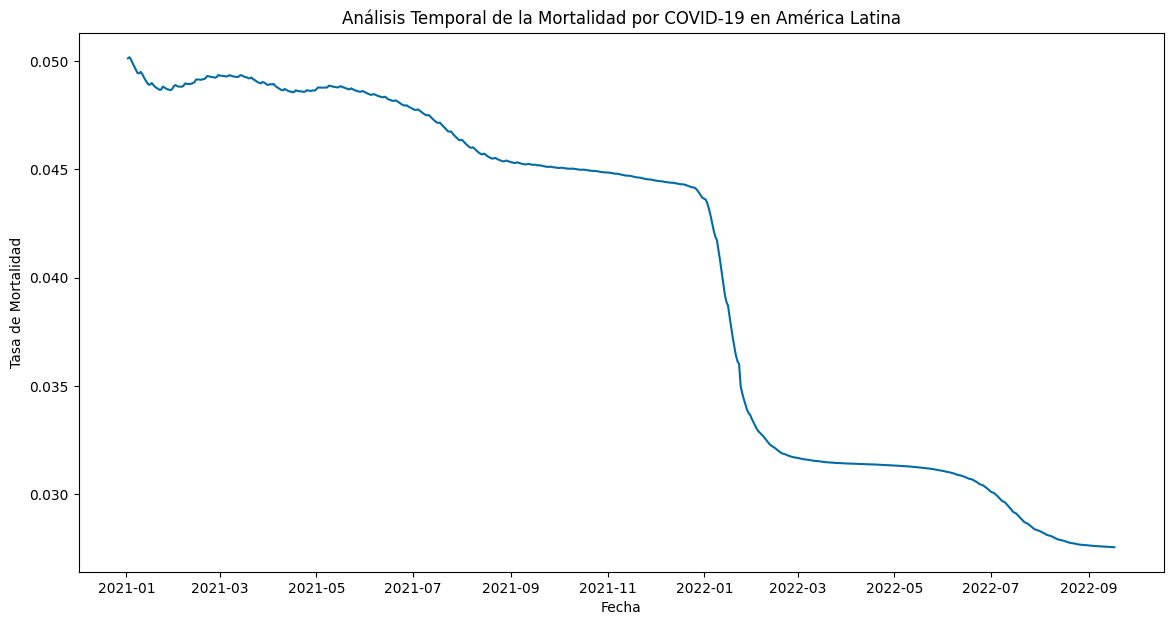

In [ ]:
# Calcula la tasa de mortalidad dividiendo el número de muertes acumuladas entre el número de casos confirmados acumulados
data_latinoamerica_paises['mortality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']

# Configura el tamaño de la figura del gráfico
plt.figure(figsize=(14, 7))

# Crea un gráfico de líneas usando seaborn
sns.lineplot(
    data=data_latinoamerica_paises,  # Datos que se van a graficar
    x='date',  # Columna del eje x
    y='mortality_rate',  # Columna del eje y
    estimator='mean',  # Estima la media de los valores
    errorbar=None  # No muestra el intervalo de confianza
)

# Configura el título del gráfico
plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')

# Configura la etiqueta del eje x
plt.xlabel('Fecha')

# Configura la etiqueta del eje y
plt.ylabel('Tasa de Mortalidad')

# Muestra el gráfico en pantalla
plt.show()

El gráfico muestra una tendencia decreciente en la tasa de mortalidad por COVID-19 en América Latina desde principios de 2021 hasta 2022. La disminución más notable se produce a principios de 2022, lo que puede reflejar mejoras en el tratamiento, la efectividad de la vacunación y otras medidas de salud pública implementadas durante este período.

Evolucion casos activos vs recuperados en América Latina

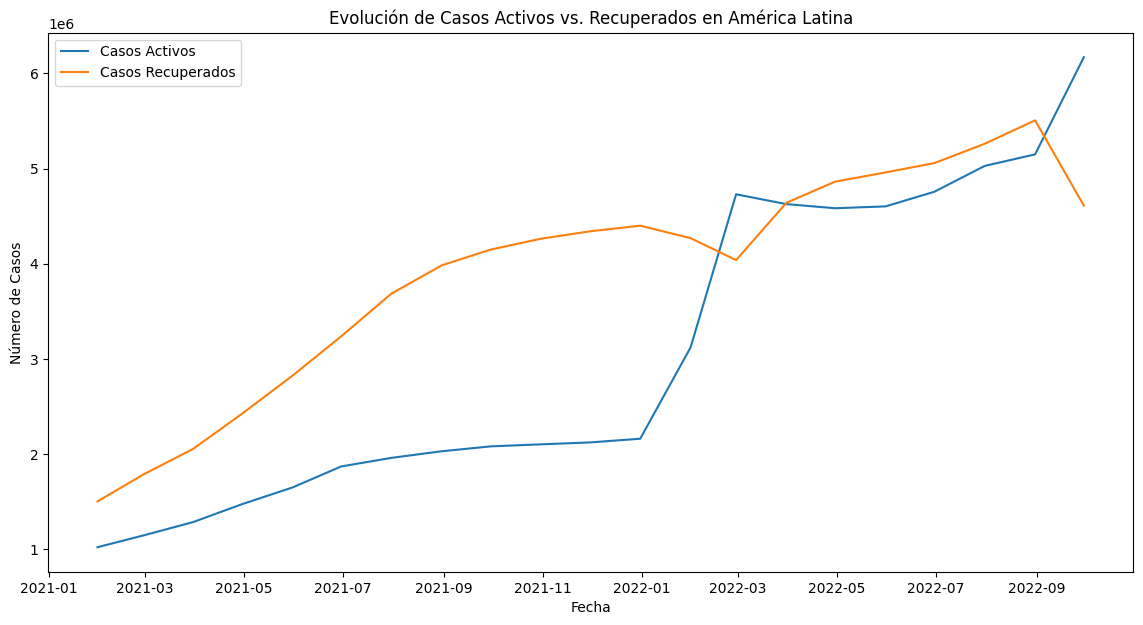

In [ ]:
# cómo evolucionaron los casos activos y recuperados en América Latina

# Calcula los casos activos
data_latinoamerica_paises['active_cases'] = data_latinoamerica_paises['cumulative_confirmed'] - data_latinoamerica_paises['cumulative_deceased'] - data_latinoamerica_paises['cumulative_recovered']
# Crea una nueva columna 'active_cases' restando los casos fallecidos y recuperados del total de casos confirmados

# Configura el tamaño de la figura del gráfico
plt.figure(figsize=(14, 7))  

# Grafica la evolución de los casos activos
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos', color='#1f77b4')  
# Agrupa los datos por mes, calcula la media de los casos activos y los grafica con color azul (hex: #1f77b4)

# Grafica la evolución de los casos recuperados
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados', color='#ff7f0e')  
# Agrupa los datos por mes, calcula la media de los casos recuperados y los grafica con color naranja (hex: #ff7f0e)

# Configura los ejes y el título del gráfico
plt.xlabel('Fecha')  # Etiqueta para el eje X
plt.ylabel('Número de Casos')  # Etiqueta para el eje Y
plt.title('Evolución de Casos Activos vs. Recuperados en América Latina')  # Título del gráfico

# Añade la leyenda al gráfico
plt.legend()  

# Muestra el gráfico en pantalla
plt.show()  

El gráfico muestra que los casos activos y los casos recuperados en América Latina han aumentado de manera constante desde principios de 2021. Sin embargo, a partir de finales de 2021 y principios de 2022, hay una notable convergencia donde los casos recuperados superan consistentemente a los casos activos, indicando una mejora en la recuperación frente a la pandemia.

Situación actual de Covid-19 

<Figure size 1400x800 with 0 Axes>

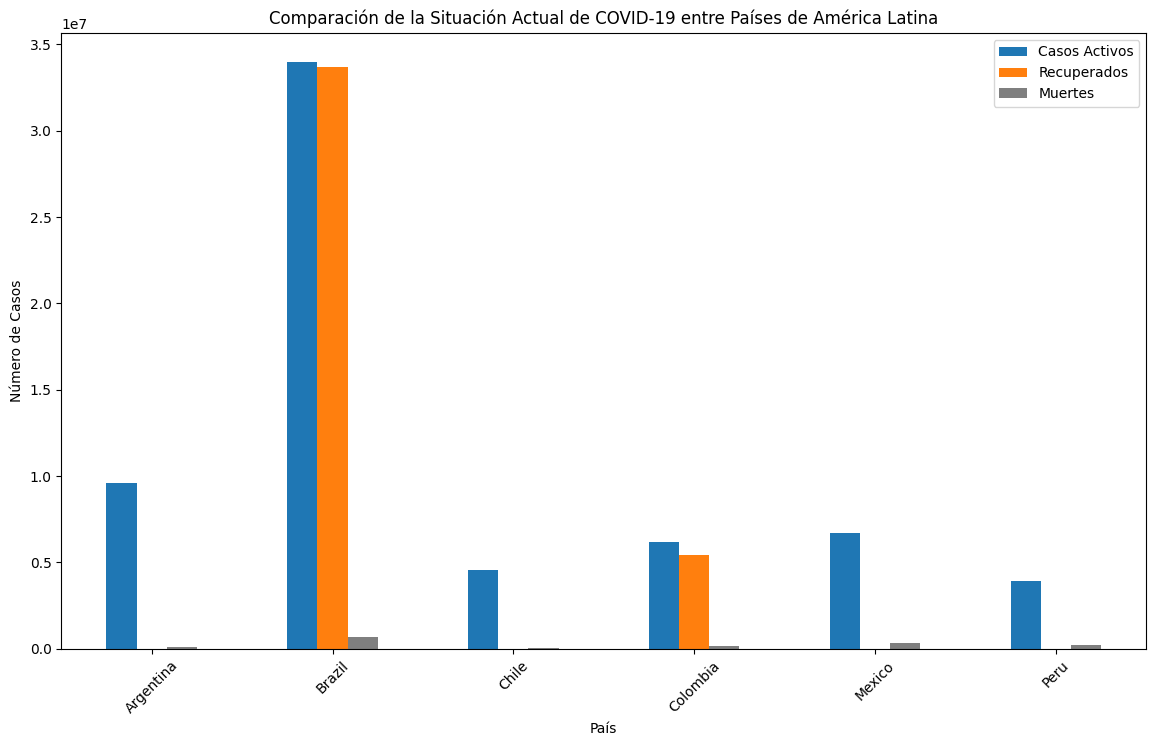

In [ ]:
# No se tienen datos de recuperados y muertes en algunos países

# Agrupa los datos por nombre del país y obtiene el valor máximo para 'active_cases', 'cumulative_recovered' y 'cumulative_deceased'
current_situation = data_latinoamerica_paises.groupby('country_name').max()[['active_cases', 'cumulative_recovered', 'cumulative_deceased']]

# Crea el gráfico de barras
plt.figure(figsize=(14, 8))  # Configura el tamaño de la figura del gráfico
current_situation.plot(kind='bar', stacked=False, figsize=(14, 8), color=['#1f77b4', '#ff7f0e', '#7f7f7f'])  # Grafica los datos en un gráfico de barras no apiladas con colores de la paleta especificada

# Configura el título y etiquetas del gráfico
plt.title('Comparación de la Situación Actual de COVID-19 entre Países de América Latina')  # Título del gráfico
plt.xlabel('País')  # Etiqueta del eje X
plt.ylabel('Número de Casos')  # Etiqueta del eje Y

# Añade la leyenda al gráfico
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])  # Leyenda para cada barra

# Configura la rotación de las etiquetas del eje X
plt.xticks(rotation=45)  # Rota las etiquetas del eje X 45 grados para mejor legibilidad

# Muestra el gráfico en pantalla
plt.show()  

El gráfico destaca que Brasil tiene la mayor cantidad de casos activos y recuperados, mientras que en otros países de América Latina, los datos sobre casos recuperados son incompletos o ausentes, salvo en un año específico para Colombia. Esta falta de datos sobre recuperados en varios países limita una comparación completa y precisa de la situación actual de COVID-19 en la región.


Por lo tanto los países donde debe expandirse la empresa farmacéutica son Brasil, México y Colombia, ya que son los países que más casos confirmados y muertes han tenido, además de ser los países que menos vacunas han administrado, tal vez las políticas de vacunación no han sido las mejores o no han tenido la cantidad de vacunas necesarias, esto sin tener en cuenta la densidad de población y la cantidad de habitantes de cada país y problemas sociales y económicos que puedan afectar la cantidad de casos confirmados y muertes.

Evolución del número de muertes diarias por país

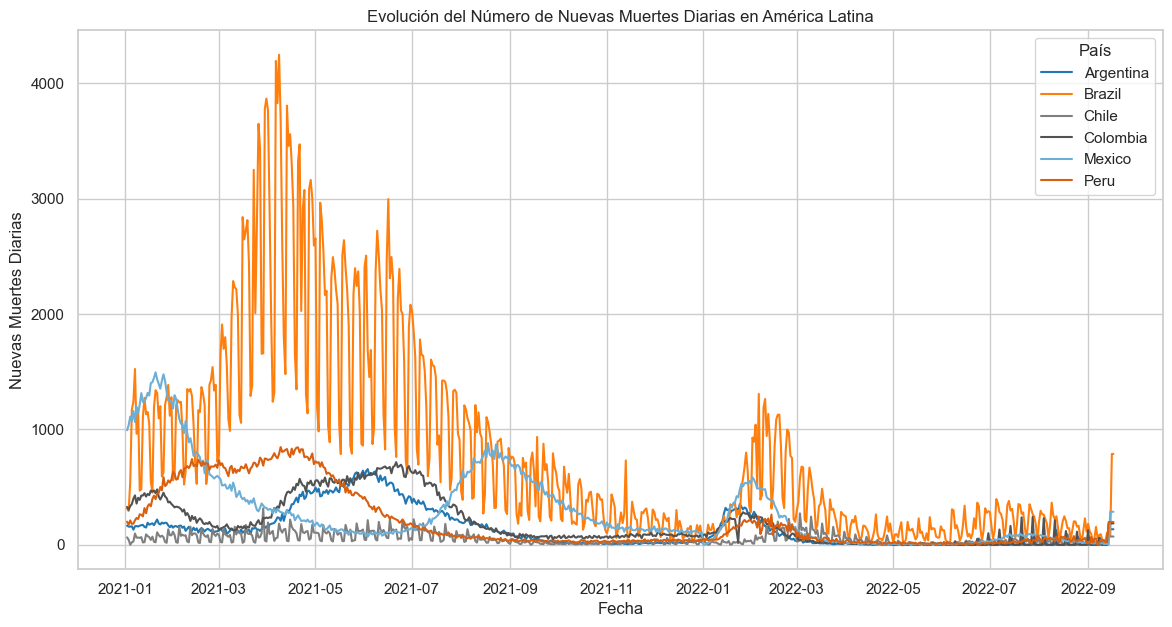

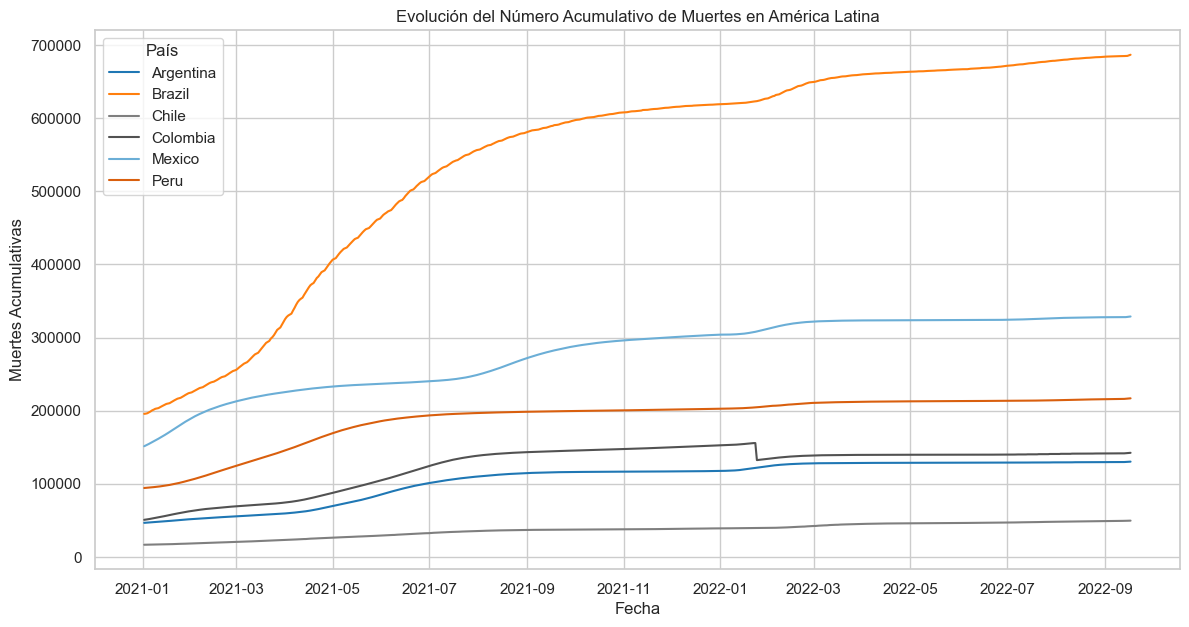

In [ ]:
# Restablecer el índice para convertir 'date' en una columna temporalmente
data_latinoamerica_paises = data_latinoamerica_paises.reset_index()

# Convertir la columna de fecha a un tipo de dato datetime para facilitar el manejo de fechas
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")  # Configura el estilo de fondo de los gráficos de Seaborn

# Crear un gráfico de línea para la evolución del número de nuevas muertes diarias en los países de América Latina
plt.figure(figsize=(14, 7))  # Configura el tamaño de la figura del gráfico
sns.lineplot(
    data=data_latinoamerica_paises,  # Especifica el DataFrame a utilizar
    x='date',  # Especifica la columna para el eje X
    y='new_deceased',  # Especifica la columna para el eje Y
    hue='country_name',  # Diferencia las líneas por país
    palette=['#1f77b4', '#ff7f0e', '#7f7f7f', '#525252', '#6baed6', '#d95f0e']  # Especifica la paleta de colores a usar
)

# Configurar los ejes y el título del gráfico
plt.xlabel('Fecha')  # Etiqueta para el eje X
plt.ylabel('Nuevas Muertes Diarias')  # Etiqueta para el eje Y
plt.title('Evolución del Número de Nuevas Muertes Diarias en América Latina')  # Título del gráfico
plt.legend(title='País')  # Título de la leyenda

# Mostrar el gráfico
plt.show()  # Muestra el gráfico en pantalla

# Crear un gráfico de línea para la evolución del número acumulativo de muertes en los países de América Latina
plt.figure(figsize=(14, 7))  # Configura el tamaño de la figura del gráfico
sns.lineplot(
    data=data_latinoamerica_paises,  # Especifica el DataFrame a utilizar
    x='date',  # Especifica la columna para el eje X
    y='cumulative_deceased',  # Especifica la columna para el eje Y
    hue='country_name',  # Diferencia las líneas por país
    palette=['#1f77b4', '#ff7f0e', '#7f7f7f', '#525252', '#6baed6', '#d95f0e']  # Especifica la paleta de colores a usar
)

# Configurar los ejes y el título del gráfico
plt.xlabel('Fecha')  # Etiqueta para el eje X
plt.ylabel('Muertes Acumulativas')  # Etiqueta para el eje Y
plt.title('Evolución del Número Acumulativo de Muertes en América Latina')  # Título del gráfico
plt.legend(title='País')  # Título de la leyenda

# Mostrar el gráfico
plt.show()  # Muestra el gráfico en pantalla

# Opcionalmente, puedes volver a establecer 'date' como índice si es necesario
data_latinoamerica_paises = data_latinoamerica_paises.set_index('date')

Evolución del Número de Nuevas Muertes Diarias en América Latina
La gráfica muestra que Brasil ha tenido picos significativos de nuevas muertes diarias en comparación con otros países de América Latina. 

Evolución del Número Acumulativo de Muertes en América Latina
Brasil presenta el mayor número de muertes acumulativas a lo largo del tiempo, seguido por Perú y Argentina. La notable disminución en las muertes acumulativas en México probablemente se deba a una revisión de datos o a la corrección de reportes previos.

BONUS TRACK

In [ ]:
# Mapa para ver la distribución de casos confirmados, muertes, vacunas y recuperados
import folium
from folium.plugins import HeatMap

# Seleccionamos las columnas que vamos a utilizar
columns = ['latitude', 'longitude', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'cumulative_recovered']
data_map = data_latinoamerica_paises[columns].dropna()

# Creamos un mapa centrado en América Latina
# 'location' establece la latitud y longitud inicial del mapa
# 'zoom_start' establece el nivel de zoom inicial del mapa
map = folium.Map(location=[-14.235004, -51.92528], zoom_start=3)

# Creamos un mapa de calor para los casos confirmados
# 'HeatMap' crea un mapa de calor con los datos proporcionados
# 'data' especifica los datos de latitud, longitud y la magnitud (casos confirmados)
# 'radius' especifica el radio de cada punto en el mapa de calor
heat_map_confirmed = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_confirmed']], radius=15)
# Añadimos el mapa de calor de casos confirmados al mapa principal
map.add_child(heat_map_confirmed)

# Creamos un mapa de calor para las muertes
heat_map_deceased = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_deceased']], radius=15)
# Añadimos el mapa de calor de muertes al mapa principal
map.add_child(heat_map_deceased)

# Creamos un mapa de calor para las vacunas administradas
heat_map_vaccine = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_vaccine_doses_administered']], radius=15)
# Añadimos el mapa de calor de vacunas administradas al mapa principal
map.add_child(heat_map_vaccine)

# Creamos un mapa de calor para los recuperados
heat_map_recovered = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_recovered']], radius=15)
# Añadimos el mapa de calor de recuperados al mapa principal
map.add_child(heat_map_recovered)

# Guardamos el mapa en un archivo HTML
map.save('mapa.html')

# Si estás en un Jupyter Notebook, puedes visualizar el mapa directamente:
map